# The Battle of Neighbourhoods in Toronto: Where is/is not best to live

### Applied Data Science Capstone by IBM/Coursera

## Table of Contents

-  [1. Introduction](#1.-Introduction)  
    [1.1. Background](#1.1.-Background)  
    [1.2. Business understanding/Problem description](#1.2.-Business-understanding/Problem-description)  
    [1.3. Target audience](#1.3.-Target-audience)
-  [2. Data](#2.-Data)  
    [2.1. City of Toronto Open Data Catalogue](#2.1.-City-of-Toronto-Open-Data-Catalogue)    
    [2.2. Foursquare API](#2.2.-Foursquare-API)
-  [3. Methodology](#3.-Methodology)  
    [3.1. Exploratory data analysis](#3.1.-Exploratory-data-analysis)    
    [3.2. Machine learning](#3.2.-Machine-learning-(clustering))
-  [4. Results](#4.-Results)    
-  [5. Discussions](#5.-Discussions)    
-  [6. Conclusions](#6.-Conclusions) 

## 1. Introduction

### 1.1. Background

Toronto, Capital of the province of Ontario, is Canada’s largest city and a world leader in areas such as business, finance, technology, entertainment and culture. Its large population of immigrants from all over the globe has also made Toronto one of the most multicultural cities in the world. With a population of ~2.8 million as of 2016, Toronto is Canada's most populous city and the fourth most populous city in North America.  

According to Global Liveability Index 2019 report published by __[Economist Intelligence Unit](https://www.eiu.com/public/topical_report.aspx?campaignid=liveability2019)__, Toronto ranks 7th (tied with Tokyo, Japan) out of the 140 most livable cities in the world. With thousands of people moving to Toronto from abroad or domestically and pursuing their lives and careers in such a vibrant city, the question becomes: where do I live in Toronto? Which neighbourhoods provide best quality of life in terms of major neighbourhood quality measures? Considering a person’s priorities for a neighbourhood, which neighbourhood are less or more likely to satisfy one’s expectation of a neighbourhood to live? We will try to answer these questions by data science methods applied on a dataset extracted from multiple data resources and provide some more insights into neighbourhoods’ comparisons. We categorize neighbourhoods into multiple categories which share similar features. These categories and features can be a great source of information for someone that has general or even specific priorities in terms of what they would expect from their neighbourhoods. 


### 1.2. Business understanding/Problem description

As one of most liveable metropolitan cities in the world and the centre of many businesses, Toronto is where many newcomers or local people move to and would like to call home. These include people who move from abroad including immigrants or refugees, people who move to Toronto for a new career and business, etc., and also people who move domestically in Canada or even in Greater Toronto Area either in search of better neighbourhood to live in or to live closer to where they work.   

A very important decision that these people need to make for themselves and their families is which neighbourhood in Toronto they should select to live. This decision becomes more difficult for many people that move to Toronto for the first time or people who do not know a lot about Toronto’s neighbourhoods.   

Although Toronto is one of the world’s most liveable cities, there are obviously major differences between different neighbourhoods which can make one more appealing than the other to a person considering one’s priorities. There are many online resources that can help compare neighbourhoods and facilitate making this decision, however, gathering such information on major decision criteria can be time consuming and there are not many resources out there that bring majority of these criteria into one place. Having a tool that can do this can be very helpful for these people. This is what we have decided to do for our data science capstone project below: Gather data on major criteria to group neighbourhoods into different categories which can help one decide where to choose as their next neighbourhood of residence.
To do this, we have taken a step backwards and asked the question: What are the main criteria that one generally considers before selecting a neighbourhood for living? Let’s say you need to move to Toronto and move to a new neighbourhood within Toronto: What do you generally expect your new neighbourhood have to consider it as a potential future neighbourhood of residence?   

The answer we have given to this question is that a person generally would prefer a neighbourhood where people living there or the neighbourhood itself have:  

a) the highest number, percentage or amount of:
> * schools per 10,000 young residents  
> * income or salary  
> * educated residents with post-secondary degrees  
> * green areas or tree cover (per 10,000 residents)  
> * walkability to amenities (walk score)  
> * public transport (bus/street car/etc) stops (per 10,000 residents)  
> * shops and stores (per 10,000 residents)  
> * food and drink places (per 10,000 residents)  
> * recreation centres (gym, sports, entertainment, touristic places, etc) (per 10,000 residents), and     
    
b) the lowest number, percentage or amount of:  
> * average home prices  
> * crime rate  
> * average rent  
> * unemployment rate  
> * median journey to work/commuting duration  
> * population density    
    
We gather data on all these pertinent criteria (features) and analyze them in an effort to be able to group neighbourhoods into different categories that share similar characteristics and find out any neighbourhoods that stand out in terms of having an anomalous number of positive (a) or negative (b) characteristics. This tool can help answer the question of which neighbourhoods are more likely for a person to select as a potential neighbourhood of residence versus the others considering one’s priorities.


### 1.3. Target audience

The project can potentially serve two groups of audience:  

> __a)__ Future residents: who need to decide which neighbourhood they want to live in, including people who need to move within Toronto because of career related relocation, or unhappiness with their current neighbourhood of residence, etc, or people who are moving to Toronto from another city or abroad to start a career or other reasons, including immigrants, refugees, business owners, etc.   

> __b)__  City officials: Considering the various decision criteria (features) we are considering for decision making, officials from different and related sectors can investigate how they can improve some of these characteristics in different neighbourhoods to make them more appealing to future residents. For instance, the police can target place with higher rate of crimes, Toronto Transit Commission (TTC) can increase the number of public transit stops in neighbourhoods that need it, the city provide more social housing where housing prices are high or rents are relatively more expensive, etc.


## 2. Data

__[City of Toronto](https://open.toronto.ca/dataset/neighbourhoods/)__ website divides Toronto into 140 neighbourhoods.  

The features described in the previous section come mainly from two data sources:  

> 1- __[City of Toronto Open Data Catalogue](https://open.toronto.ca/catalogue/?sort=last_refreshed%20desc)__   
> 2- __[Foursquare API](https://foursquare.com/city-guide)__  

The features that we are going to use for this analysis are going to come from separate data tables from each of these resources. We query data regarding shops and stores, food and drink places, and recreation centres from Foursquare API and the rest of the data mentioned in Introduction section will come from City of Toronto catalogues.


### 2.1. City of Toronto Open Data Catalogue

First, we define the project ID and access token that are used to save the queried data from online resources in the project's assets section. This way we do not query the data again everytime we run the project and just load the data from the project directly. This will minimize the risk of unavailability of online resource APIs.

In [1]:
# The code was removed by Watson Studio for sharing.

In [2]:
from project_lib import Project
project = Project(project_id=project_id, project_access_token=project_access_token)
pc = project.project_context

First, we import the necessary libraries we will be using in this project.

In [3]:
import json
import pandas as pd
import numpy as np
import requests
import urllib
pd.options.mode.chained_assignment = None
from project_lib import Project
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn import metrics
from sklearn.preprocessing import StandardScaler
from geopy.geocoders import Nominatim
import matplotlib.cm as cm
import matplotlib.colors as colors
import seaborn as sns
from pandas.io.json import json_normalize
from scipy.stats import pearsonr
import requests
%matplotlib inline

Querying the online resources needs to be done when running the project for the first time. In that case we set the variable _queryData_ to Boolean _True_. We can set it to _False_ if we have queried and saved the data into project assets, in which case they will be loaded from there.

In [4]:
queryData = False

Try importing modules _Polygon_ and _Point_ from _shapely_ library. If the library is not installed already, it will be, and then modules will be imported. Foilum library is similarly installed/imported.

In [5]:
try:
    from shapely.geometry import Polygon,Point
except:
    !conda install -c conda-forge shapely --yes
    from shapely.geometry import Polygon,Point

Solving environment: done

## Package Plan ##

  environment location: /opt/conda/envs/Python36

  added / updated specs: 
    - shapely


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    certifi-2020.4.5.2         |   py36h9f0ad1d_0         152 KB  conda-forge
    ca-certificates-2020.4.5.2 |       hecda079_0         147 KB  conda-forge
    geos-3.8.1                 |       he1b5a44_0         1.0 MB  conda-forge
    openssl-1.1.1g             |       h516909a_0         2.1 MB  conda-forge
    python_abi-3.6             |          1_cp36m           4 KB  conda-forge
    shapely-1.7.0              |   py36h3d6ee9d_3         435 KB  conda-forge
    ------------------------------------------------------------
                                           Total:         3.9 MB

The following NEW packages will be INSTALLED:

    geos:            3.8.1-he1b5a44_0     conda-forge
    python_abi:  

In [6]:
try:
    import folium
except:
    !conda install -c conda-forge folium=0.5.0 --yes
    import folium

Solving environment: done

## Package Plan ##

  environment location: /opt/conda/envs/Python36

  added / updated specs: 
    - folium=0.5.0


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    branca-0.4.1               |             py_0          26 KB  conda-forge
    altair-4.1.0               |             py_1         614 KB  conda-forge
    vincent-0.4.4              |             py_1          28 KB  conda-forge
    folium-0.5.0               |             py_0          45 KB  conda-forge
    ------------------------------------------------------------
                                           Total:         713 KB

The following NEW packages will be INSTALLED:

    altair:  4.1.0-py_1 conda-forge
    branca:  0.4.1-py_0 conda-forge
    folium:  0.5.0-py_0 conda-forge
    vincent: 0.4.4-py_1 conda-forge


branca-0.4.1         | 26 KB     | ##################################### | 1

#### Query Toronto neighbourhoods and their coordinates

Toronto's 140 neighbourhoods and their coordinates are queried from Toronto Open Data catalogue and saved to project's assets. The link to the catalogue is listed below. A snapshot of the first 5 rows is shows below.

In [7]:
#download neighbourhoods
if queryData:
    neighbourhoods_url= 'https://ckan0.cf.opendata.inter.prod-toronto.ca/download_resource/a083c865-6d60-4d1d-b6c6-b0c8a85f9c15?format=csv&projection=4326'
    neighbourhoods_df = pd.read_csv(neighbourhoods_url)
    h = project.save_data(data=neighbourhoods_df.to_csv(index=None),file_name='neighbourhoods.csv',overwrite=True)
neighbourhoods_df = pd.read_csv(project.get_file('neighbourhoods.csv'))
neighbourhoods_df.head()

_id   AREA_ID  AREA_ATTR_ID  PARENT_AREA_ID  AREA_SHORT_CODE  \
0  5601  25886861      25926662           49885               94   
1  5602  25886820      25926663           49885              100   
2  5603  25886834      25926664           49885               97   
3  5604  25886593      25926665           49885               27   
4  5605  25886688      25926666           49885               31   

   AREA_LONG_CODE                     AREA_NAME                     AREA_DESC  \
0              94                 Wychwood (94)                 Wychwood (94)   
1             100          Yonge-Eglinton (100)          Yonge-Eglinton (100)   
2              97           Yonge-St.Clair (97)           Yonge-St.Clair (97)   
3              27  York University Heights (27)  York University Heights (27)   
4              31       Yorkdale-Glen Park (31)       Yorkdale-Glen Park (31)   

    X   Y  LONGITUDE   LATITUDE  OBJECTID   Shape__Area  Shape__Length  \
0 NaN NaN -79.425515  43.676919  16491505  3.217960e+06    7515.779658   
1 NaN NaN -79.403590  43.704689  16491521  3.160334e+06    7872.021074   
2 NaN NaN -79.397871  43.687859  16491537  2.222464e+06    8130.411276   
3 NaN NaN -79.488883  43.765736  16491553  2.541821e+07   25632.335242   
4 NaN NaN -79.457108  43.714672  16491569  1.156669e+07   13953.408098   

                                            geometry  
0  {u'type': u'Polygon', u'coordinates': (((-79.4...  
1  {u'type': u'Polygon', u'coordinates': (((-79.4...  
2  {u'type': u'Polygon', u'coordinates': (((-79.3...  
3  {u'type': u'Polygon', u'coordinates': (((-79.5...  
4  {u'type': u'Polygon', u'coordinates': (((-79.4...

Only the columns that contain the neighbourhood unique IDs, name, and latitude and longitude are extracted from this dataframe. The columns are then renamed to better describe the contents. The first 5 rows are shown.

In [8]:
neighbourhoods = neighbourhoods_df[['AREA_SHORT_CODE','AREA_DESC','LATITUDE','LONGITUDE']]
neighbourhoods.rename(columns={'AREA_SHORT_CODE':'Neighbourhood_id','AREA_DESC':'Neighbourhood',
                               'LATITUDE':'Latitude','LONGITUDE':'Longitude'},inplace=True)
neighbourhoods.head()

Neighbourhood_id                 Neighbourhood   Latitude  Longitude
0                94                 Wychwood (94)  43.676919 -79.425515
1               100          Yonge-Eglinton (100)  43.704689 -79.403590
2                97           Yonge-St.Clair (97)  43.687859 -79.397871
3                27  York University Heights (27)  43.765736 -79.488883
4                31       Yorkdale-Glen Park (31)  43.714672 -79.457108

The parentheses and their content in the _Neighbourhood_ column are removed to keep only the neighborhoods names. The leading and trailing space characters are also removed from the resulting neighbourhood names.  
Also, we make sure that the unique IDs are of integer data type.  
First five rows are then shown after these changes.

In [9]:
neighbourhoods['Neighbourhood'] = neighbourhoods.Neighbourhood.str.replace('(\(\d+\))','')
neighbourhoods['Neighbourhood'] = neighbourhoods['Neighbourhood'].str.strip()
neighbourhoods['Neighbourhood_id'] = neighbourhoods['Neighbourhood_id'].astype(int)
neighbourhoods.head()

Neighbourhood_id            Neighbourhood   Latitude  Longitude
0                94                 Wychwood  43.676919 -79.425515
1               100           Yonge-Eglinton  43.704689 -79.403590
2                97           Yonge-St.Clair  43.687859 -79.397871
3                27  York University Heights  43.765736 -79.488883
4                31       Yorkdale-Glen Park  43.714672 -79.457108

The size of the dataframe confirms there are 140 neighbourhoods.

In [10]:
print('there are '+str(neighbourhoods.shape[0])+' neighbourhoods in Toronto')

there are 140 neighbourhoods in Toronto


#### Visualize Toronto neighbourhoods

We use _Foilum_ library to visualize Toronto neighbourhoods' locations. To do that we first get the latitude and longitude of Toronto using the _geolocator_ library:

In [11]:
address = 'Toronto, Ontario'
geolocator = Nominatim(user_agent="TOR_explorer")
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude
print('The geograpical coordinate of Toronto are {}, {}.'.format(latitude, longitude))

The geograpical coordinate of Toronto are 43.6534817, -79.3839347.


Now we create a Folium map object and add the neighbourhoods as circle markers to it with a popup showing the neighbourhood's name and unique ID.

In [12]:
# create map of Toronto using latitude and longitude values
map_toronto = folium.Map(location=[latitude, longitude], zoom_start=10)
# add markers to map
for lat, lng, neigh,neigh_id in zip(neighbourhoods['Latitude'], \
                                           neighbourhoods['Longitude'], \
                                           neighbourhoods['Neighbourhood'],\
                                          neighbourhoods['Neighbourhood_id']):
    label = '{}, {}'.format(neigh, neigh_id)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(map_toronto)  
    
map_toronto

#### Normalized number of schools per neighbourhood

Availability of schools in a neighbourhood is an important deciding factor for families when selecting a neighbourhood to live in. The larger the number of young people within school-range age limits, the higher the number of schools needed within a neighbourhood. Therefore, to be able to make a comparison between different neighbourhood, we need a normalized number of school for a certain population, here 10,000, of within-school-age range (5 to 19). Here, we call this feature 'school rate'.    

To calculate school rate, we first calculate the number of schools in each neighbourhood by finding how many of them locates within the shape polygon of each neighbourhood, which are built from the neighbourhoods’ GeoJson file on City of Toronto Open Data Catalogues. We then compute the total population of people with ages between 5 and 19 by summing the population age groups of 5-to-9, 10-to-14, and 15-to-19 from Wellbeing Toronto – Demographics catalogue of population age groups. Multiplying the number of schools in each neighbourhood by 10,000 followed by a division by the total neighbourhood’s 5-19 year old population results in school rate.  

The different steps involved in calculating school rate is described below. Let's first query the school location table from Toronto open data catalogue. The link to the table is listed below. We save the table to project's assets and load it afterwards. Below we show the first few rows of this table. Each row include some information about each school, its coordinates, etc. 

In [13]:
if queryData:
    school_location_url = 'https://ckan0.cf.opendata.inter.prod-toronto.ca/download_resource/02ef7447-54d9-4aa7-b76d-8ef8138ac546?format=csv&projection=4326'
    school_location_df = pd.read_csv(school_location_url)
    h = project.save_data(data=school_location_df.to_csv(index=None),file_name='school_location.csv',overwrite=True)
school_location_df = pd.read_csv(project.get_file('school_location.csv'))
school_location_df.head()

_id  OBJECTID    GEO_ID                                   NAME  \
0  14269         1   7963754                 Avondale Public School   
1  14270         2   7315504  Avondale Secondary Alternative School   
2  14271         3  20258267                     AYJ Global Academy   
3  14272         4   7102999                     Bais Brucha School   
4  14273         5   9171677    Bais Chaya Mushka Elementary School   

   SCHOOL_LEVEL SCHOOL_TYPE                     BOARD_NAME     SOURCE_ADDRESS  \
0           NaN          EP  Toronto District School Board      25 Bunty Lane   
1           NaN          EP  Toronto District School Board   24 Silverview Dr   
2           NaN          PR                            NaN       4 Lansing Sq   
3           NaN          PR                            NaN   3077 Bathurst St   
4           NaN          PR                            NaN  4375 Chesswood Dr   

  SCHOOL_TYPE_DESC  ADDRESS_POINT_ID  ... LO_NUM LO_NUM_SUF HI_NUM HI_NUM_SUF  \
0   English Public           7963754  ...     25        NaN    NaN        NaN   
1   English Public           7315504  ...     24        NaN    NaN        NaN   
2             Priv          20258267  ...      4        NaN    NaN        NaN   
3             Priv           7102999  ...   3077        NaN    NaN        NaN   
4             Priv           9171677  ...   4375        NaN    NaN        NaN   

  LINEAR_NAME_ID           X            Y   LATITUDE  LONGITUDE  \
0           5064  314026.623  4848287.934  43.776502 -79.385190   
1           6720  311879.691  4849375.563  43.786315 -79.411846   
2           6007  318854.727  4848028.516  43.774091 -79.325220   
3            436  310459.388  4841999.775  43.719936 -79.429570   
4           5187  306600.741  4846528.168  43.760717 -79.477445   

                                            geometry  
0  {u'type': u'Point', u'coordinates': (-79.38518...  
1  {u'type': u'Point', u'coordinates': (-79.41184...  
2  {u'type': u'Point', u'coordinates': (-79.32521...  
3  {u'type': u'Point', u'coordinates': (-79.42956...  
4  {u'type': u'Point', u'coordinates': (-79.47744...  

[5 rows x 29 columns]

Below we show a list of column headers to better find what we need: the coordinates (latitude and longitude)

In [14]:
school_location_df.columns

Index(['_id', 'OBJECTID', 'GEO_ID', 'NAME', 'SCHOOL_LEVEL', 'SCHOOL_TYPE',
       'BOARD_NAME', 'SOURCE_ADDRESS', 'SCHOOL_TYPE_DESC', 'ADDRESS_POINT_ID',
       'ADDRESS_NUMBER', 'LINEAR_NAME_FULL', 'ADDRESS_FULL', 'POSTAL_CODE',
       'MUNICIPALITY', 'CITY', 'PLACE_NAME', 'GENERAL_USE_CODE',
       'CENTRELINE_ID', 'LO_NUM', 'LO_NUM_SUF', 'HI_NUM', 'HI_NUM_SUF',
       'LINEAR_NAME_ID', 'X', 'Y', 'LATITUDE', 'LONGITUDE', 'geometry'],
      dtype='object')

We only keep the school names and coordinates from the above dataframe. Below we also show the data type of each column ensuring they make sense.

In [15]:
school_location_df = school_location_df[['NAME','LATITUDE', 'LONGITUDE']]
school_location_df.dtypes

NAME          object
LATITUDE     float64
LONGITUDE    float64
dtype: object

Now that we have school locations, we need to find the number of young people in each neighbourhood between ages 5 and 19. For that we query the population age groups table from Toronto Open Data catalogue whose link is provided below. The table is saved as a CSV file in out project's assets and is loaded afterwards. The first few rows are also shown below.

In [16]:
if queryData:
    recent_age_groups_url = 'https://ckan0.cf.opendata.inter.prod-toronto.ca/download_resource/2fd345a6-4107-49c1-b439-5ba0abe011d7'
    recent_age_groups_df = pd.read_excel(recent_age_groups_url,sheet_name='2016_Age Groups')
    h = project.save_data(data=recent_age_groups_df.to_csv(index=None),file_name='recent_age_groups.csv',overwrite=True)
recent_age_groups_df = pd.read_csv(project.get_file('recent_age_groups.csv'))
recent_age_groups_df.head()

NeighbourhoodID                      Neighbourhood  0 to 04 years  \
0              1.0             West Humber-Clairville         1540.0   
1              2.0  Mount Olive-Silverstone-Jamestown         2190.0   
2              3.0       Thistletown-Beaumond Heights          540.0   
3              4.0                    Rexdale-Kipling          560.0   
4              5.0                   Elms-Old Rexdale          540.0   

   0 to 14 years  05 to 09 years  10 to 14 years  100 years and over  \
0         5060.0          1720.0          1790.0                 5.0   
1         7090.0          2500.0          2415.0                 0.0   
2         1730.0           600.0           595.0                 5.0   
3         1640.0           515.0           565.0                 0.0   
4         1805.0           605.0           660.0                 0.0   

   15 to 19 years  20 to 24 years  25 to 29 years  ...  65 to 69 years  \
0          2325.0          3120.0          2785.0  ...          1595.0   
1          2585.0          2655.0          2400.0  ...          1285.0   
2           650.0           760.0           680.0  ...           490.0   
3           635.0           720.0           715.0  ...           520.0   
4           690.0           750.0           600.0  ...           415.0   

   65 years and over  70 to 74 years  75 to 79 years  80 to 84 years  \
0             4980.0          1185.0           885.0           700.0   
1             3560.0           885.0           630.0           465.0   
2             1880.0           375.0           335.0           320.0   
3             1730.0           350.0           295.0           270.0   
4             1275.0           305.0           235.0           180.0   

   85 to 89 years  85 years and over  90 to 94 years  95 to 99 years  \
0           400.0              615.0           160.0            50.0   
1           225.0              300.0            70.0            10.0   
2           225.0              350.0           100.0            20.0   
3           205.0              300.0            85.0            15.0   
4           105.0              145.0            40.0             5.0   

   Total Population - All Age Groups - 100% data  
0                                        33320.0  
1                                        32950.0  
2                                        10360.0  
3                                        10530.0  
4                                         9460.0  

[5 rows x 27 columns]

Returning the size of this table, we noticed there are 141 rows instead of 140, the number of neighbourhoods. We checked out the last few columns and realized there is an invalid row without any specific neighbourhood name. So we remove this row from the data. We also remove the last column that has a NaN value.

In [17]:
recent_age_groups_df.shape

(141, 27)

In [18]:
recent_age_groups_df.tail(5)

NeighbourhoodID        Neighbourhood  0 to 04 years  0 to 14 years  \
136            137.0               Woburn         3140.0         9625.0   
137            138.0        Eglinton East         1315.0         4180.0   
138            139.0  Scarborough Village         1055.0         3365.0   
139            140.0            Guildwood         1295.0          425.0   
140              NaN                  410            NaN            NaN   

     05 to 09 years  10 to 14 years  100 years and over  15 to 19 years  \
136          3365.0          3125.0                 5.0          3400.0   
137          1480.0          1395.0                 5.0          1585.0   
138          1200.0          1100.0                10.0          1140.0   
139           455.0             5.0               540.0           525.0   
140             NaN             NaN                 NaN             NaN   

     20 to 24 years  25 to 29 years  ...  65 to 69 years  65 years and over  \
136          4260.0          4060.0  ...          2220.0             8010.0   
137          1545.0          1450.0  ...          1015.0             3505.0   
138          1220.0          1055.0  ...           675.0             2225.0   
139           415.0           435.0  ...          2635.0              510.0   
140             NaN             NaN  ...             NaN                NaN   

     70 to 74 years  75 to 79 years  80 to 84 years  85 to 89 years  \
136          1810.0          1550.0          1330.0           740.0   
137           815.0           625.0           480.0           345.0   
138           455.0           365.0           300.0           245.0   
139           510.0           490.0           350.0           540.0   
140             NaN             NaN             NaN             NaN   

     85 years and over  90 to 94 years  95 to 99 years  \
136             1130.0           305.0            60.0   
137              560.0           170.0            45.0   
138              430.0           135.0            25.0   
139              165.0            30.0          9910.0   
140                NaN             NaN             NaN   

     Total Population - All Age Groups - 100% data  
136                                        53490.0  
137                                        22775.0  
138                                        16730.0  
139                                            NaN  
140                                            NaN  

[5 rows x 27 columns]

In [19]:
recent_age_groups_df.drop(recent_age_groups_df.columns[-1],axis=1,inplace=True)
recent_age_groups_df.dropna(inplace=True)

Below we list the column names to better identify the information we are looking for. 

In [20]:
recent_age_groups_df.columns

Index(['NeighbourhoodID', 'Neighbourhood', '0 to 04 years', '0 to 14 years',
       '05 to 09 years', '10 to 14 years', '100 years and over',
       '15 to 19 years', '20 to 24 years', '25 to 29 years', '30 to 34 years',
       '35 to 39 years', '40 to 44 years', '50 to 54 years', '55 to 59 years',
       '55 years and over', '60 to 64 years', '65 to 69 years',
       '65 years and over', '70 to 74 years', '75 to 79 years',
       '80 to 84 years', '85 to 89 years', '85 years and over',
       '90 to 94 years', '95 to 99 years'],
      dtype='object')

We sum the population age groups of 5-to-9, 10-to-14, and 15-to-19 to find the total number of people with ages between 5 and 19, and insert the result as a separate column into the dataframe. First few rows are shown for confirmation.

In [21]:
recent_age_groups_df['school_age_population'] = recent_age_groups_df[['05 to 09 years','10 to 14 years','15 to 19 years']].sum(axis=1)
recent_age_groups_df.head()

NeighbourhoodID                      Neighbourhood  0 to 04 years  \
0              1.0             West Humber-Clairville         1540.0   
1              2.0  Mount Olive-Silverstone-Jamestown         2190.0   
2              3.0       Thistletown-Beaumond Heights          540.0   
3              4.0                    Rexdale-Kipling          560.0   
4              5.0                   Elms-Old Rexdale          540.0   

   0 to 14 years  05 to 09 years  10 to 14 years  100 years and over  \
0         5060.0          1720.0          1790.0                 5.0   
1         7090.0          2500.0          2415.0                 0.0   
2         1730.0           600.0           595.0                 5.0   
3         1640.0           515.0           565.0                 0.0   
4         1805.0           605.0           660.0                 0.0   

   15 to 19 years  20 to 24 years  25 to 29 years  ...  65 to 69 years  \
0          2325.0          3120.0          2785.0  ...          1595.0   
1          2585.0          2655.0          2400.0  ...          1285.0   
2           650.0           760.0           680.0  ...           490.0   
3           635.0           720.0           715.0  ...           520.0   
4           690.0           750.0           600.0  ...           415.0   

   65 years and over  70 to 74 years  75 to 79 years  80 to 84 years  \
0             4980.0          1185.0           885.0           700.0   
1             3560.0           885.0           630.0           465.0   
2             1880.0           375.0           335.0           320.0   
3             1730.0           350.0           295.0           270.0   
4             1275.0           305.0           235.0           180.0   

   85 to 89 years  85 years and over  90 to 94 years  95 to 99 years  \
0           400.0              615.0           160.0            50.0   
1           225.0              300.0            70.0            10.0   
2           225.0              350.0           100.0            20.0   
3           205.0              300.0            85.0            15.0   
4           105.0              145.0            40.0             5.0   

   school_age_population  
0                 5835.0  
1                 7500.0  
2                 1845.0  
3                 1715.0  
4                 1955.0  

[5 rows x 27 columns]

Below we rename some of the columns to change the data types such that they are more representative of what they contain. We only keep the neighbourhood names, unique ids, and their total 5-to-19 year old population. Firs few rows of the resulting dataframe are shown.

In [22]:
recent_age_groups_df.rename(columns={'NeighbourhoodID':'Neighbourhood_id'},inplace=True)
convert_dict = {'Neighbourhood_id': int, 
                'school_age_population': int
               } 
  
recent_age_groups_df = recent_age_groups_df.astype(convert_dict) 
recent_age_groups_df = recent_age_groups_df[['Neighbourhood','Neighbourhood_id','school_age_population']]
recent_age_groups_df.head()

Neighbourhood  Neighbourhood_id  school_age_population
0             West Humber-Clairville                 1                   5835
1  Mount Olive-Silverstone-Jamestown                 2                   7500
2       Thistletown-Beaumond Heights                 3                   1845
3                    Rexdale-Kipling                 4                   1715
4                   Elms-Old Rexdale                 5                   1955

Now we need to know how many school each neighbourhood has before we move on to calculating its normalized version. Below we query the neighbourhoods _GeoJson_ file which we save to our assets and load afterwards. We then list the first few rows to familiarize ourselves with the columns and data.

In [23]:
if queryData:
    neighbourhood_geojson_url = r'https://ckan0.cf.opendata.inter.prod-toronto.ca/download_resource/a083c865-6d60-4d1d-b6c6-b0c8a85f9c15?format=geojson&projection=4326'
    result = requests.get(neighbourhood_geojson_url).json()
    neighbourhood_geojson_df = json_normalize(result['features'])
    h = project.save_data(data=neighbourhood_geojson_df.to_csv(index=None),file_name='neighbourhood_geojson.csv',overwrite=True)
neighbourhood_geojson_df = pd.read_csv(project.get_file('neighbourhood_geojson.csv'))
neighbourhood_geojson_df.head(2)

geometry.coordinates geometry.type  \
0  [[[-79.4359157087306, 43.6801533947749], [-79....       Polygon   
1  [[[-79.4109578382597, 43.7040828230148], [-79....       Polygon   

   properties.AREA_ATTR_ID  properties.AREA_DESC  properties.AREA_ID  \
0                 25926662         Wychwood (94)            25886861   
1                 25926663  Yonge-Eglinton (100)            25886820   

   properties.AREA_LONG_CODE  properties.AREA_NAME  \
0                         94         Wychwood (94)   
1                        100  Yonge-Eglinton (100)   

   properties.AREA_SHORT_CODE  properties.LATITUDE  properties.LONGITUDE  \
0                          94            43.676919            -79.425515   
1                         100            43.704689            -79.403590   

   properties.OBJECTID  properties.PARENT_AREA_ID  properties.Shape__Area  \
0             16491505                      49885            3.217960e+06   
1             16491521                      49885            3.160334e+06   

   properties.Shape__Length  properties.X  properties.Y  properties._id  \
0               7515.779658           NaN           NaN            5601   
1               7872.021074           NaN           NaN            5602   

      type  
0  Feature  
1  Feature

Making sure there are 140 rows (neighbourhoods) in the dataframe.

In [24]:
neighbourhood_geojson_df.shape

(140, 18)

The geometry column includes the coordinates of the corners of each neighbourhood's polygon. We rename the columns and keep only the neighbourhoods, their unique id, and geometries. We also remove the parentheses from the neighbourhood column, remove leading and trailing spaces from their names, and ensure the unique ids have an integer data type.

In [25]:
neighbourhood_geojson_df = neighbourhood_geojson_df[['properties.AREA_SHORT_CODE','properties.AREA_NAME','geometry.coordinates']]
neighbourhood_geojson_df.rename(columns={'properties.AREA_SHORT_CODE':'Neighbourhood_id',
                                         'properties.AREA_NAME':'Neighbourhood','geometry.coordinates':'geometry'},inplace=True)
neighbourhood_geojson_df['Neighbourhood'] = neighbourhood_geojson_df.Neighbourhood.str.replace('(\(\d+\))','')
neighbourhood_geojson_df['Neighbourhood'] = neighbourhood_geojson_df['Neighbourhood'].str.strip()
neighbourhood_geojson_df['Neighbourhood_id'] = neighbourhood_geojson_df['Neighbourhood_id'].astype(int)
neighbourhood_geojson_df.head()

Neighbourhood_id            Neighbourhood  \
0                94                 Wychwood   
1               100           Yonge-Eglinton   
2                97           Yonge-St.Clair   
3                27  York University Heights   
4                31       Yorkdale-Glen Park   

                                            geometry  
0  [[[-79.4359157087306, 43.6801533947749], [-79....  
1  [[[-79.4109578382597, 43.7040828230148], [-79....  
2  [[[-79.391194825918, 43.681081122778], [-79.39...  
3  [[[-79.5052879181893, 43.759873498781], [-79.5...  
4  [[[-79.4396873322608, 43.7056098189112], [-79....

Now we loop over each neighbourhood, create a polygon shape file from its geometry using the _Polygon_ module of _Shapely_ library, and count the number of schools that lie within this polygon. The resulting number of schools for each neighbourhood is added to a separate column of the dataframe. Once that is done, we ensure this column has an integer data type. We then remove the geometry column as it's no longer needed. Finally we show the first few rows of the dataframe to check the result.

In [26]:
for ind,row in neighbourhood_geojson_df.iterrows():
    numSchoolPerNeigh = 0
    geom = Polygon(eval(row['geometry'])[0])
    for school_ind,school_row in school_location_df.iterrows():
        school_lat,school_lon = school_row['LATITUDE'],school_row['LONGITUDE']
        school_point = Point(float(school_lon), float(school_lat))
        if school_point.within(geom):
            numSchoolPerNeigh = numSchoolPerNeigh + 1
    neighbourhood_geojson_df.loc[ind,'#school'] = numSchoolPerNeigh
neighbourhood_geojson_df['#school'] = neighbourhood_geojson_df['#school'].astype(int)
neighbourhood_geojson_df.drop('geometry',axis=1,inplace=True)
neighbourhood_geojson_df.head()

Neighbourhood_id            Neighbourhood  #school
0                94                 Wychwood        5
1               100           Yonge-Eglinton       12
2                97           Yonge-St.Clair        2
3                27  York University Heights       19
4                31       Yorkdale-Glen Park       11

Before we do the school number normalization, we merge the dataframes that include the number of schools and school age (5 to 19) population data.

In [27]:
neighbourhood_geojson_df = neighbourhood_geojson_df.merge(recent_age_groups_df[['Neighbourhood_id','school_age_population']],on='Neighbourhood_id', how='inner')
neighbourhood_geojson_df.head()

Neighbourhood_id            Neighbourhood  #school  school_age_population
0                94                 Wychwood        5                   1745
1               100           Yonge-Eglinton       12                   1710
2                97           Yonge-St.Clair        2                   1060
3                27  York University Heights       19                   4360
4                31       Yorkdale-Glen Park       11                   2270

Now we simply normalize the number of schools in each neighbourhood by multiplying it with 10,000 (the assumed fixed number of school-aged people) and dividing the result by the total population of school-aged people in that neighbourhood. The resulting school rate is saved as a new column in the dataframe. The first few rows are show below for confirmation.

In [28]:
neighbourhood_geojson_df['school_rate'] = neighbourhood_geojson_df['#school']*10000.0/neighbourhood_geojson_df['school_age_population']
neighbourhood_geojson_df.head()

Neighbourhood_id            Neighbourhood  #school  school_age_population  \
0                94                 Wychwood        5                   1745   
1               100           Yonge-Eglinton       12                   1710   
2                97           Yonge-St.Clair        2                   1060   
3                27  York University Heights       19                   4360   
4                31       Yorkdale-Glen Park       11                   2270   

   school_rate  
0    28.653295  
1    70.175439  
2    18.867925  
3    43.577982  
4    48.458150

In [29]:
neighbourhood_geojson_df[['Neighbourhood','Neighbourhood_id','school_rate']].head()

Neighbourhood  Neighbourhood_id  school_rate
0                 Wychwood                94    28.653295
1           Yonge-Eglinton               100    70.175439
2           Yonge-St.Clair                97    18.867925
3  York University Heights                27    43.577982
4       Yorkdale-Glen Park                31    48.458150

Now that we finally have school rate information per each neighbourhood, we merge them with the initial neighbourhood dataframe. We merge new features to the neighbourhood dataframe as we query and process new data.

In [30]:
neighbourhoods = neighbourhoods.merge(neighbourhood_geojson_df[['Neighbourhood_id','school_rate']],on='Neighbourhood_id', how='inner')
neighbourhoods.head()

Neighbourhood_id            Neighbourhood   Latitude  Longitude  \
0                94                 Wychwood  43.676919 -79.425515   
1               100           Yonge-Eglinton  43.704689 -79.403590   
2                97           Yonge-St.Clair  43.687859 -79.397871   
3                27  York University Heights  43.765736 -79.488883   
4                31       Yorkdale-Glen Park  43.714672 -79.457108   

   school_rate  
0    28.653295  
1    70.175439  
2    18.867925  
3    43.577982  
4    48.458150

#### Average housing price

Another important criteria that families and individuals consider when moving to a new neighbourhood is affordable housing. We find the average house price per neighbourhood from the Housing catalogue of the City of Toronto Open Data catalogues. The link is listed below. We save the queried table to project assets and load it afterwards. The first few rows are shown below.

In [31]:
if queryData:
    housing_url = 'https://ckan0.cf.opendata.inter.prod-toronto.ca/dataset/498d16dd-31cf-4d68-8ba5-a9df131accc6/resource/2fc77a12-fadc-447a-9ab9-1b170a508937/download/wellbeing-toronto-housing.xlsx'
    housing_df = pd.read_excel(housing_url,sheet_name='RawDataRef_2011')
    h = project.save_data(data=housing_df.to_csv(index=None),file_name='housing_2011.csv',overwrite=True)
housing_df = pd.read_csv(project.get_file('housing_2011.csv'))
housing_df.head()

Neighbourhood  Neighbourhood Id  Home Prices  \
0             West Humber-Clairville                 1       317508   
1  Mount Olive-Silverstone-Jamestown                 2       251119   
2       Thistletown-Beaumond Heights                 3       414216   
3                    Rexdale-Kipling                 4       392271   
4                   Elms-Old Rexdale                 5       233832   

   Mid-Century Highrise Households  Mid-Century Highrise Population  \
0                              690                             1810   
1                             4110                            13395   
2                              430                             1260   
3                              600                             1050   
4                              870                             2305   

   Percent Mid-Century Highrise Households  \
0                                      6.8   
1                                     42.9   
2                                     13.4   
3                                     15.2   
4                                     27.3   

   Percent Mid-Century Highrise Population  Rent Bank Applicants  \
0                                      5.3                    38   
1                                     40.9                    41   
2                                     12.4                     7   
3                                     10.0                    19   
4                                     24.1                    14   

   Social Housing Turnover  Social Housing Units  Social Housing Waiting List  
0                 0.312500                   952                          557  
1                 7.000000                  1146                         1049  
2                 1.333333                   447                          270  
3                 4.200000                   432                          186  
4                 1.000000                   463                          239

We are only interested in the average housing price, therefore only keep that column along with the neighbourhoods and their unique ids. For consistency, we rename the columns, if needed. 

In [32]:
housing_df = housing_df[['Neighbourhood','Neighbourhood Id','Home Prices']]
housing_df.rename(columns={'Neighbourhood Id':'Neighbourhood_id'},inplace=True)
housing_df.head()

Neighbourhood  Neighbourhood_id  Home Prices
0             West Humber-Clairville                 1       317508
1  Mount Olive-Silverstone-Jamestown                 2       251119
2       Thistletown-Beaumond Heights                 3       414216
3                    Rexdale-Kipling                 4       392271
4                   Elms-Old Rexdale                 5       233832

We can now merge the average home price feature with our neighbourhood feature table.

In [33]:
neighbourhoods = neighbourhoods.merge(housing_df[['Neighbourhood_id','Home Prices']],on='Neighbourhood_id', how='inner')
neighbourhoods.head()

Neighbourhood_id            Neighbourhood   Latitude  Longitude  \
0                94                 Wychwood  43.676919 -79.425515   
1               100           Yonge-Eglinton  43.704689 -79.403590   
2                97           Yonge-St.Clair  43.687859 -79.397871   
3                27  York University Heights  43.765736 -79.488883   
4                31       Yorkdale-Glen Park  43.714672 -79.457108   

   school_rate  Home Prices  
0    28.653295       656868  
1    70.175439       975449  
2    18.867925       995616  
3    43.577982       359372  
4    48.458150       421045

#### Crime rate

The number of major crime incidents is another very important factor in comparing one neighbourhood's quality versus the others. As the number of crime can be usually higher in more populous areas. To make a fair comparison between neighbourhoods, we calculate a normalized version of total number of major crime in each neighbourhood, what we call 'crime rate'. We follow the definition by __[Statistics Canada](https://www150.statcan.gc.ca/n1/pub/85-002-x/2014001/definitions-eng.htm)__ that describe crime rate as ‘number of incidents reported to police per 100,000 population’.   
To calculate crime rate, we therefore first need total number of major crimes in each neighbourhood. We query this information from Wellbeing Toronto- Safety catalogue from Toronto Open Data website. The link is shows below. The data is saved as CSV in our project assets and loaded after. 

In [34]:
if queryData:
    crime_2011_url = 'https://ckan0.cf.opendata.inter.prod-toronto.ca/download_resource/29a9f70b-0273-49a5-b770-4def7c2a063f'
    df_crime =  pd.read_excel (crime_2011_url,sheet_name='RawData-Ref Period 2011')
    h = project.save_data(data=df_crime.to_csv(index=None),file_name='crime_2011.csv',overwrite=True)
df_crime = pd.read_csv(project.get_file('crime_2011.csv'))
df_crime.head()

Unnamed: 0        Unnamed: 1  Safety Unnamed: 3  \
0                      Neighbourhood  Neighbourhood Id  Arsons   Assaults   
1             West Humber-Clairville                 1       4        390   
2  Mount Olive-Silverstone-Jamestown                 2       3        316   
3       Thistletown-Beaumond Heights                 3       0         85   
4                    Rexdale-Kipling                 4       0         59   

       Unnamed: 4    Unnamed: 5          Unnamed: 6              Unnamed: 7  \
0  Break & Enters  Drug Arrests  Fire Medical Calls  Fire Vehicle Incidents   
1             175            62                1321                     502   
2              61            90                1016                      59   
3              36            16                 323                      48   
4              32            15                 305                      34   

            Unnamed: 8           Unnamed: 9 Unnamed: 10 Unnamed: 11  \
0  Fires & Fire Alarms  Hazardous Incidents     Murders   Robberies   
1                  705                  210           0          82   
2                  361                  176           1          78   
3                   90                   34           0          17   
4                   94                   55           1          16   

       Unnamed: 12 Unnamed: 13                  Unnamed: 14     Unnamed: 15  
0  Sexual Assaults      Thefts  Total Major Crime Incidents  Vehicle Thefts  
1               68          54                         1119             288  
2               75           7                          690              62  
3               24           2                          192              12  
4               20           3                          164              18

We set the first row as the column headers and drop it afterwards, and then reset the index so that they start from zero again. 

In [35]:
df_crime.rename(columns=df_crime.iloc[0],inplace=True)
df_crime.drop(index=0,inplace=True)
df_crime.reset_index(drop=True,inplace=True)
df_crime.head()

Neighbourhood Neighbourhood Id Arsons Assaults  \
0             West Humber-Clairville                1      4      390   
1  Mount Olive-Silverstone-Jamestown                2      3      316   
2       Thistletown-Beaumond Heights                3      0       85   
3                    Rexdale-Kipling                4      0       59   
4                   Elms-Old Rexdale                5      1       77   

  Break & Enters Drug Arrests Fire Medical Calls Fire Vehicle Incidents  \
0            175           62               1321                    502   
1             61           90               1016                     59   
2             36           16                323                     48   
3             32           15                305                     34   
4             25           14                321                     71   

  Fires & Fire Alarms Hazardous Incidents Murders Robberies Sexual Assaults  \
0                 705                 210       0        82              68   
1                 361                 176       1        78              75   
2                  90                  34       0        17              24   
3                  94                  55       1        16              20   
4                 107                  43       0        23               5   

  Thefts Total Major Crime Incidents Vehicle Thefts  
0     54                        1119            288  
1      7                         690             62  
2      2                         192             12  
3      3                         164             18  
4     19                         185             22

We only keep the total number of major crimes from the table. We then rename the columns for consistency and ensure the data types are appropriate. 

In [36]:
majorCrime_df = df_crime[['Neighbourhood','Neighbourhood Id','Total Major Crime Incidents']]
majorCrime_df.rename(columns={'Neighbourhood Id':'Neighbourhood_id','Total Major Crime Incidents':'Total crime number'},inplace=True)
majorCrime_df = majorCrime_df.astype({'Neighbourhood_id': int, 'Total crime number': int} )
majorCrime_df.head()

Neighbourhood  Neighbourhood_id  Total crime number
0             West Humber-Clairville                 1                1119
1  Mount Olive-Silverstone-Jamestown                 2                 690
2       Thistletown-Beaumond Heights                 3                 192
3                    Rexdale-Kipling                 4                 164
4                   Elms-Old Rexdale                 5                 185

In order to calculate crime rate, we need to normalize the total number of crimes in the dataframe above by the population. We find the total population in each neighbourhood from the Toronto demographic NHS indicator table from the link shown below. The whole demographic table is saved to project assets and then loaded. 

In [37]:
#crime rate = number /100,000 population
if queryData:
    demographic_NHS_2011_url = 'https://ckan0.cf.opendata.inter.prod-toronto.ca/download_resource/8d838d5c-20da-48bd-b4a7-3e66b1c25b55'
    demographic_NHS_2011_df =  pd.read_excel (demographic_NHS_2011_url)
    h = project.save_data(data=demographic_NHS_2011_df.to_csv(index=None),file_name='demographic_NHS_2011.csv',overwrite=True)
demographic_NHS = pd.read_csv(project.get_file('demographic_NHS_2011.csv'))
demographic_NHS.head()

Hood# Total Population Child0-14 Youth15-24 Seniors65  \
0    ID           popt01   popt201    popt202   popt204   
1     1            34100      5970       5405      4305   
2     2            32790      7665       5020      2945   
3     3            10140      1825       1350      1745   
4     4            10485      1585       1315      1915   

    Total visible minority population     South Asian     Chinese     Black  \
0                            vismin01        vismin04    vismin05  vismin03   
1                               26475           13080         695      6385   
2                               28175           12720         200      8285   
3                                6285            2285         105      1530   
4                                4425            1435         200      1025   

      Filipino  ... Total number of private households by tenure      Owner  \
0     vismin09  ...                                    occprdw20  occprdw05   
1         1470  ...                                        10130       7075   
2          680  ...                                         9610       4540   
3          485  ...                                         3225       2080   
4          245  ...                                         3945       2010   

      Renter  \
0  occprdw06   
1       3050   
2       5070   
3       1145   
4       1935   

    % of owner households spending 30% or more of household total income on shelter costs  \
0                                          shelter30                                        
1                                               27.9                                        
2                                               33.3                                        
3                                               25.1                                        
4                                               19.7                                        

    Major repairs needed  \
0              occprdw11   
1                    415   
2                   1100   
3                    170   
4                    340   

    Average monthly shelter costs for rented dwellings ($)  \
0                                          occprdw21         
1                                                945         
2                                                921         
3                                                887         
4                                                857         

    Average after-tax family income $ (Family income in 2010 of economic families)  \
0                                          infamtx12                                 
1                                              72820                                 
2                                              57411                                 
3                                              70838                                 
4                                              69367                                 

  Household income in 2010 of private households  \
0                                      incprhh01   
1                                          10130   
2                                           9610   
3                                           3225   
4                                           3945   

    Median household total income $   Median after-tax household income $  
0                         incprhh14                             incprhh58  
1                             66241                                 59703  
2                             49934                                 46986  
3                             62042                                 57522  
4                             56545                                 51194  

[5 rows x 48 columns]

The first row does not include useful information, hence, it is dropped from the table followed by resetting of index to have it start from zero. 

In [38]:
demographic_NHS.drop(index=0,inplace=True)
demographic_NHS.reset_index(drop=True,inplace=True)
demographic_NHS.head()

Hood# Total Population Child0-14 Youth15-24 Seniors65  \
0     1            34100      5970       5405      4305   
1     2            32790      7665       5020      2945   
2     3            10140      1825       1350      1745   
3     4            10485      1585       1315      1915   
4     5             9550      2110       1380      1095   

    Total visible minority population     South Asian     Chinese     Black  \
0                               26475           13080         695      6385   
1                               28175           12720         200      8285   
2                                6285            2285         105      1530   
3                                4425            1435         200      1025   
4                                5510             925         120      2150   

      Filipino  ... Total number of private households by tenure   Owner  \
0         1470  ...                                        10130    7075   
1          680  ...                                         9610    4540   
2          485  ...                                         3225    2080   
3          245  ...                                         3945    2010   
4          605  ...                                         3225    1910   

    Renter  \
0     3050   
1     5070   
2     1145   
3     1935   
4     1315   

    % of owner households spending 30% or more of household total income on shelter costs  \
0                                               27.9                                        
1                                               33.3                                        
2                                               25.1                                        
3                                               19.7                                        
4                                               34.3                                        

    Major repairs needed  \
0                    415   
1                   1100   
2                    170   
3                    340   
4                    320   

    Average monthly shelter costs for rented dwellings ($)  \
0                                                945         
1                                                921         
2                                                887         
3                                                857         
4                                                966         

    Average after-tax family income $ (Family income in 2010 of economic families)  \
0                                              72820                                 
1                                              57411                                 
2                                              70838                                 
3                                              69367                                 
4                                              61196                                 

  Household income in 2010 of private households  \
0                                          10130   
1                                           9610   
2                                           3225   
3                                           3945   
4                                           3225   

    Median household total income $   Median after-tax household income $  
0                             66241                                 59703  
1                             49934                                 46986  
2                             62042                                 57522  
3                             56545                                 51194  
4                             50846                                 49425  

[5 rows x 48 columns]

Looking at the column names, they include leading and trailing spaces that are removed.  
We only keep the neighbourhood names and total population columns which are then renamed for consistency.   
The fata type is set to integers for both columns. 

In [39]:
demographic_NHS.columns.values

array(['Hood#', 'Total Population', 'Child0-14', 'Youth15-24',
       'Seniors65', '  Total visible minority population',
       '    South Asian', '    Chinese', '    Black', '    Filipino',
       '    Latin American', '    Arab', '    Southeast Asian',
       '    West Asian', '    Korean', '    Japanese',
       '    Visible minority, n.i.e.', '    Multiple visible minorities',
       '  Not a visible minority', 'Total - Mobility status 5 years ago',
       '  Non-movers', '  Movers',
       'Total recent immigrant population in private households by selected places of birth',
       'Middle East/Western Asia', 'Eastern', 'South East', 'Southern',
       '    Other places of birth in Asia', 'Americas w/o USA',
       '  Europe', '  Africa',
       'Total population aged 15 years and over by labour force status ',
       '  In the labour force ', '    Unemployed',
       '  Not in the labour force', '  No certificate, diploma or degree',
       '    College, CEGEP or other non-unive

In [40]:
demographic_NHS.rename(columns=lambda x: x.strip(),inplace=True)
neighbourhood_population_df = demographic_NHS[['Hood#','Total Population']]
neighbourhood_population_df.rename(columns={'Hood#':'Neighbourhood_id'},inplace=True)
neighbourhood_population_df = neighbourhood_population_df.astype(int)
neighbourhood_population_df.head()

Neighbourhood_id  Total Population
0                 1             34100
1                 2             32790
2                 3             10140
3                 4             10485
4                 5              9550

Now that we have both the total number of major crime incidents and total population in each neighbourhood, we can merge them and calculate the crime rate and insert it to a new column 'crime_rate'.   
Next, the resulting dataframe is merged with the developing neighbourhoods feature table.

In [41]:
majorCrime_df =  majorCrime_df.merge(neighbourhood_population_df, on='Neighbourhood_id', how='inner')
majorCrime_df['crime_rate'] = majorCrime_df['Total crime number']*100000.0/majorCrime_df['Total Population']
neighbourhoods = neighbourhoods.merge(majorCrime_df[['Neighbourhood_id','Total Population','crime_rate']],on='Neighbourhood_id', how='inner')
neighbourhoods.head()

Neighbourhood_id            Neighbourhood   Latitude  Longitude  \
0                94                 Wychwood  43.676919 -79.425515   
1               100           Yonge-Eglinton  43.704689 -79.403590   
2                97           Yonge-St.Clair  43.687859 -79.397871   
3                27  York University Heights  43.765736 -79.488883   
4                31       Yorkdale-Glen Park  43.714672 -79.457108   

   school_rate  Home Prices  Total Population   crime_rate  
0    28.653295       656868             13985  1573.114051  
1    70.175439       975449             10580  2164.461248  
2    18.867925       995616             11655   952.380952  
3    43.577982       359372             27715  2799.927837  
4    48.458150       421045             14685  3752.128022

#### Median income and average rent

Potential residents are generally interested in neighbourhoods where average household income are higher and rental costs are lower.   
We already have both sets of information available in the data downloaded from Toronto Demographic NHS indicators table. We separate the median after-tax household income and average monthly dwelling rents from this table, rename the columns, change the data types accordingly, and merge the resulting columns with the neighbourhood feature table. 

In [42]:
income_rent_df = demographic_NHS[['Hood#','Median after-tax household income $','Average monthly shelter costs for rented dwellings ($)']]
income_rent_df = income_rent_df.astype(int)
income_rent_df.rename(columns={'Hood#':'Neighbourhood_id','Median after-tax household income $':
                               'median_income','Average monthly shelter costs for rented dwellings ($)':'average_rent'},inplace=True)
neighbourhoods = neighbourhoods.merge(income_rent_df,on='Neighbourhood_id', how='inner')
neighbourhoods.head()

Neighbourhood_id            Neighbourhood   Latitude  Longitude  \
0                94                 Wychwood  43.676919 -79.425515   
1               100           Yonge-Eglinton  43.704689 -79.403590   
2                97           Yonge-St.Clair  43.687859 -79.397871   
3                27  York University Heights  43.765736 -79.488883   
4                31       Yorkdale-Glen Park  43.714672 -79.457108   

   school_rate  Home Prices  Total Population   crime_rate  median_income  \
0    28.653295       656868             13985  1573.114051          50261   
1    70.175439       975449             10580  2164.461248          63267   
2    18.867925       995616             11655   952.380952          58838   
3    43.577982       359372             27715  2799.927837          42916   
4    48.458150       421045             14685  3752.128022          49803   

   average_rent  
0           930  
1          1246  
2          1314  
3           911  
4           916

#### Employment and unemployment rates, median commuting duration and population density

Families and individuals prefer neighbourhoods with lower levels of unemployment (higher employment rates) and population density. Another important factor is the amount of time they spend for their journey to work, which is preferred to be as little as possible.  
These features are either extracted directly or calculated (after parsing the table and using other information) from the Toronto Neighbourhood Profiles table from the link listed below. Employment and unemployment rates and median commuting (journey to work) duration come from the table directly after parsing and cleaning the table. Note that commuting duration is the median of total amount of time in minutes a person spends in a day for commuting. We also extract information on land area of each neighbourhood in square kilometers from this table. We use it for normalization purposes later on, to calculate population density. We calculate population density by dividing total population of each neighbourhood by the land area of the neighbourhood in square kilometers.

In [43]:
if queryData:
    neigh_profile_2011_url = 'https://ckan0.cf.opendata.inter.prod-toronto.ca/download_resource/d8d3535e-8b89-4740-9031-5549815e08bc'
    neigh_profile_2011_df = pd.read_excel(neigh_profile_2011_url,sheet_name='2011')
    h = project.save_data(data=neigh_profile_2011_df.to_csv(index=None),file_name='neighbourhood_profile_2011.csv',overwrite=True)
neigh_profile_2011_df = pd.read_csv(project.get_file('neighbourhood_profile_2011.csv'))
neigh_profile_2011_df.head()

Category       Topic                                   Attribute  \
0  Population  Population                            Population, 2011   
1  Population  Population                            Population, 2006   
2  Population  Population  Population percentage change, 2006 to 2011   
3  Population  Population     Population density per square kilometre   
4  Population   Dwellings                     Total private dwellings   

   City of Toronto  Agincourt North  Agincourt South-Malvern West  Alderwood  \
0        2615060.0          30279.0                       21988.0    11904.0   
1        2503281.0          30156.0                       21562.0    11656.0   
2              4.5              NaN                           NaN        NaN   
3           4149.5              NaN                           NaN        NaN   
4        1107851.0           9341.0                        7861.0     4840.0   

     Annex  Banbury-Don Mills  Bathurst Manor  ...  Willowdale West  \
0  29177.0            26918.0         15434.0  ...          15004.0   
1  27482.0            25439.0         14945.0  ...          12517.0   
2      NaN                NaN             NaN  ...              NaN   
3      NaN                NaN             NaN  ...              NaN   
4  17172.0            12118.0          6320.0  ...           6931.0   

   Willowridge-Martingrove-Richview   Woburn  Woodbine Corridor  \
0                           21343.0  53350.0            11703.0   
1                           20907.0  52461.0            11550.0   
2                               NaN      NaN                NaN   
3                               NaN      NaN                NaN   
4                            8336.0  19181.0             5391.0   

   Woodbine-Lumsden  Wychwood  Yonge-Eglinton  Yonge-St.Clair  \
0            7826.0   13986.0         10578.0         11652.0   
1            8051.0   14194.0         10497.0         11235.0   
2               NaN       NaN             NaN             NaN   
3               NaN       NaN             NaN             NaN   
4            3645.0    6002.0          5550.0          7128.0   

   York University Heights  Yorkdale-Glen Park  
0                  27713.0             14687.0  
1                  26140.0             14830.0  
2                      NaN                 NaN  
3                      NaN                 NaN  
4                  11722.0              5444.0  

[5 rows x 144 columns]

Only the columns holding the name of the attributes and their corresponding values in each neighbourhood are kept.   
The leading and trailing spaces are removed from the column names and also from the string objects in the _Atrribute_ column.  
Since we are only interested in these features, we only keep Employment and unemployment rates, median commuting duration and land area.  
The _Attribute_ column is then set as the index of the dataframe and it title name ('Attribute') is removed. 

In [44]:
keep_col = [neigh_profile_2011_df.columns[2]]+list(neigh_profile_2011_df.columns[4:])
neigh_profile_2011_df = neigh_profile_2011_df.loc[:,keep_col]
neigh_profile_2011_df.rename(columns=lambda x: x.strip(),inplace=True)
neigh_profile_2011_df['Attribute'] = neigh_profile_2011_df['Attribute'].str.strip()
employment_cummute_df = neigh_profile_2011_df.loc[neigh_profile_2011_df['Attribute'].isin
                                                  (['Employment rate','Unemployment rate',
                                                    'Median commuting duration','Land area in square kilometres']),:]
employment_cummute_df.set_index('Attribute',inplace=True)
employment_cummute_df.index.name = ''
employment_cummute_df.head()

Agincourt North  Agincourt South-Malvern West  \
                                                                                
Land area in square kilometres             7.41                          7.83   
Employment rate                           51.30                         53.00   
Unemployment rate                         11.30                         10.70   
Median commuting duration                183.70                        121.50   

                                Alderwood   Annex  Banbury-Don Mills  \
                                                                       
Land area in square kilometres       4.95    2.81               9.98   
Employment rate                     61.10   66.60              57.00   
Unemployment rate                    7.40    7.30               7.10   
Median commuting duration           55.60  138.90             146.70   

                                Bathurst Manor  Bay Street Corridor  \
                                                                      
Land area in square kilometres             4.7                 1.83   
Employment rate                           57.9                59.60   
Unemployment rate                          7.8                 9.30   
Median commuting duration                 91.6                57.00   

                                Bayview Village  Bayview Woods-Steeles  \
                                                                         
Land area in square kilometres              5.1                   4.06   
Employment rate                            57.5                  51.50   
Unemployment rate                           8.4                  10.40   
Median commuting duration                 122.6                  91.40   

                                Bedford Park-Nortown  ...  Willowdale West  \
                                                      ...                    
Land area in square kilometres                  5.52  ...              2.9   
Employment rate                                60.10  ...             54.7   
Unemployment rate                               6.30  ...              6.4   
Median commuting duration                     115.90  ...             65.4   

                                Willowridge-Martingrove-Richview  Woburn  \
                                                                           
Land area in square kilometres                              5.53   12.31   
Employment rate                                            52.20   50.70   
Unemployment rate                                           8.10   13.30   
Median commuting duration                                 146.40  314.20   

                                Woodbine Corridor  Woodbine-Lumsden  Wychwood  \
                                                                                
Land area in square kilometres                1.6              1.17      1.68   
Employment rate                              66.9             60.20     61.60   
Unemployment rate                             7.0              8.40      7.60   
Median commuting duration                    92.0             71.10     91.30   

                                Yonge-Eglinton  Yonge-St.Clair  \
                                                                 
Land area in square kilometres            1.65            1.17   
Employment rate                          68.20           66.30   
Unemployment rate                         5.70            7.00   
Median commuting duration                60.40          106.30   

                                York University Heights  Yorkdale-Glen Park  
                                                                             
Land area in square kilometres                    13.23                6.04  
Employment rate                                   52.60               53.60  
Unemployment rate                                 11.40               10.20  
Median commuting duration               

Notice that the feature names are now indices of the dataframe. Therefore, we transpose the dataframe to have them as columns.   
Resetting the index and choosing the right name for the column including the neighbourhood names, we obtain the following.

In [45]:
employment_cummute_df = employment_cummute_df.T
employment_cummute_df.reset_index(inplace=True)
employment_cummute_df.rename(columns={'index':'Neighbourhood'},inplace=True)
employment_cummute_df.head()

Neighbourhood  Land area in square kilometres  \
0               Agincourt North                            7.41   
1  Agincourt South-Malvern West                            7.83   
2                     Alderwood                            4.95   
3                         Annex                            2.81   
4             Banbury-Don Mills                            9.98   

   Employment rate  Unemployment rate  Median commuting duration  
0             51.3               11.3                      183.7  
1             53.0               10.7                      121.5  
2             61.1                7.4                       55.6  
3             66.6                7.3                      138.9  
4             57.0                7.1                      146.7

We also check the size to ensure all 140 neighbourhoods are there

In [46]:
employment_cummute_df.shape

(140, 5)

Now we need to merge this information with the neighbourhood feature table. However, because we do not have the neighbourhood unique ids in this table we need to do the merging based on the name of the neighbourhoods. To do that, we need to make sure names match and there are no typos or missing characters that may cause some of the neighbourhoods not match.  
Below we check which neighbourhood in this dataframe do not match with any names in neighbourhood feature table. There three that do not match.

In [47]:
employment_cummute_df[~employment_cummute_df['Neighbourhood'].isin(neighbourhoods['Neighbourhood'])]

Neighbourhood  Land area in square kilometres  \
19   Cabbagetown-South St. James Town                            1.40   
89               North St. James Town                            0.42   
127                Weston-Pelham Park                            1.46   

     Employment rate  Unemployment rate  Median commuting duration  
19              68.3                7.4                       76.9  
89              58.4               11.1                       56.3  
127             57.0               12.3                       61.9

After investigating the neighbourhood names, we noticed some typos in one of the names, and also two mismatching number of spaces in neighbourhood names. Below we correct for those and check the number of unmatching names afterwards to ensure none exists.

In [48]:
employment_cummute_df['Neighbourhood'] = employment_cummute_df['Neighbourhood'].str.replace('St. James','St.James')
employment_cummute_df['Neighbourhood'] = employment_cummute_df['Neighbourhood'].str.replace('Weston-Pelham Park','Weston-Pellam Park')

In [49]:
employment_cummute_df[~employment_cummute_df['Neighbourhood'].isin(neighbourhoods['Neighbourhood'])]

Empty DataFrame
Columns: [Neighbourhood, Land area in square kilometres, Employment rate, Unemployment rate, Median commuting duration]
Index: []

Now that there are no unmatching names, we can merge the dataframes on the basis of neighbourhood names.

In [50]:
neighbourhoods = neighbourhoods.merge(employment_cummute_df,on='Neighbourhood', how='inner')
neighbourhoods.head()

Neighbourhood_id            Neighbourhood   Latitude  Longitude  \
0                94                 Wychwood  43.676919 -79.425515   
1               100           Yonge-Eglinton  43.704689 -79.403590   
2                97           Yonge-St.Clair  43.687859 -79.397871   
3                27  York University Heights  43.765736 -79.488883   
4                31       Yorkdale-Glen Park  43.714672 -79.457108   

   school_rate  Home Prices  Total Population   crime_rate  median_income  \
0    28.653295       656868             13985  1573.114051          50261   
1    70.175439       975449             10580  2164.461248          63267   
2    18.867925       995616             11655   952.380952          58838   
3    43.577982       359372             27715  2799.927837          42916   
4    48.458150       421045             14685  3752.128022          49803   

   average_rent  Land area in square kilometres  Employment rate  \
0           930                            1.68             61.6   
1          1246                            1.65             68.2   
2          1314                            1.17             66.3   
3           911                           13.23             52.6   
4           916                            6.04             53.6   

   Unemployment rate  Median commuting duration  
0                7.6                       91.3  
1                5.7                       60.4  
2                7.0                      106.3  
3               11.4                      152.2  
4               10.2                       91.3

We now calculate population density by dividing total population by the land area in square km of each neighbourhood and add it as a column to the neighbourhood feature table.

In [51]:
neighbourhoods['Population_density']=neighbourhoods['Total Population']/neighbourhoods['Land area in square kilometres']
neighbourhoods.head()

Neighbourhood_id            Neighbourhood   Latitude  Longitude  \
0                94                 Wychwood  43.676919 -79.425515   
1               100           Yonge-Eglinton  43.704689 -79.403590   
2                97           Yonge-St.Clair  43.687859 -79.397871   
3                27  York University Heights  43.765736 -79.488883   
4                31       Yorkdale-Glen Park  43.714672 -79.457108   

   school_rate  Home Prices  Total Population   crime_rate  median_income  \
0    28.653295       656868             13985  1573.114051          50261   
1    70.175439       975449             10580  2164.461248          63267   
2    18.867925       995616             11655   952.380952          58838   
3    43.577982       359372             27715  2799.927837          42916   
4    48.458150       421045             14685  3752.128022          49803   

   average_rent  Land area in square kilometres  Employment rate  \
0           930                            1.68             61.6   
1          1246                            1.65             68.2   
2          1314                            1.17             66.3   
3           911                           13.23             52.6   
4           916                            6.04             53.6   

   Unemployment rate  Median commuting duration  Population_density  
0                7.6                       91.3         8324.404762  
1                5.7                       60.4         6412.121212  
2                7.0                      106.3         9961.538462  
3               11.4                      152.2         2094.860166  
4               10.2                       91.3         2431.291391

#### Percentage of educated population

Families and individuals generally prefer neighbourhoods with highest proportion of educated people.  
We grab information on this feature from the Toronto Education NHS indicator table in Open Data catalogues of Toronto, whose link is listed below.  
The table includes number of people with different levels of education per neighbourhood and also total population of people with age above 15 years old in each neighbourhood. We parse and clean this table and calculate the percentage of educated (with post-secondary degree of diploma) people in each neighbourhood by dividing the number of people with postsecondary certificate, diploma or degree by the total neighbourhood population with an age above 15 years old.  

In [52]:
if queryData:
    edu_2011_url = 'https://ckan0.cf.opendata.inter.prod-toronto.ca/download_resource/c5bffd35-da12-48d9-9fb7-3ec61f0edddb'
    education_2011_df = pd.read_excel (edu_2011_url)
    h = project.save_data(data=education_2011_df.to_csv(index=None),file_name='education_2011.csv',overwrite=True)
education_2011_df = pd.read_csv(project.get_file('education_2011.csv'))
education_2011_df.head(5)

Geography  \
0        TOR - HOOD - Agincourt North (129) ( 23.7%)   
1  TOR - HOOD - Agincourt South-Malvern West (128...   
2               TOR - HOOD - Alderwood (20) ( 25.4%)   
3                   TOR - HOOD - Annex (95) ( 27.9%)   
4       TOR - HOOD - Banbury-Don Mills (42) ( 23.6%)   

   Total population aged 15 years and over by highest certificate, diploma or degree  \
0                                              25765                                   
1                                              18595                                   
2                                              10210                                   
3                                              25185                                   
4                                              22855                                   

     No certificate, diploma or degree    High school diploma or equivalent  \
0                                 5965                                 7480   
1                                 4065                                 4840   
2                                 2290                                 2560   
3                                 1685                                 4275   
4                                 2300                                 4715   

     Postsecondary certificate, diploma or degree  \
0                                           12320   
1                                            9695   
2                                            5360   
3                                           19225   
4                                           15840   

       Apprenticeship or trades certificate or diploma  \
0                                               1015     
1                                                900     
2                                                800     
3                                                665     
4                                               1170     

       College, CEGEP or other non-university certificate or diploma  \
0                                               3465                   
1                                               2730                   
2                                               2090                   
3                                               2580                   
4                                               3385                   

       University certificate or diploma below bachelor level  \
0                                               1805            
1                                               1150            
2                                                455            
3                                               1125            
4                                               1400            

       University certificate, diploma or degree at bachelor level or above  \
0                                               6030                          
1                                               4920                          
2                                               2015                          
3                                              14855                          
4                                               9885                          

         Bachelor's degree  \
0                     4350   
1                     3230   
2                     1390   
3                     7655   
4                     5665   

         University certificate, diploma or degree above bachelor level  \
0                                               1680                      
1                                               1690                      
2                                                625                      
3                                               7195                      
4                                               4220                      

   Unnamed: 11                                        Unnamed: 12  
0          NaN                     

We clean the columns that includes both the neighbourhood names and unique ids and extract them into a separate dataframe _geo_.  

In [53]:
education_2011_df['Geography'] = education_2011_df['Geography'].str.replace('TOR - HOOD - ','')
geo = education_2011_df['Geography'].str.extract(r'(?P<Neighbourhood>\w+\s*\w*.*)(?P<Neighbourhood_id>\(.*\)\s*)(?P<percentage>\(.*\))')
geo['Neighbourhood_id'] = geo['Neighbourhood_id'].str.replace('\(','').str.replace('\)','')
geo.head()

Neighbourhood Neighbourhood_id percentage
0               Agincourt North              129    ( 23.7%)
1  Agincourt South-Malvern West              128    ( 21.6%)
2                     Alderwood               20    ( 25.4%)
3                         Annex               95    ( 27.9%)
4             Banbury-Don Mills               42    ( 23.6%)

We then insert the neighbourhood names and ids back to the initial education dataframe.  
We also remove leading and trailing spaces from column names.

In [54]:
education_2011_df.insert(0, "Neighbourhood", geo['Neighbourhood'])
education_2011_df.insert(1, "Neighbourhood_id", geo['Neighbourhood_id'])
education_2011_df.rename(columns=lambda x: x.strip(),inplace=True)

Now we can calculate the proportion of educated people with postsecondary certificate, diploma or degree and add the result as a column to the education dataframe.   
After switching to the correct data type for neighbourhood ids, we merge the educated population proportion to the neighbourhood feature table.

In [55]:
education_2011_df['post_secondary_percent'] = education_2011_df['Postsecondary certificate, diploma or degree']*100.0/education_2011_df['Total population aged 15 years and over by highest certificate, diploma or degree']
education_2011_df = education_2011_df[['Neighbourhood','Neighbourhood_id','post_secondary_percent']]
education_2011_df['Neighbourhood_id'] = education_2011_df['Neighbourhood_id'].astype('int')
education_2011_df.head()

Neighbourhood  Neighbourhood_id  post_secondary_percent
0               Agincourt North                129               47.816806
1  Agincourt South-Malvern West                128               52.137671
2                     Alderwood                 20               52.497551
3                         Annex                 95               76.335120
4             Banbury-Don Mills                 42               69.306497

In [56]:
neighbourhoods = neighbourhoods.merge(education_2011_df[['Neighbourhood_id','post_secondary_percent']],on='Neighbourhood_id', how='inner')
neighbourhoods.head()

Neighbourhood_id            Neighbourhood   Latitude  Longitude  \
0                94                 Wychwood  43.676919 -79.425515   
1               100           Yonge-Eglinton  43.704689 -79.403590   
2                97           Yonge-St.Clair  43.687859 -79.397871   
3                27  York University Heights  43.765736 -79.488883   
4                31       Yorkdale-Glen Park  43.714672 -79.457108   

   school_rate  Home Prices  Total Population   crime_rate  median_income  \
0    28.653295       656868             13985  1573.114051          50261   
1    70.175439       975449             10580  2164.461248          63267   
2    18.867925       995616             11655   952.380952          58838   
3    43.577982       359372             27715  2799.927837          42916   
4    48.458150       421045             14685  3752.128022          49803   

   average_rent  Land area in square kilometres  Employment rate  \
0           930                            1.68             61.6   
1          1246                            1.65             68.2   
2          1314                            1.17             66.3   
3           911                           13.23             52.6   
4           916                            6.04             53.6   

   Unemployment rate  Median commuting duration  Population_density  \
0                7.6                       91.3         8324.404762   
1                5.7                       60.4         6412.121212   
2                7.0                      106.3         9961.538462   
3               11.4                      152.2         2094.860166   
4               10.2                       91.3         2431.291391   

   post_secondary_percent  
0               61.343764  
1               78.147532  
2               84.869976  
3               47.081967  
4               41.752577

#### Green space (tree cover)

The amount of available green space in a neighbourhood is also an important criteria in making it a favorable neighbourhood for potential residents. Here, we approximate green space by the amount of tree cover in square kilometers. We query this information from Wellbeing Toronto – Environment table of Open Data catalogues of Toronto with a link shown below.   
This table includes information about green spaces, air pollutants and tree cover in square meters for each neighbourhood. We are only going to use the tree cover information here. However, for neighbourhood comparison purpose, we need to be looking how much green space is available for a fixed amount of population. Therefore, we define a feature names ‘Tree cover rate’ which measures the amount of tree cover in square kilometers per 10,000 people. To calculate this, we use total population of each neighbourhood from previous tables.  
The whole environment table is queried and saved to our project asset and is loaded in. 

In [57]:
if queryData:
    env_url = 'https://ckan0.cf.opendata.inter.prod-toronto.ca/download_resource/87cb3a08-0929-4c60-bd87-1dac04e41689'
    env_2011_df = pd.read_excel(env_url,sheet_name='RawData-Ref Period 2011')
    h = project.save_data(data=env_2011_df.to_csv(index=None),file_name='environment_2011.csv',overwrite=True)
env_2011_df = pd.read_csv(project.get_file('environment_2011.csv'))
env_2011_df.head()

Neighbourhood  Neighbourhood Id  Green Rebate Programs  \
0             West Humber-Clairville                 1                    428   
1  Mount Olive-Silverstone-Jamestown                 2                    250   
2       Thistletown-Beaumond Heights                 3                    118   
3                    Rexdale-Kipling                 4                    121   
4                   Elms-Old Rexdale                 5                     73   

   Green Spaces  Pollutant Carcinogenic TEP Score  \
0      2.078836                           5737.87   
1      1.048870                             29.76   
2      0.939108                              0.00   
3      0.240663                              0.00   
4      0.730090                              0.00   

   Pollutant Non-Carcinogenic TEP Score  Pollutants Released to Air  \
0                           18658529.73                     1585690   
1                               2015.00                          31   
2                                  0.00                           0   
3                              37632.00                       35920   
4                                309.00                         309   

     Tree Cover  
0  2.895861e+06  
1  1.303945e+06  
2  1.499130e+06  
3  7.563823e+05  
4  9.975108e+05

We also ensure all 140 neighbourhoods are accounted for:

In [58]:
env_2011_df.shape

(140, 8)

First, we convert the tree cover from square meters to square kilometers. Next we rename the unique ID column to be consistent with other tables we have generated before.   
To calculate tree cover rate, we first merge the total population column from the neighbourhood feature table with  the environment table. The tree cover rate for each neighbourhood is then calculated by dividing the tree cover (in square km) by the total neighbourhood population and multiplying the result with a fixed 10,000 value.

In [59]:
env_2011_df['Tree Cover'] = env_2011_df['Tree Cover']/1000000.0
env_2011_df.rename(columns={'Neighbourhood Id':'Neighbourhood_id'},inplace=True)
env_2011_df = env_2011_df.merge(neighbourhoods[['Neighbourhood_id','Total Population']],on='Neighbourhood_id', how='inner')
env_2011_df['Tree_cover_rate']= 10000*env_2011_df['Tree Cover']/env_2011_df['Total Population']
env_2011_df.head()

Neighbourhood  Neighbourhood_id  Green Rebate Programs  \
0             West Humber-Clairville                 1                    428   
1  Mount Olive-Silverstone-Jamestown                 2                    250   
2       Thistletown-Beaumond Heights                 3                    118   
3                    Rexdale-Kipling                 4                    121   
4                   Elms-Old Rexdale                 5                     73   

   Green Spaces  Pollutant Carcinogenic TEP Score  \
0      2.078836                           5737.87   
1      1.048870                             29.76   
2      0.939108                              0.00   
3      0.240663                              0.00   
4      0.730090                              0.00   

   Pollutant Non-Carcinogenic TEP Score  Pollutants Released to Air  \
0                           18658529.73                     1585690   
1                               2015.00                          31   
2                                  0.00                           0   
3                              37632.00                       35920   
4                                309.00                         309   

   Tree Cover  Total Population  Tree_cover_rate  
0    2.895861             34100         0.849226  
1    1.303945             32790         0.397665  
2    1.499130             10140         1.478432  
3    0.756382             10485         0.721395  
4    0.997511              9550         1.044514

Finally the tree cover rate information is merged with the neighbourhood feature table.

In [60]:
neighbourhoods = neighbourhoods.merge(env_2011_df[['Neighbourhood_id','Tree_cover_rate']],on='Neighbourhood_id', how='inner')
neighbourhoods.head()

Neighbourhood_id            Neighbourhood   Latitude  Longitude  \
0                94                 Wychwood  43.676919 -79.425515   
1               100           Yonge-Eglinton  43.704689 -79.403590   
2                97           Yonge-St.Clair  43.687859 -79.397871   
3                27  York University Heights  43.765736 -79.488883   
4                31       Yorkdale-Glen Park  43.714672 -79.457108   

   school_rate  Home Prices  Total Population   crime_rate  median_income  \
0    28.653295       656868             13985  1573.114051          50261   
1    70.175439       975449             10580  2164.461248          63267   
2    18.867925       995616             11655   952.380952          58838   
3    43.577982       359372             27715  2799.927837          42916   
4    48.458150       421045             14685  3752.128022          49803   

   average_rent  Land area in square kilometres  Employment rate  \
0           930                            1.68             61.6   
1          1246                            1.65             68.2   
2          1314                            1.17             66.3   
3           911                           13.23             52.6   
4           916                            6.04             53.6   

   Unemployment rate  Median commuting duration  Population_density  \
0                7.6                       91.3         8324.404762   
1                5.7                       60.4         6412.121212   
2                7.0                      106.3         9961.538462   
3               11.4                      152.2         2094.860166   
4               10.2                       91.3         2431.291391   

   post_secondary_percent  Tree_cover_rate  
0               61.343764         0.325880  
1               78.147532         0.549877  
2               84.869976         0.367762  
3               47.081967         0.745954  
4               41.752577         0.471782

#### Walkability (Walk Score)

Walk Score measures walkability on a scale from 0 - 100 based on walking routes to destinations such as grocery stores, schools, parks, restaurants, and retail, which is an important deciding criteria to select a neighbourhood as a potential residence. This table includes other information, however, we only extract walk score for our study.  
We query walk score numbers from Wellbeing Toronto Civics Equity Indicators table of City of Toronto Open Data catalogues (link is provided below). We first query the whole table and save it to our project assets and load it back in. This table includes other information, however, we only extract walk score from it for our study. 

In [61]:
#info about walk score
if queryData:
    civics_url = 'https://ckan0.cf.opendata.inter.prod-toronto.ca/download_resource/f62b0d1d-dc2d-4e0e-a9d3-aee112b9c400'
    civics_df = pd.read_excel(civics_url,sheet_name='RawData-Ref Period 2011')
    h = project.save_data(data=civics_df.to_csv(index=None),file_name='civics_2011.csv',overwrite=True)
civics_df = pd.read_csv(project.get_file('civics_2011.csv'))
civics_df.head()

Unnamed: 0        Unnamed: 1      Civics and Equity  \
0                      Neighbourhood  Neighbourhood Id  City Grants Funding $   
1             West Humber-Clairville                 1                 123283   
2  Mount Olive-Silverstone-Jamestown                 2                 238172   
3       Thistletown-Beaumond Heights                 3                   7296   
4                    Rexdale-Kipling                 4                  35100   

                   Unnamed: 3             Unnamed: 4  Unnamed: 5  \
0  Neighbourhood Equity Score  Salvation Army Donors  Walk Score   
1                       45.78                    640          57   
2                       29.29                    222          61   
3                       39.78                    218          54   
4                       43.76                    336          58   

         Unnamed: 6  
0  Watermain Breaks  
1                30  
2                 8  
3                 9  
4                 5

We set the first row as column names, rename the unique id column to be consistent with rest of the tables, and modify the data types so that neighbourhood ids and walk scores are integers. 

In [62]:
header = civics_df.iloc[0]
civics_df = civics_df[1:]
civics_df.rename(columns = header,inplace=True)
civics_df.rename(columns={'Neighbourhood Id':'Neighbourhood_id'},inplace=True)
convert_dict = {'Neighbourhood_id': int, 'Walk Score': int} 
civics_df = civics_df.astype(convert_dict) 
civics_df.head()

Neighbourhood  Neighbourhood_id City Grants Funding $  \
1             West Humber-Clairville                 1                123283   
2  Mount Olive-Silverstone-Jamestown                 2                238172   
3       Thistletown-Beaumond Heights                 3                  7296   
4                    Rexdale-Kipling                 4                 35100   
5                   Elms-Old Rexdale                 5                     0   

  Neighbourhood Equity Score Salvation Army Donors  Walk Score  \
1                      45.78                   640          57   
2                      29.29                   222          61   
3                      39.78                   218          54   
4                      43.76                   336          58   
5                      29.54                   152          48   

  Watermain Breaks  
1               30  
2                8  
3                9  
4                5  
5               10

We also ensure all 140 neighbourhoods are accounted for in this table:

In [63]:
civics_df.shape

(140, 7)

And finally we merge the walk score information with the neighbourhood feature table.

In [64]:
neighbourhoods = neighbourhoods.merge(civics_df[['Neighbourhood_id','Walk Score']],on='Neighbourhood_id', how='inner')
neighbourhoods.head()

Neighbourhood_id            Neighbourhood   Latitude  Longitude  \
0                94                 Wychwood  43.676919 -79.425515   
1               100           Yonge-Eglinton  43.704689 -79.403590   
2                97           Yonge-St.Clair  43.687859 -79.397871   
3                27  York University Heights  43.765736 -79.488883   
4                31       Yorkdale-Glen Park  43.714672 -79.457108   

   school_rate  Home Prices  Total Population   crime_rate  median_income  \
0    28.653295       656868             13985  1573.114051          50261   
1    70.175439       975449             10580  2164.461248          63267   
2    18.867925       995616             11655   952.380952          58838   
3    43.577982       359372             27715  2799.927837          42916   
4    48.458150       421045             14685  3752.128022          49803   

   average_rent  Land area in square kilometres  Employment rate  \
0           930                            1.68             61.6   
1          1246                            1.65             68.2   
2          1314                            1.17             66.3   
3           911                           13.23             52.6   
4           916                            6.04             53.6   

   Unemployment rate  Median commuting duration  Population_density  \
0                7.6                       91.3         8324.404762   
1                5.7                       60.4         6412.121212   
2                7.0                      106.3         9961.538462   
3               11.4                      152.2         2094.860166   
4               10.2                       91.3         2431.291391   

   post_secondary_percent  Tree_cover_rate  Walk Score  
0               61.343764         0.325880          86  
1               78.147532         0.549877          89  
2               84.869976         0.367762          84  
3               47.081967         0.745954          60  
4               41.752577         0.471782          72

#### Public transit

Availability of public transit is also an important criteria for a neighbourhood. Many people prefer to use public transport to travel in the city and for commuting to and from work. We use the information on city of Toronto’s transportation catalogue (link shows below) to extract the number of TTC stops (includes all bus, streetcar and non-subway stops) for each neighbourhood.   

This table includes other information such as number of traffic and pedestrian collisions, road kilometers, and road volume which are not critical and not used for our study. Once again, we use a normalized version of the TTC stops for our study because we need to know the amount of public transit available to a specific amount of population to be able to make a fair comparison between neighbourhoods. We again calculate a new feature named ‘TTC stops rate’ which is the number of TTC stops per 10,000 people (we use neighbourhoods’ total populations to calculate this).   

First we query the whole Toronto transportation table and save to our project assets and load it back in. Then we extract the number of TTC stops in each neighbourhood and calculate the corresponding TTC stop rate for each using neighbourhood's total population.

In [65]:
if queryData:
    transport_url = 'https://ckan0.cf.opendata.inter.prod-toronto.ca/download_resource/70a22fc6-e3c5-4b05-b26e-16c2a6577eb4'
    transport_2011_df = pd.read_excel(transport_url,sheet_name='RawData-Ref Period 2011')
    h = project.save_data(data=transport_2011_df.to_csv(index=None),file_name='transportation_2011.csv',overwrite=True)
transport_2011_df = pd.read_csv(project.get_file('transportation_2011.csv'))
transport_2011_df.head()

Neighbourhood  Neighbourhood Id  TTC Stops  \
0             West Humber-Clairville                 1        338   
1  Mount Olive-Silverstone-Jamestown                 2         70   
2       Thistletown-Beaumond Heights                 3         45   
3                    Rexdale-Kipling                 4         40   
4                   Elms-Old Rexdale                 5         29   

    TTC Overcrowded Routes  Pedestrian/Other Collisions  Traffic Collisions  \
0  2011 data not available                          727                 778   
1  2011 data not available                          224                 154   
2  2011 data not available                          109                  69   
3  2011 data not available                           62                  96   
4  2011 data not available                           63                  70   

   Road Kilometres  Road Volume  
0       165.007379  5956.638889  
1        33.867318  3514.166667  
2        27.876820  3545.000000  
3        25.237129  7621.333333  
4        17.078211  4115.500000

We first ensure all 140 neighbourhoods are accounted for in this table:

In [66]:
transport_2011_df.shape

(140, 8)

Data types are also checked to ensure they make sense

In [67]:
 transport_2011_df.dtypes

Neighbourhood                   object
Neighbourhood Id                 int64
TTC Stops                        int64
TTC Overcrowded Routes          object
Pedestrian/Other Collisions      int64
Traffic Collisions               int64
Road Kilometres                float64
Road Volume                    float64
dtype: object

Next, we rename the unique id column to be consistent with other table for dataframe merging purposes.  Then we add a total population column to the transport table which is then used to normalize the number of TTC stops by neighbourhood population, and obtain TTC stops rate. This feature is then added to the neighbourhoods feature table.

In [68]:
transport_2011_df.rename(columns = {'Neighbourhood Id':'Neighbourhood_id'},inplace=True)
transport_2011_df = transport_2011_df.merge(neighbourhoods[['Neighbourhood_id','Total Population']],on='Neighbourhood_id', how='inner')
transport_2011_df['TTC_stops_rate']= 10000*transport_2011_df['TTC Stops']/env_2011_df['Total Population']
neighbourhoods = neighbourhoods.merge(transport_2011_df[['Neighbourhood_id','TTC_stops_rate']],on='Neighbourhood_id', how='inner')
neighbourhoods.head()

Neighbourhood_id            Neighbourhood   Latitude  Longitude  \
0                94                 Wychwood  43.676919 -79.425515   
1               100           Yonge-Eglinton  43.704689 -79.403590   
2                97           Yonge-St.Clair  43.687859 -79.397871   
3                27  York University Heights  43.765736 -79.488883   
4                31       Yorkdale-Glen Park  43.714672 -79.457108   

   school_rate  Home Prices  Total Population   crime_rate  median_income  \
0    28.653295       656868             13985  1573.114051          50261   
1    70.175439       975449             10580  2164.461248          63267   
2    18.867925       995616             11655   952.380952          58838   
3    43.577982       359372             27715  2799.927837          42916   
4    48.458150       421045             14685  3752.128022          49803   

   average_rent  Land area in square kilometres  Employment rate  \
0           930                            1.68             61.6   
1          1246                            1.65             68.2   
2          1314                            1.17             66.3   
3           911                           13.23             52.6   
4           916                            6.04             53.6   

   Unemployment rate  Median commuting duration  Population_density  \
0                7.6                       91.3         8324.404762   
1                5.7                       60.4         6412.121212   
2                7.0                      106.3         9961.538462   
3               11.4                      152.2         2094.860166   
4               10.2                       91.3         2431.291391   

   post_secondary_percent  Tree_cover_rate  Walk Score  TTC_stops_rate  
0               61.343764         0.325880          86       44.333214  
1               78.147532         0.549877          89       63.327032  
2               84.869976         0.367762          84       24.024024  
3               47.081967         0.745954          60       84.791629  
4               41.752577         0.471782          72      105.549881

### 2.2. Foursquare API

We use Foursquare API to query venues within a fixed radius of each neighbourhood coordinates. We estimate the minimum and median radius of neighbourhoods assuming a circular shape. To calculate radius, we divide the land area of each neighbourhood by _pi_ number (~3.14) and take the square root of the result. The histogram of the approximated neighbourhood radii, and its minimum and median values are shown below. Considering we do not want to mix the neighbourhoods when making Foursquare API queries and also do not want the search radius to be too small for a neighbourhood (the venues might still be in the neighbourhood but not within the radius), a search radius of 500m seems like an appropriate choice. We also use a query maximum of 200 venues for each neighbourhood.

In [69]:
neighbourhoods_radius = neighbourhoods[['Neighbourhood','Land area in square kilometres']]
neighbourhoods_radius['radius'] = np.sqrt(neighbourhoods['Land area in square kilometres']/np.pi)
print('median neighbourhood radius is='+str(np.median(neighbourhoods_radius['radius']))+' km')
print('minimum neighboruhood radius is='+str(np.min(neighbourhoods_radius['radius']))+' km')

median neighbourhood radius is=1.020997115952262 km
minimum neighboruhood radius is=0.36563663957157255 km


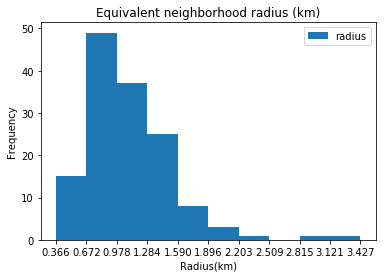

In [70]:
count,bin_edges = np.histogram(neighbourhoods_radius['radius'])
neighbourhoods_radius[['Neighbourhood','radius']].plot(kind='hist',xticks=bin_edges)
plt.title('Equivalent neighborhood radius (km)')
plt.xlabel('counts')
plt.xlabel('Radius(km)')
plt.show()

In [71]:
# The code was removed by Watson Studio for sharing.

In [72]:
radius = 500
limit = 200

We use the following function to query venues from Foursquare API and extract their latitude, longitude, name, and category. We merge this information with neighbourhood location data.

In [73]:
def getNearbyVenues(names,ids, latitudes, longitudes, radius=500,limit=200):
    venues_list=[]
    for name,id_,lat, lng in zip(names,ids, latitudes, longitudes):
        # create the API request URL
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}\
        &client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            radius, 
            limit)
            
        # make the GET request
        results = requests.get(url).json()["response"]['groups'][0]['items']
        print(name+', id='+str(id_)+', #venues = '+str(len(results)))
        # return only relevant information for each nearby venue
        venues_list.append([(
            name, 
            id_,
            lat, 
            lng, 
            v['venue']['name'], 
            v['venue']['location']['lat'], 
            v['venue']['location']['lng'],  
            v['venue']['categories'][0]['name']) for v in results])
    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ['Neighbourhood',
                             'Neighbourhood_id',
                  'Neighborhood Latitude', 
                  'Neighborhood Longitude', 
                  'Venue', 
                  'Venue Latitude', 
                  'Venue Longitude', 
                  'Venue Category']
    return(nearby_venues)

We run the function once and if it finishes successfully, we save the results into our project assets. Next time need to run the project, we only load the data from assets instead of querying the venues again. This is because Foursquare API has limitations on the number of queries we make. And sometime, the API is interrupted and does not provide results. By saving the results, we circumvent this issue.

In [74]:
if queryData:
    toronto_venues = getNearbyVenues(names=neighbourhoods['Neighbourhood'],
                                     ids = neighbourhoods['Neighbourhood_id'],
                                       latitudes=neighbourhoods['Latitude'],
                                       longitudes=neighbourhoods['Longitude']
                                      )
    h = project.save_data(data=toronto_venues.to_csv(index=False),file_name='toronto_venues.csv',overwrite=True)
toronto_venues = pd.read_csv(project.get_file('toronto_venues.csv'))
toronto_venues.head()

Neighbourhood  Neighbourhood_id  Neighborhood Latitude  \
0        Wychwood                94              43.676919   
1        Wychwood                94              43.676919   
2        Wychwood                94              43.676919   
3        Wychwood                94              43.676919   
4  Yonge-Eglinton               100              43.704689   

   Neighborhood Longitude                                    Venue  \
0              -79.425515           Wychwood Barns Farmers' Market   
1              -79.425515                           Wychwood Barns   
2              -79.425515                           Hillcrest Park   
3              -79.425515                        Marian Engel Park   
4              -79.403590  North Toronto Memorial Community Centre   

   Venue Latitude  Venue Longitude  Venue Category  
0       43.680010       -79.423849  Farmers Market  
1       43.680028       -79.423810     Event Space  
2       43.676012       -79.424787            Park  
3       43.673754       -79.423988            Park  
4       43.706098       -79.404337             Gym

Let's quickly check how many venues were returned altogether:

In [75]:
toronto_venues.shape

(2005, 8)

Below we check how many unique venue categories were returned from Foursquare API:

In [76]:
print('there are '+str(len(toronto_venues['Venue Category'].unique()))+' unique venue categories queried')

there are 282 unique venue categories queried


Also let's have a look at the venue categories themselves:

In [77]:
for aCat in toronto_venues['Venue Category'].unique():
    print(aCat)

Farmers Market
Event Space
Park
Gym
Burger Joint
Arts & Crafts Store
Plaza
Japanese Restaurant
Breakfast Spot
Gym / Fitness Center
Restaurant
Movie Theater
Persian Restaurant
Caribbean Restaurant
Skating Rink
Coffee Shop
Bakery
Fast Food Restaurant
Pizza Place
Buffet
Italian Restaurant
Sandwich Place
Salad Place
Bank
Poutine Place
Deli / Bodega
Gas Station
Department Store
Shopping Mall
Liquor Store
Supermarket
Bagel Shop
Tea Room
Sushi Restaurant
American Restaurant
Chiropractor
Yoga Studio
Café
Cantonese Restaurant
German Restaurant
Pub
Pharmacy
Grocery Store
Fried Chicken Joint
Sports Bar
Modern European Restaurant
Gastropub
Vietnamese Restaurant
Thai Restaurant
Massage Studio
Bar
Greek Restaurant
Bowling Alley
Seafood Restaurant
Paper / Office Supplies Store
Bookstore
Athletics & Sports
Furniture / Home Store
Garden
River
Home Service
Business Service
Bubble Tea Shop
BBQ Joint
Toy / Game Store
Ice Cream Shop
Asian Restaurant
Diner
Frozen Yogurt Shop
Clothing Store
Steakhouse
Hobby 

We used Foursquare API to query venues within 500 meters of each neighbourhood coordinates. All venue categories are inspected and we decided to divide venues into three main groups:

> a) __Food and drink__: This group include venues that has to do with either food or drinks and that have categories which contain either of the following keywords:  
Burger,Restaurant,Breakfast,Coffee,Bakery,Pizza,Buffet,Sandwich,Salad,Poutine,Bagel,Tea,Café,Pub, Chicken, Bar, BBQ, Ice Cream, Diner, Yogurt, Steakhouse, Chips, Brewery, Wings, Beer, Food, Taco, Cheese, Pie, Donut, Noodle House, Snack, Burrito, Pastry  

> b) __Recreation__: This group includes sport facilities, entertainment and places to visit for recreation and fun. Venue category keywords that are used here include the following, excluding the venues that match the Food and Drink group: Gym, Rink, Yoga, Bowling, Pool, Playground, Trail, Racetrack, Hockey, Rock Climbing, Tennis, Baseball, Soccer, Curling, Basketball, Stadium, Field, Athletics, Zoo, Beach, Museum, Entertainment, Garden, Theater.  

> c) __Shops and stores__: This group includes venues that are to do with shopping and different types of stores providing services and goods and include venues that have either of the following keywords in their venues category and are not listed in the previous two Food and Drink and Recreation categories: Market, Store, Shop, Supermarket, Tattoo, Nail, Shoe, Grocery.

The total number of venues in each category are counted for each neighbourhood and saved into a table. Once again, what we need for relative neighbourhood comparisons, is a version of the number of venues normalized by total population. So we have defined new features ‘food_drink_rate’, ‘recreation_rate’ and ‘shop_store_rate’, which, for each neighbourhood, as the number of corresponding venues in each category per 10,000 residents. 

In [78]:
food_drink_indices = np.unique(toronto_venues.index[toronto_venues['Venue Category'].str.
                                           contains('Burger|Restaurant|Breakfast|Coffee|Bakery|Pizza|Buffet|Sandwich|\
                                                    Salad|Poutine|Bagel|Tea|Café|Pub|Chicken|Bar|BBQ|Ice Cream|Diner|\
                                                    Yogurt|Steakhouse|Chips|Brewery|Wings|Beer|Food|Taco|Cheese|Pie|\
                                                    Donut|Noodle House|Snack|Burrito|Pastry',regex=True)])
recreation_indices = np.unique(toronto_venues.index[toronto_venues['Venue Category'].str.
                                           contains('Gym|Rink|Yoga|Bowling|Pool|Playground|Trail|Racetrack|Hockey|Rock Climbing|\
                                           Tennis|Baseball|Soccer|Curling|Basketball|Stadium|Field|Athletics|Zoo|Beach|\
                                           Museum|Entertainment|Garden|Theater',regex=True)])
recreation_indices = [aInd for aInd in recreation_indices if aInd not in food_drink_indices]

shop_store_indices =  toronto_venues.index[toronto_venues['Venue Category'].str.
                                           contains('Market|Store|Shop|Supermarket|Tattoo|Nail|Shoe|Grocery',regex=True)]
shop_store_indices  = [aInd for aInd in shop_store_indices if aInd not in food_drink_indices and aInd not in recreation_indices]

venues_food_drink_df = toronto_venues.loc[food_drink_indices]
venues_recreation_df = toronto_venues.loc[recreation_indices]
venues_shop_store_df = toronto_venues.loc[shop_store_indices]

Let's check out the first few rows from each group to ensure everything looks good:

In [79]:
venues_food_drink_df.head()

Neighbourhood  Neighbourhood_id  Neighborhood Latitude  \
5   Yonge-Eglinton               100              43.704689   
9   Yonge-Eglinton               100              43.704689   
10  Yonge-Eglinton               100              43.704689   
12  Yonge-Eglinton               100              43.704689   
14  Yonge-Eglinton               100              43.704689   

    Neighborhood Longitude                                        Venue  \
5                -79.40359                                 Burger Shack   
9                -79.40359                               Sake Bar Kushi   
10               -79.40359                         Boom Breakfast & Co.   
12               -79.40359  The Keg Steakhouse + Bar - Yonge + Eglinton   
14               -79.40359                                       Darbar   

    Venue Latitude  Venue Longitude       Venue Category  
5        43.704855       -79.406067         Burger Joint  
9        43.704923       -79.406954  Japanese Restaurant  
10       43.705748       -79.403482       Breakfast Spot  
12       43.705702       -79.397905           Restaurant  
14       43.704863       -79.407746   Persian Restaurant

In [80]:
venues_recreation_df.head()

Neighbourhood  Neighbourhood_id  Neighborhood Latitude  \
4   Yonge-Eglinton               100              43.704689   
11  Yonge-Eglinton               100              43.704689   
13  Yonge-Eglinton               100              43.704689   
16  Yonge-Eglinton               100              43.704689   
30  Yonge-Eglinton               100              43.704689   

    Neighborhood Longitude                                           Venue  \
4                -79.40359         North Toronto Memorial Community Centre   
11               -79.40359                                SXS Fitness Inc.   
13               -79.40359                   Cineplex VIP Yonge & Eglinton   
16               -79.40359                    North Toronto Memorial Arena   
30               -79.40359  GoodLife Fitness Toronto Yonge Eglinton Centre   

    Venue Latitude  Venue Longitude        Venue Category  
4        43.706098       -79.404337                   Gym  
11       43.704774       -79.406466  Gym / Fitness Center  
13       43.706515       -79.398950         Movie Theater  
16       43.707123       -79.404662          Skating Rink  
30       43.707276       -79.399562                   Gym

In [81]:
venues_shop_store_df.head()

Neighbourhood  Neighbourhood_id  Neighborhood Latitude  \
0         Wychwood                94              43.676919   
7   Yonge-Eglinton               100              43.704689   
39  Yonge-Eglinton               100              43.704689   
40  Yonge-Eglinton               100              43.704689   
41  Yonge-Eglinton               100              43.704689   

    Neighborhood Longitude                           Venue  Venue Latitude  \
0               -79.425515  Wychwood Barns Farmers' Market       43.680010   
7               -79.403590                        DeSerres       43.705988   
39              -79.403590                         Winners       43.706757   
40              -79.403590    RioCan Yonge Eglinton Centre       43.707357   
41              -79.403590                            LCBO       43.704288   

    Venue Longitude       Venue Category  
0        -79.423849       Farmers Market  
7        -79.402233  Arts & Crafts Store  
39       -79.398987     Department Store  
40       -79.398700        Shopping Mall  
41       -79.409261         Liquor Store

We now count the number of venues in each neighbourhood for each of the groups and then merge the results into a new dataframe that will have all three venue groups.

In [82]:
#shops and stores
shop_store_df = venues_shop_store_df.groupby(['Neighbourhood','Neighbourhood_id']).count()
shop_store_df.reset_index(inplace=True)
shop_store_df = shop_store_df[['Neighbourhood','Neighbourhood_id','Venue Category']]
shop_store_df.rename(columns={'Venue Category':'shop_store#'},inplace=True)
#food and drinks
food_drink_df = venues_food_drink_df.groupby(['Neighbourhood','Neighbourhood_id']).count()
food_drink_df.reset_index(inplace=True)
food_drink_df = food_drink_df[['Neighbourhood','Neighbourhood_id','Venue Category']]
food_drink_df.rename(columns={'Venue Category':'food_drink#'},inplace=True)
#recreation
recreation_df = venues_recreation_df.groupby(['Neighbourhood','Neighbourhood_id']).count()
recreation_df.reset_index(inplace=True)
recreation_df = recreation_df[['Neighbourhood','Neighbourhood_id','Venue Category']]
recreation_df.rename(columns={'Venue Category':'recreation#'},inplace=True)
###merge the three groups
venue_number_grouped = pd.merge(shop_store_df, food_drink_df, how='outer', on=['Neighbourhood','Neighbourhood_id'])
venue_number_grouped = pd.merge(venue_number_grouped, recreation_df, how='outer', on=['Neighbourhood','Neighbourhood_id'])
venue_number_grouped.head()

Neighbourhood  Neighbourhood_id  shop_store#  food_drink#  \
0               Agincourt North               129          5.0         11.0   
1  Agincourt South-Malvern West               128          2.0         14.0   
2                     Alderwood                20          1.0          3.0   
3                         Annex                95          3.0         15.0   
4             Banbury-Don Mills                42         11.0          8.0   

   recreation#  
0          NaN  
1          1.0  
2          NaN  
3          NaN  
4          1.0

The NaN values, which mean that no venue for a specific venue group was returned for a neighbourhood from Forsquare API, are replaced by zero.  
To calculate venue group rates, we also add the neighbourhood total populations to the resulting dataframe which is then used for normalizing the number of venue groups per each neighbourhood. A snapshot of the venue group rates is shown below:

In [83]:
venue_number_grouped.fillna({'shop_store#':0, 'food_drink#':0,'recreation#':0}, inplace=True) 
venue_number_grouped = venue_number_grouped.merge(neighbourhoods[['Neighbourhood_id','Total Population']],on='Neighbourhood_id', how='inner')
for aCol in ['shop_store#','food_drink#','recreation#']:
    new_col = aCol.replace('#','_rate')
    venue_number_grouped[new_col] = 10000*venue_number_grouped[aCol]/venue_number_grouped['Total Population']
venue_number_grouped[['Neighbourhood','Neighbourhood_id','shop_store_rate','food_drink_rate','recreation_rate']].head()

Neighbourhood  Neighbourhood_id  shop_store_rate  \
0               Agincourt North               129         1.651255   
1  Agincourt South-Malvern West               128         0.909504   
2                     Alderwood                20         0.840336   
3                         Annex                95         1.028101   
4             Banbury-Don Mills                42         4.087700   

   food_drink_rate  recreation_rate  
0         3.632761         0.000000  
1         6.366530         0.454752  
2         2.521008         0.000000  
3         5.140507         0.000000  
4         2.972873         0.371609

And we can now merge the venue rate information to the neighbourhood feature table. Note we replace the NaN values (if a neighbourhood did not have any rate calculated for in either of the venue groups) with zeros as well.

In [84]:
neighbourhoods = neighbourhoods.merge(venue_number_grouped[['Neighbourhood_id','shop_store_rate','food_drink_rate','recreation_rate']],on='Neighbourhood_id', how='outer')
neighbourhoods.fillna({'shop_store_rate':0.0, 'food_drink_rate':0.0,'recreation_rate':0.0}, inplace=True) 
neighbourhoods.head()

Neighbourhood_id            Neighbourhood   Latitude  Longitude  \
0                94                 Wychwood  43.676919 -79.425515   
1               100           Yonge-Eglinton  43.704689 -79.403590   
2                97           Yonge-St.Clair  43.687859 -79.397871   
3                27  York University Heights  43.765736 -79.488883   
4                31       Yorkdale-Glen Park  43.714672 -79.457108   

   school_rate  Home Prices  Total Population   crime_rate  median_income  \
0    28.653295       656868             13985  1573.114051          50261   
1    70.175439       975449             10580  2164.461248          63267   
2    18.867925       995616             11655   952.380952          58838   
3    43.577982       359372             27715  2799.927837          42916   
4    48.458150       421045             14685  3752.128022          49803   

   average_rent  ...  Unemployment rate  Median commuting duration  \
0           930  ...                7.6                       91.3   
1          1246  ...                5.7                       60.4   
2          1314  ...                7.0                      106.3   
3           911  ...               11.4                      152.2   
4           916  ...               10.2                       91.3   

   Population_density  post_secondary_percent  Tree_cover_rate  Walk Score  \
0         8324.404762               61.343764         0.325880          86   
1         6412.121212               78.147532         0.549877          89   
2         9961.538462               84.869976         0.367762          84   
3         2094.860166               47.081967         0.745954          60   
4         2431.291391               41.752577         0.471782          72   

   TTC_stops_rate  shop_store_rate  food_drink_rate  recreation_rate  
0       44.333214         0.715052         0.000000         0.000000  
1       63.327032         4.725898        21.739130         4.725898  
2       24.024024         3.432003        35.178035         2.574003  
3       84.791629         0.000000         2.164893         0.000000  
4      105.549881         2.042901         8.852571         1.361934  

[5 rows x 22 columns]

Now we have all the information we were looking for in terms of features. We have done all the necessary normalization to calculate rates if needed, therefore, we can now drop the land area and total population columns because they are not the features that we are going to use for our study. 

In [85]:
neighbourhoods.drop(['Total Population','Land area in square kilometres'],axis = 1,inplace=True)
neighbourhoods.head()

Neighbourhood_id            Neighbourhood   Latitude  Longitude  \
0                94                 Wychwood  43.676919 -79.425515   
1               100           Yonge-Eglinton  43.704689 -79.403590   
2                97           Yonge-St.Clair  43.687859 -79.397871   
3                27  York University Heights  43.765736 -79.488883   
4                31       Yorkdale-Glen Park  43.714672 -79.457108   

   school_rate  Home Prices   crime_rate  median_income  average_rent  \
0    28.653295       656868  1573.114051          50261           930   
1    70.175439       975449  2164.461248          63267          1246   
2    18.867925       995616   952.380952          58838          1314   
3    43.577982       359372  2799.927837          42916           911   
4    48.458150       421045  3752.128022          49803           916   

   Employment rate  Unemployment rate  Median commuting duration  \
0             61.6                7.6                       91.3   
1             68.2                5.7                       60.4   
2             66.3                7.0                      106.3   
3             52.6               11.4                      152.2   
4             53.6               10.2                       91.3   

   Population_density  post_secondary_percent  Tree_cover_rate  Walk Score  \
0         8324.404762               61.343764         0.325880          86   
1         6412.121212               78.147532         0.549877          89   
2         9961.538462               84.869976         0.367762          84   
3         2094.860166               47.081967         0.745954          60   
4         2431.291391               41.752577         0.471782          72   

   TTC_stops_rate  shop_store_rate  food_drink_rate  recreation_rate  
0       44.333214         0.715052         0.000000         0.000000  
1       63.327032         4.725898        21.739130         4.725898  
2       24.024024         3.432003        35.178035         2.574003  
3       84.791629         0.000000         2.164893         0.000000  
4      105.549881         2.042901         8.852571         1.361934

## 3. Methodology

We can divide this section into two parts. In the first part we will be looking into the input data and features we have prepared in the previous section and try to get more insight about the data to answer a few questions such as: what is the distribution of each feature among all neighbourhood like? Are there any outliers standing out from the rest of neighbourhoods in each category? How correlated are different features? We obviously need to reduce the number of linearly dependent features which may skew our neighbourhood clustering results.  

In the second part, we discuss the clustering technique (kmeans) that we use to categorize the neighbourhoods based on the features we ended up keeping and the reasoning behind choosing its parameters. 

### 3.1. Exploratory data analysis

In the first step we plot the feature correlation heatmap to identify the highly correlated features. We need to reduce the number of linearly correlated features that can skew the clustering results. We calculate Pearson correlation values and use the _Seaborn_ library to plot them below. The positive and negative correlations are shown in blue and red, respectively.

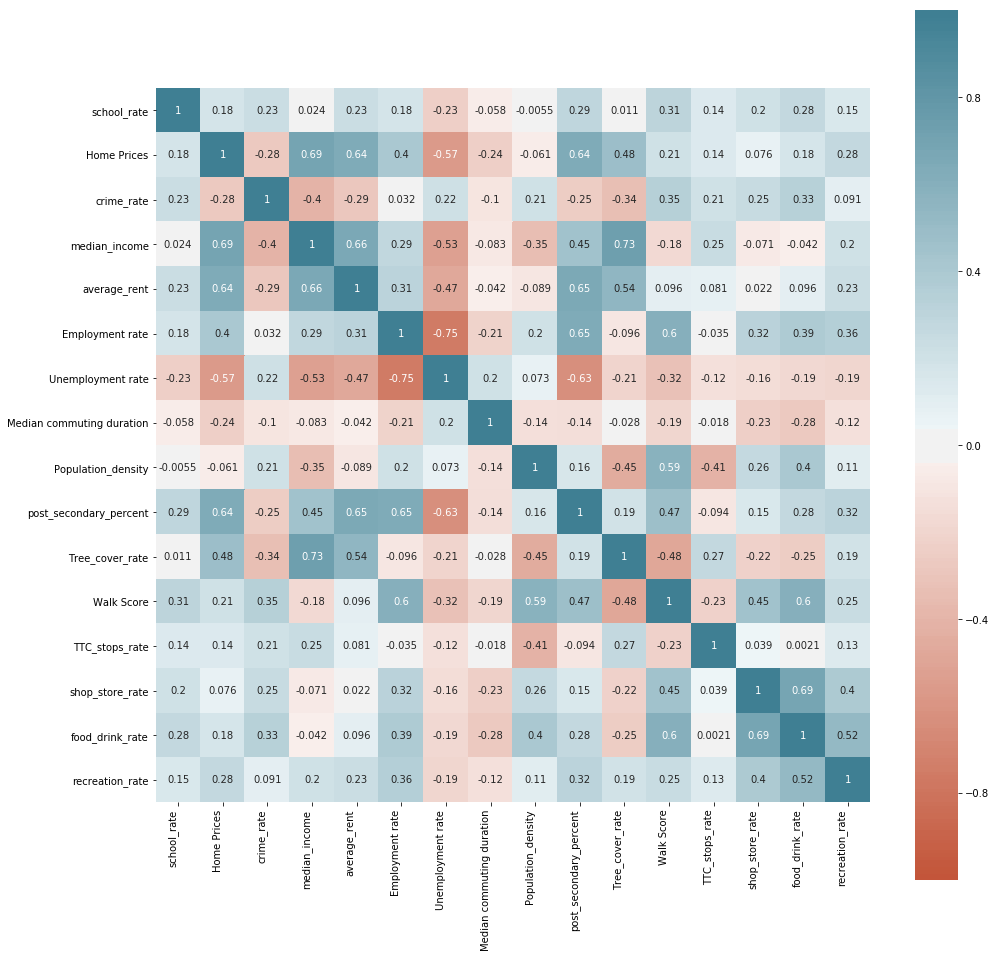

In [86]:
feature_data = neighbourhoods.copy()
feature_data = feature_data.drop(['Neighbourhood_id','Neighbourhood', 'Longitude', 'Latitude',],axis = 1)
corr = feature_data.corr()
figure = plt.figure(figsize=(16,16))
ax = sns.heatmap(corr,vmin=-1,vmax=1,center=0,cmap=sns.diverging_palette(20,220,n=200),annot = True,square=True)
ax.set_xticklabels(ax.get_xticklabels(),horizontalalignment='right')
plt.show()

From this plot, the largest (absolute) correlation is between employment and unemployment rates. The correlation is -0.75, which means they have a negative linear correlation. The larger the employment rate, the lower the unemployment rate. This is actually trivial. One would expect to see this correlation between the two. Therefore, we only keep one of them (unemployment rate) for the rest of our study. The correlation between the two can be seen below in the regression plot of the two features.

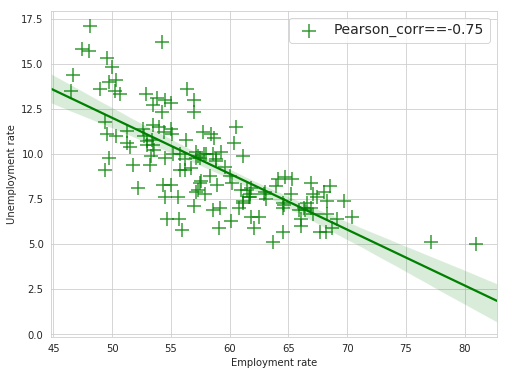

In [87]:
fig = plt.figure(figsize=(8,6))
sns.set_style('whitegrid')
x = neighbourhoods['Employment rate']
y = neighbourhoods['Unemployment rate']
corr = pearsonr(x, y)
text = 'Pearson_corr==%s' % (np.round(corr[0], 2))
ax = sns.regplot(x, y,color='g',marker='+',scatter_kws={'s':200},label = text)
ax.legend(fontsize=14)

We drop the employment column below.

In [88]:
neighbourhoods.drop(['Employment rate'],axis = 1,inplace=True)

This is the only column we are going to remove from the feature space. One may argue that there are other features that also seem to show high correlation and may need to be removed. But this correlation is not trivial and each of them seem to be important on its own and not necessarily controlling the other parameter directly. For instance, we see a correlation of 0.73 between median income and tree cover rate. However, in reality, these two features are not dependent on each other. So we keep both.

Let's also check out some quick descriptive statistics of the features:

In [89]:
feature_data = feature_data.drop(['Employment rate',],axis = 1)
feature_data.describe()

school_rate   Home Prices   crime_rate  median_income  average_rent  \
count   140.000000  1.400000e+02   140.000000     140.000000    140.000000   
mean     34.468283  5.481934e+05  1889.992578   55426.500000   1019.792857   
std      20.671702  2.676674e+05   865.568201   16118.155356    219.621994   
min       0.000000  2.041040e+05   709.272257   30794.000000    631.000000   
25%      21.414998  3.749645e+05  1240.737724   46689.500000    878.500000   
50%      29.925373  4.912100e+05  1722.522762   52660.000000    972.500000   
75%      41.301279  5.902160e+05  2299.049581   59963.000000   1124.750000   
max     135.338346  1.849084e+06  5646.842428  161448.000000   2388.000000   

       Unemployment rate  Median commuting duration  Population_density  \
count         140.000000                 140.000000          140.000000   
mean            9.370714                 115.929286         5984.749355   
std             2.622166                  53.566310         4532.568101   
min             5.000000                  51.600000          978.114478   
25%             7.400000                  76.825000         3513.160699   
50%             8.950000                  97.150000         5057.701699   
75%            11.000000                 147.900000         7267.396825   
max            17.100000                 314.200000        42440.476190   

       post_secondary_percent  Tree_cover_rate  Walk Score  TTC_stops_rate  \
count              140.000000       140.000000  140.000000      140.000000   
mean                58.428147         0.716240   72.271429       38.586365   
std                 12.258446         0.666828   12.790421       17.101158   
min                 29.810855         0.034567   42.000000       10.659187   
25%                 49.853099         0.339678   62.000000       26.596653   
50%                 57.860139         0.550217   70.500000       36.565185   
75%                 68.160806         0.901491   83.000000       45.232003   
max                 84.869976         6.321555   99.000000      105.549881   

       shop_store_rate  food_drink_rate  recreation_rate  
count       140.000000       140.000000       140.000000  
mean          1.482318         5.385263         0.689748  
std           2.610632         8.212340         1.069425  
min           0.000000         0.000000         0.000000  
25%           0.000000         0.355772         0.000000  
50%           0.779270         2.129567         0.372825  
75%           1.823236         5.820956         0.948159  
max          20.960699        44.415415         6.099553

What stands out from this table is that there are neighbourhoods with zero school rate (no schools at all), and zero shops_store and recreation and food_drink rates. This can really affect the decision of potential residents negatively.

In order to make better sense of the input data, we also visualize each of the features in the form of horizontal bar plots. This way, we investigate each feature separately across all neighbourhoods and better spot any neighbourhoods that show anomalously high or low value for that feature. 

/opt/conda/envs/Python36/lib/python3.6/site-packages/matplotlib/pyplot.py:514: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


<Figure size 432x288 with 0 Axes>

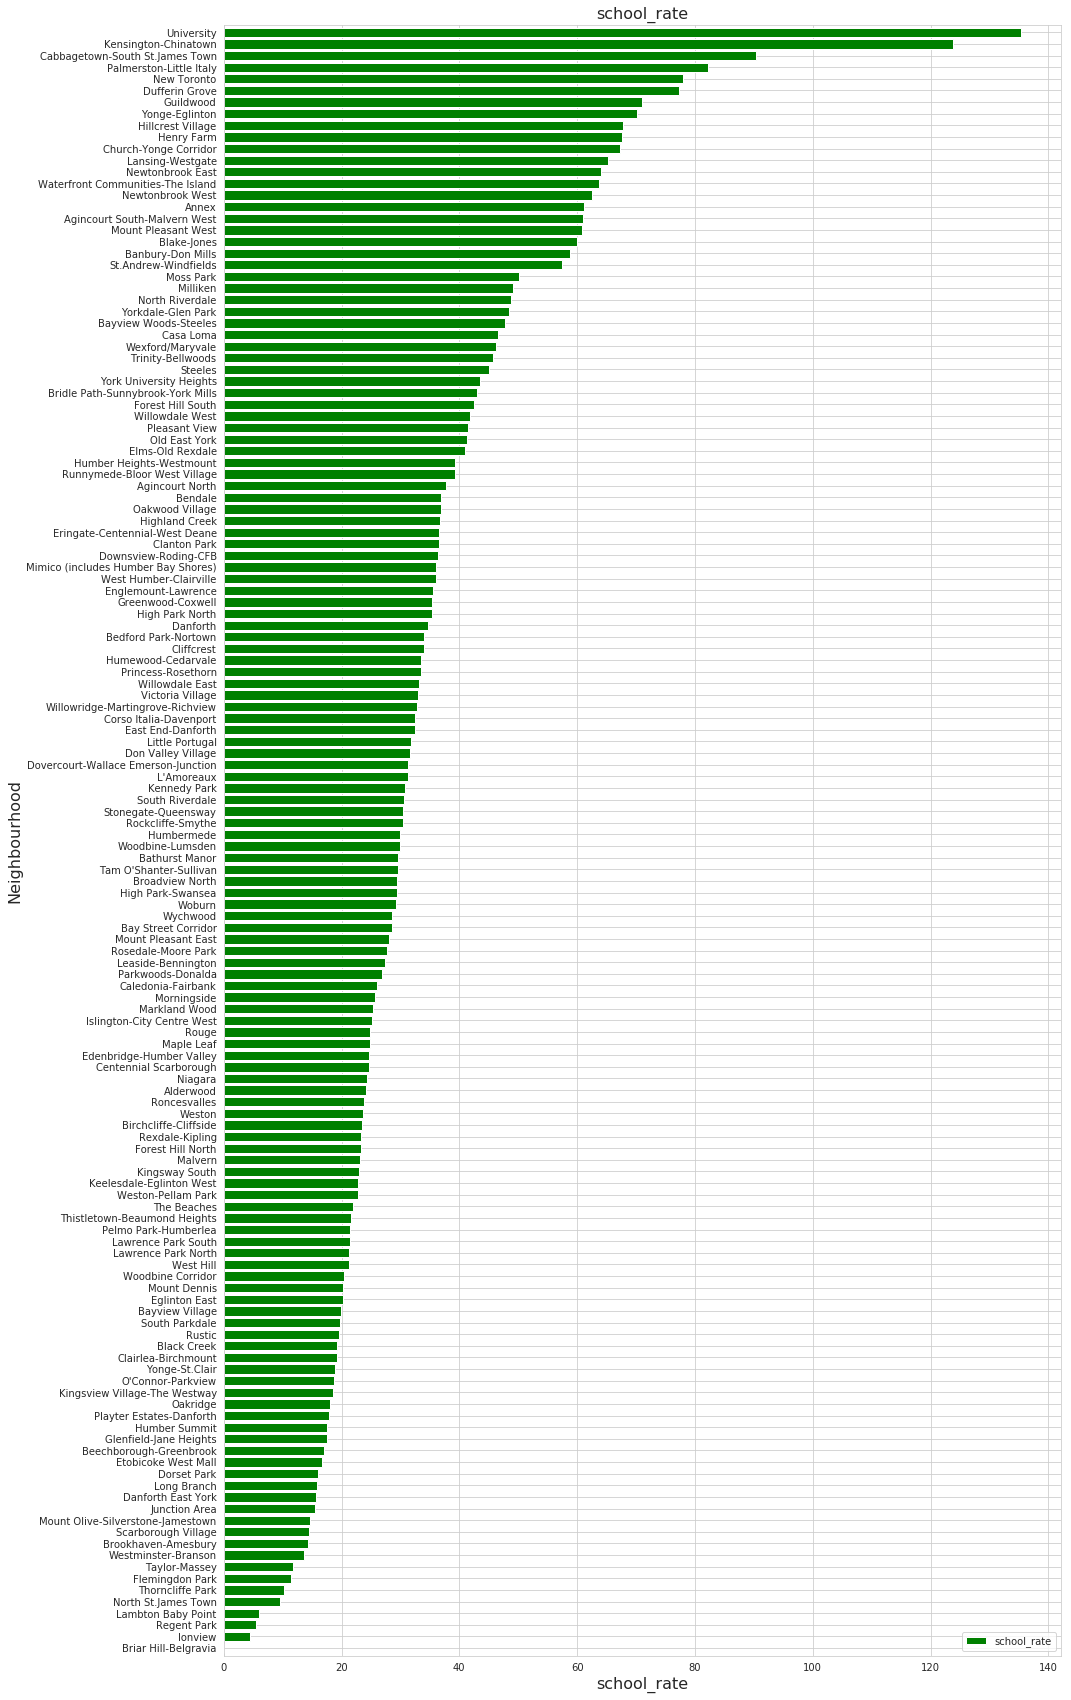

<Figure size 432x288 with 0 Axes>

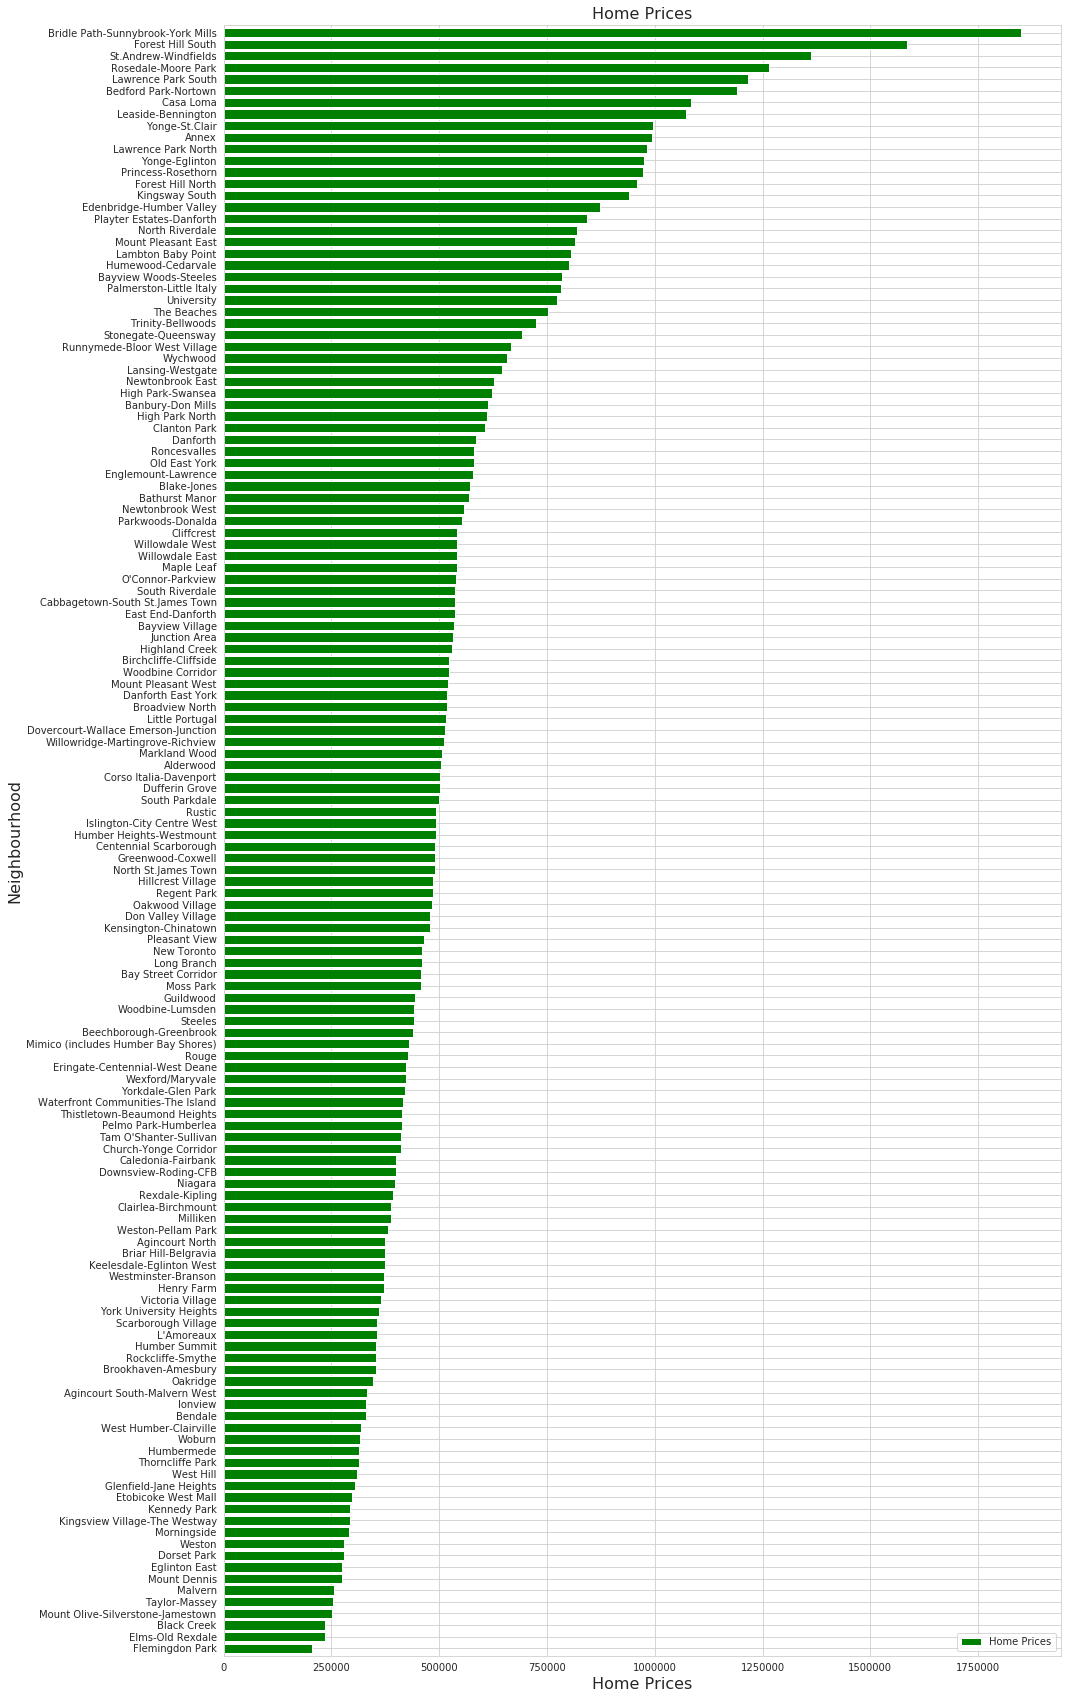

<Figure size 432x288 with 0 Axes>

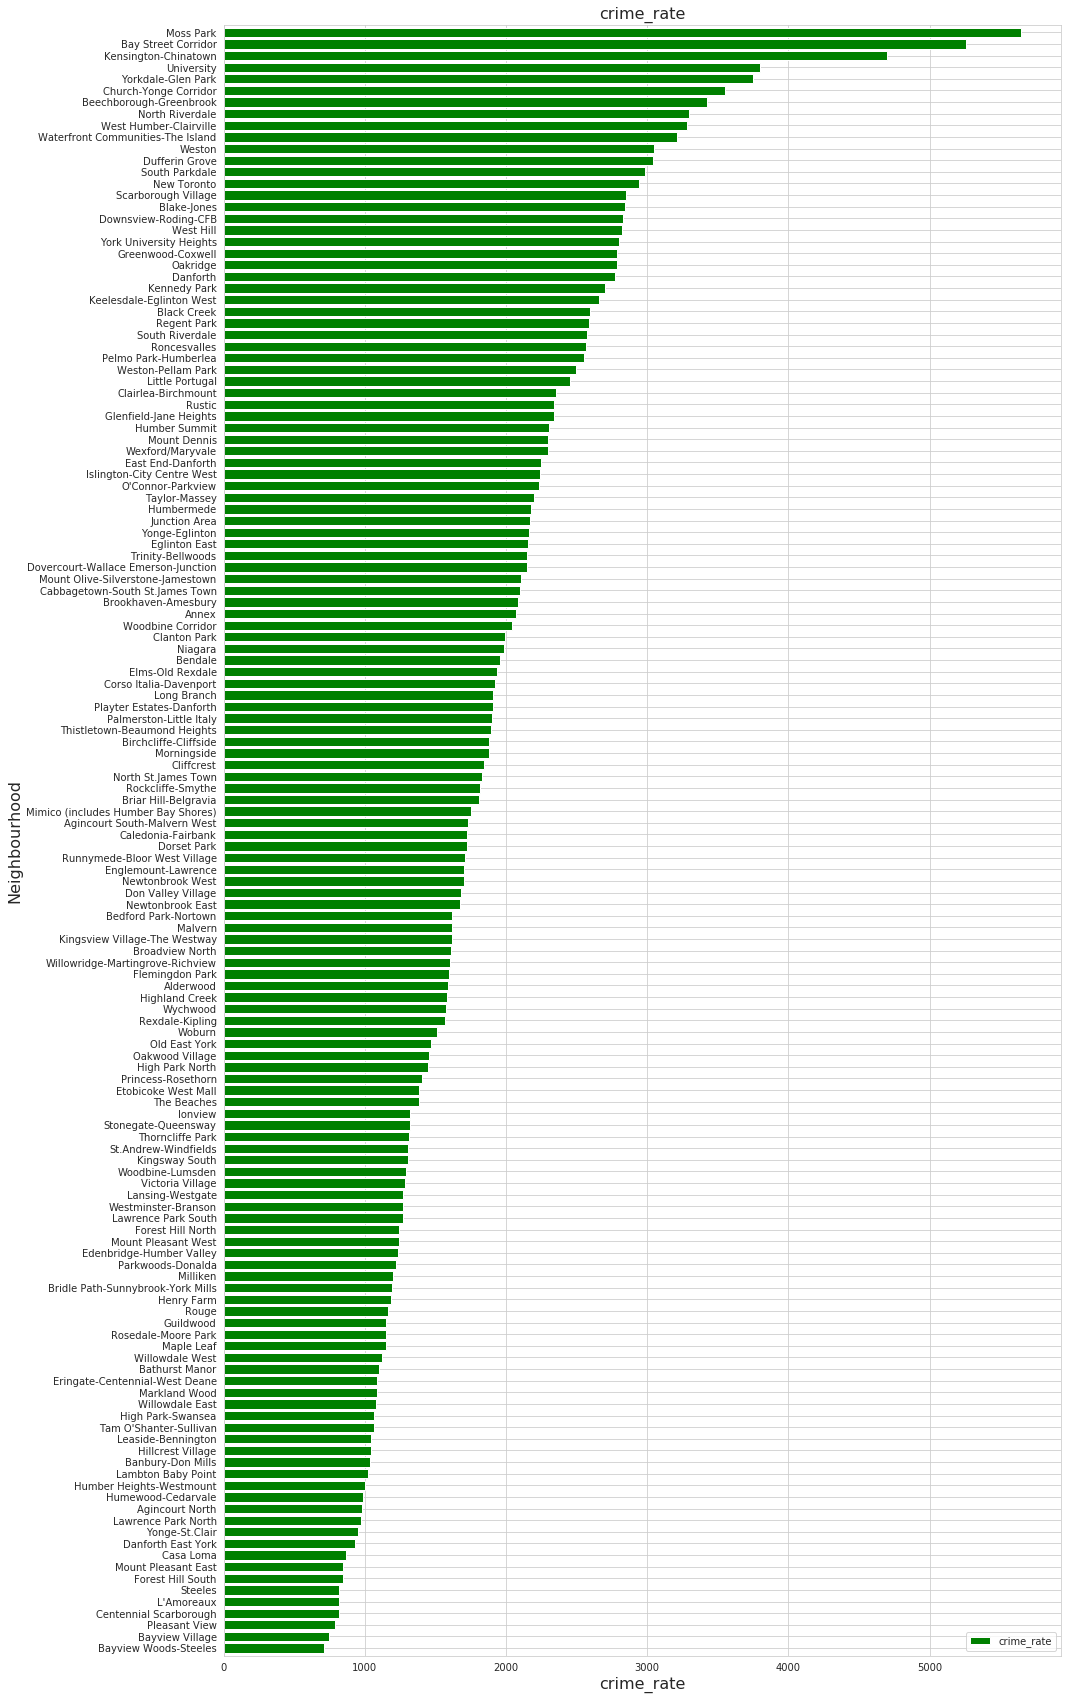

<Figure size 432x288 with 0 Axes>

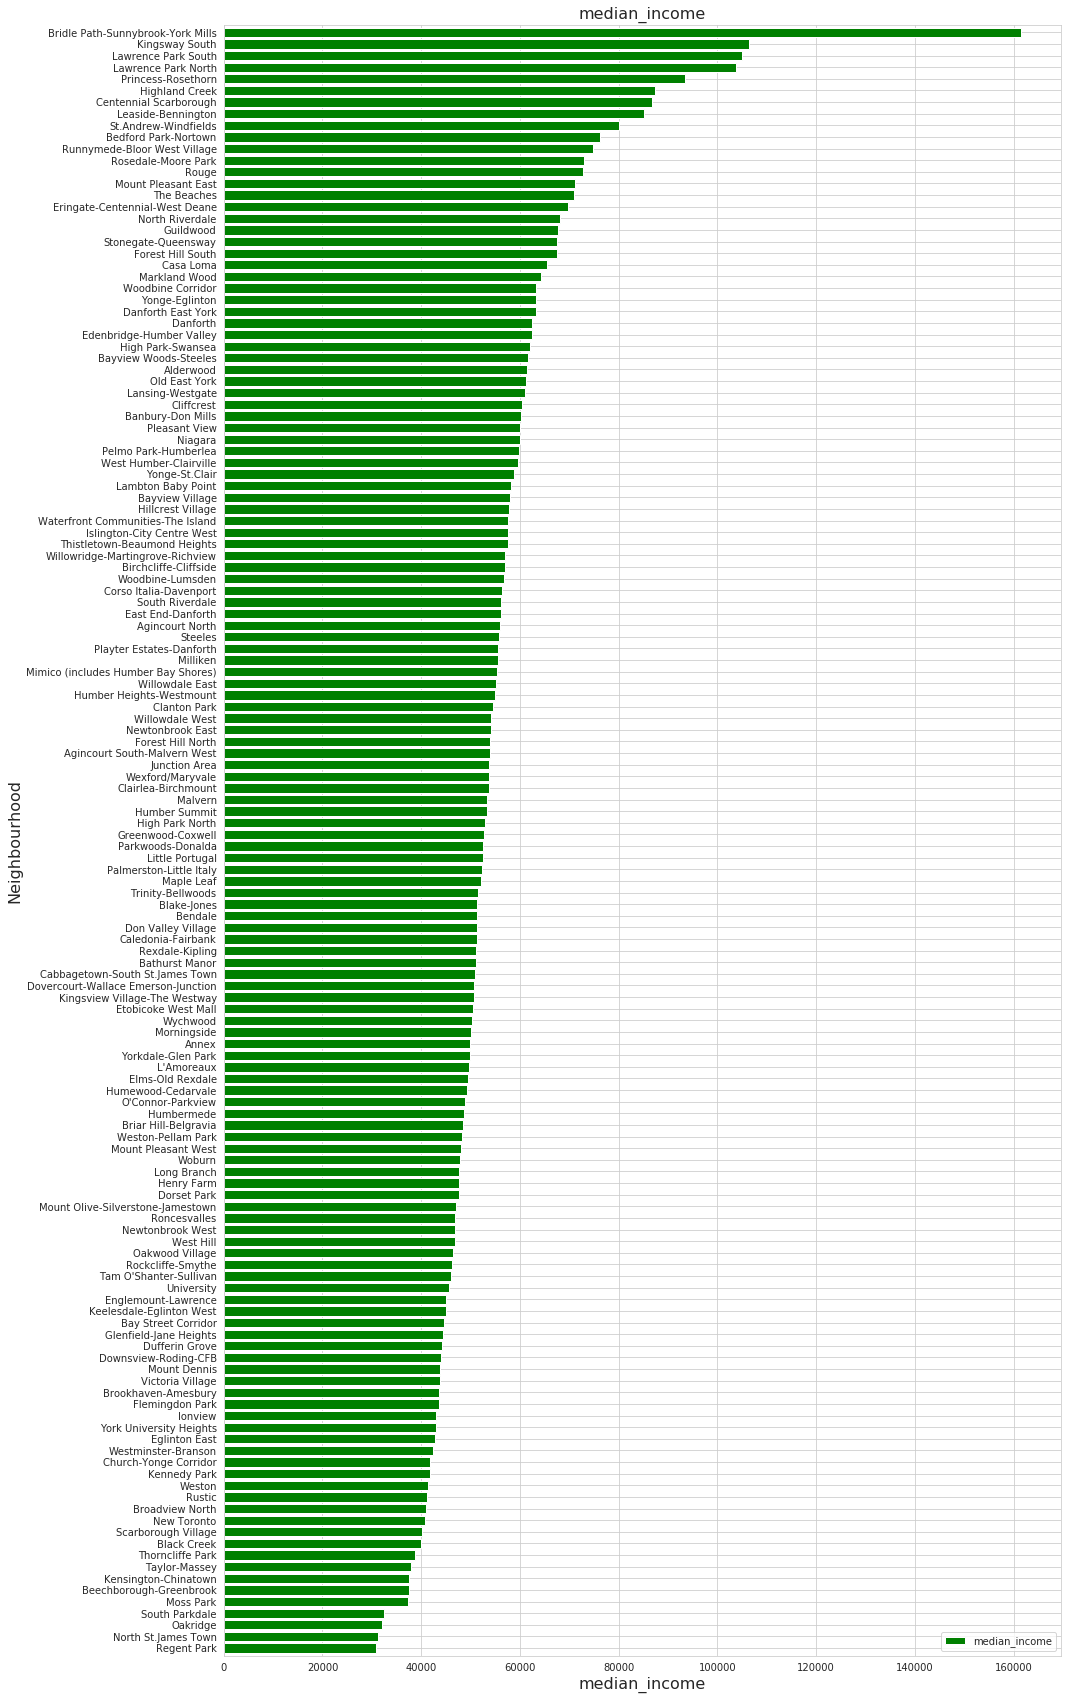

<Figure size 432x288 with 0 Axes>

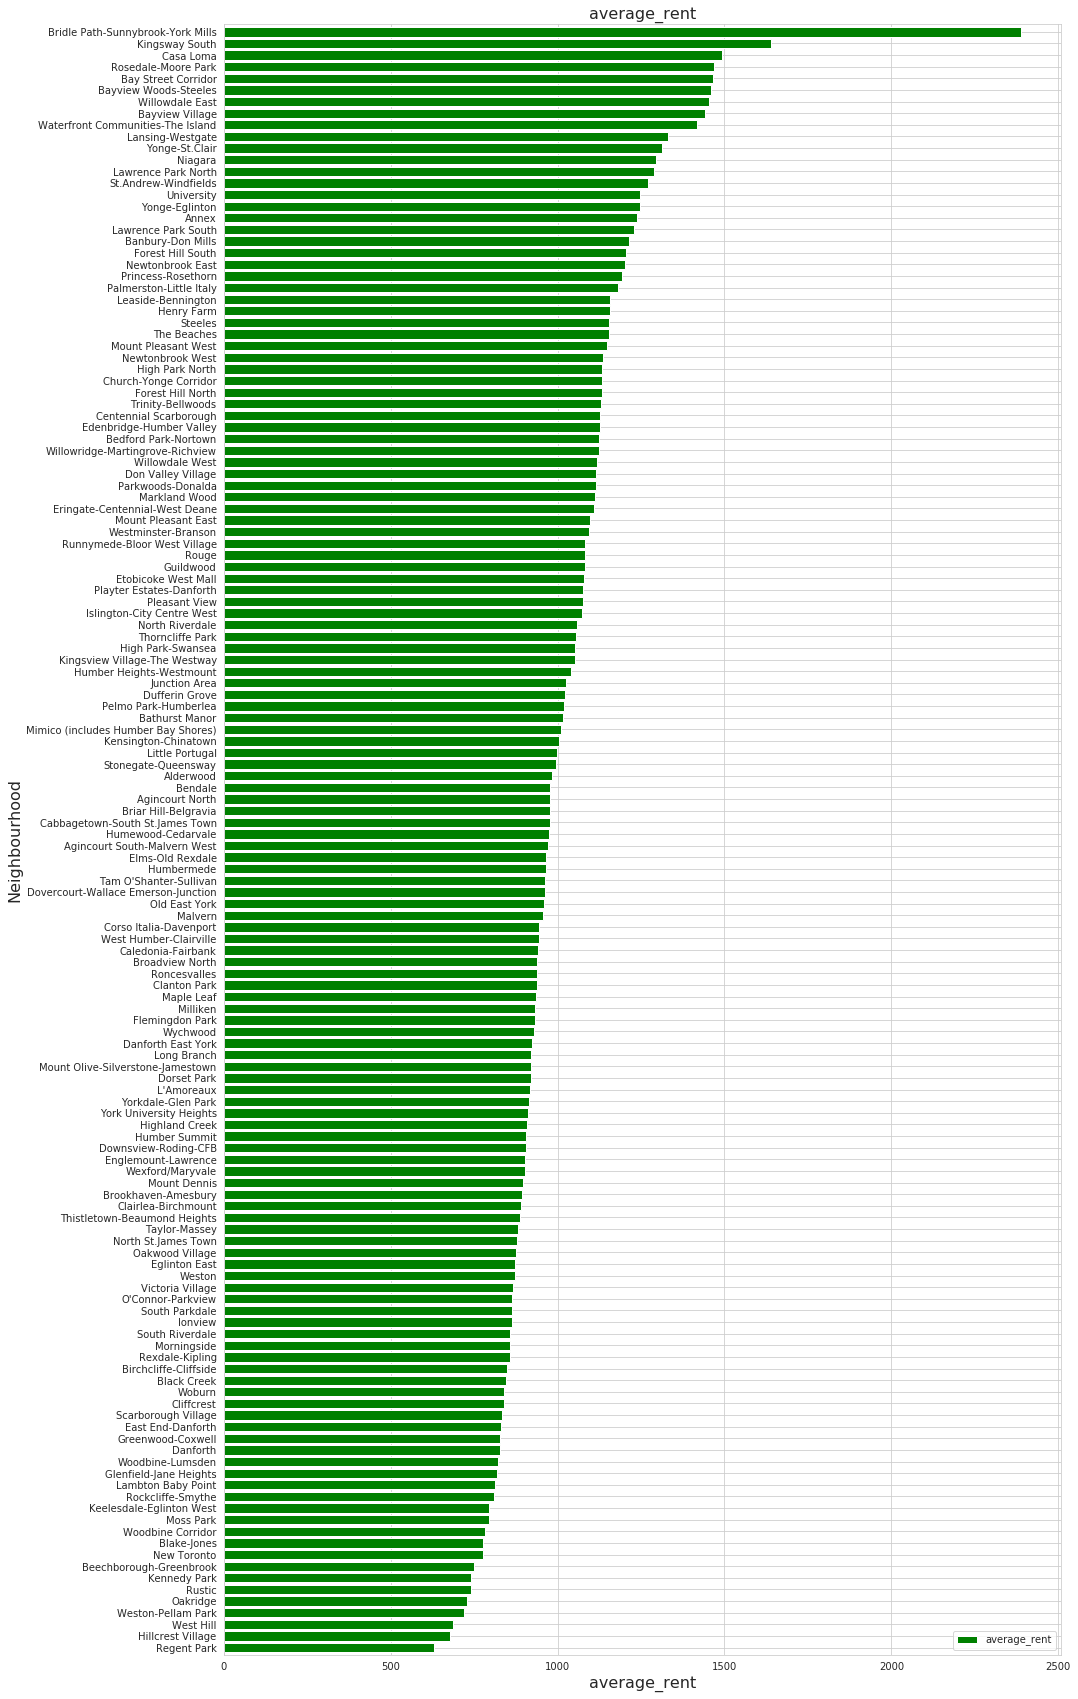

<Figure size 432x288 with 0 Axes>

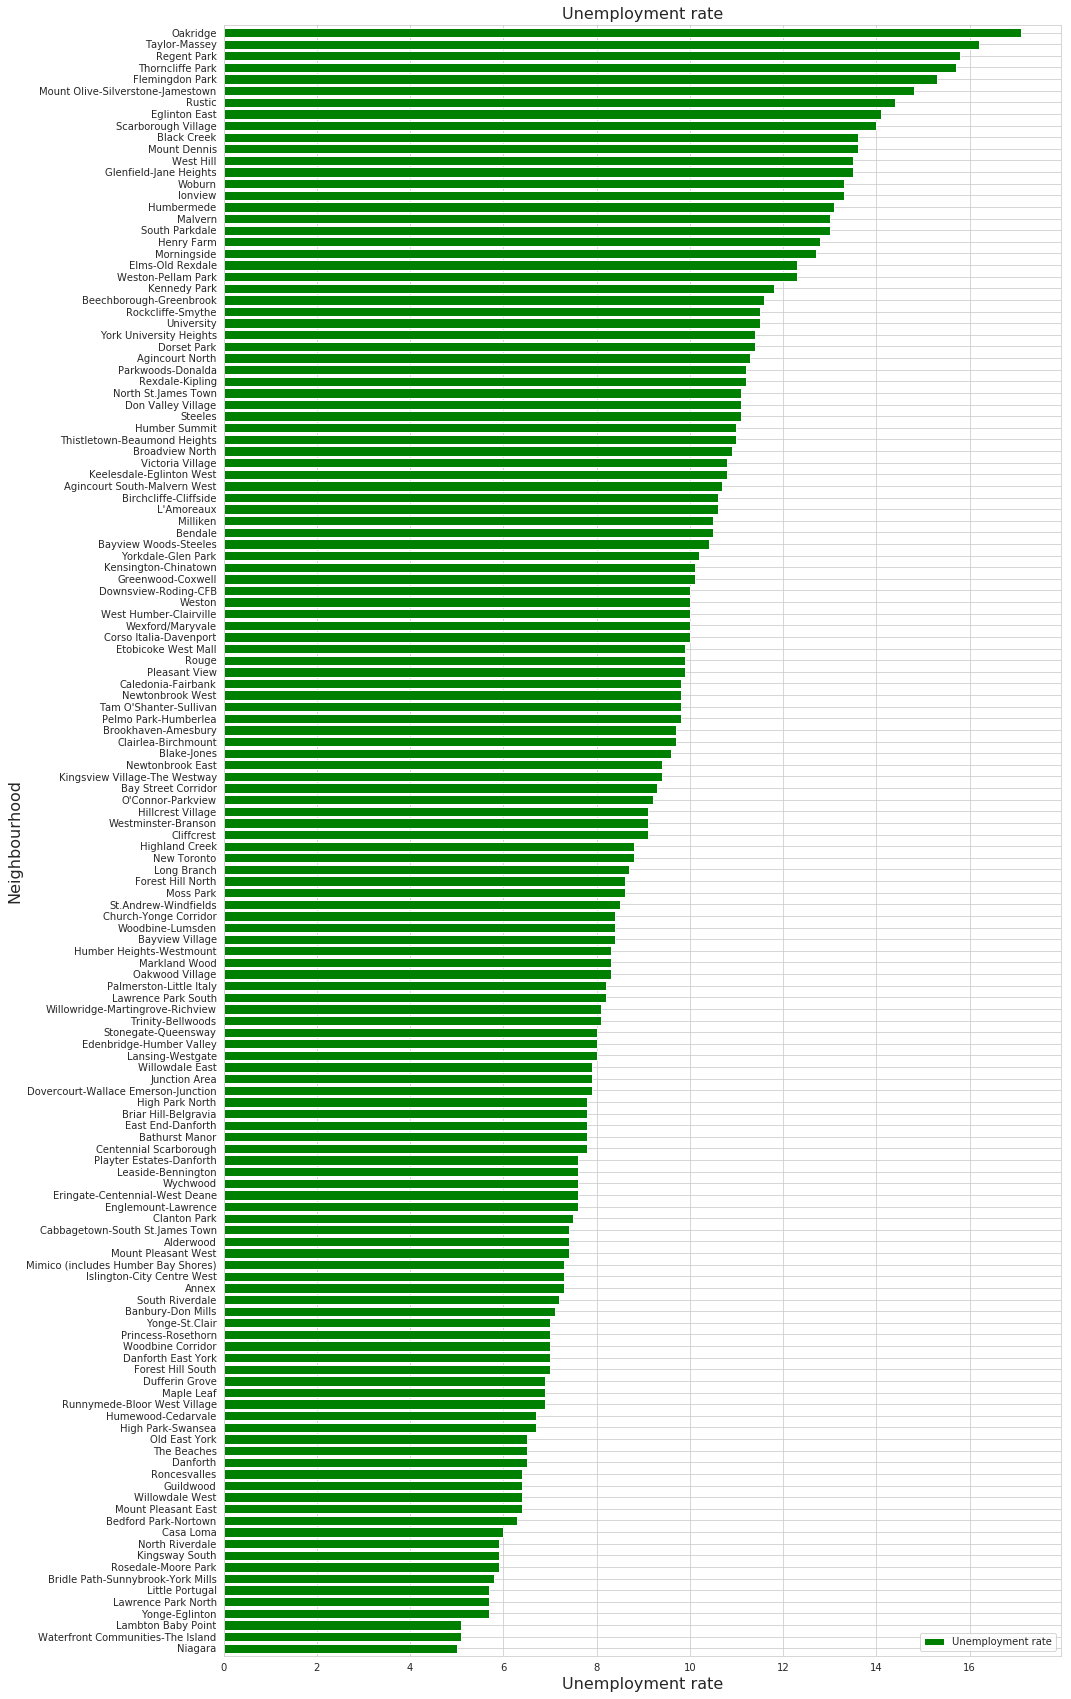

<Figure size 432x288 with 0 Axes>

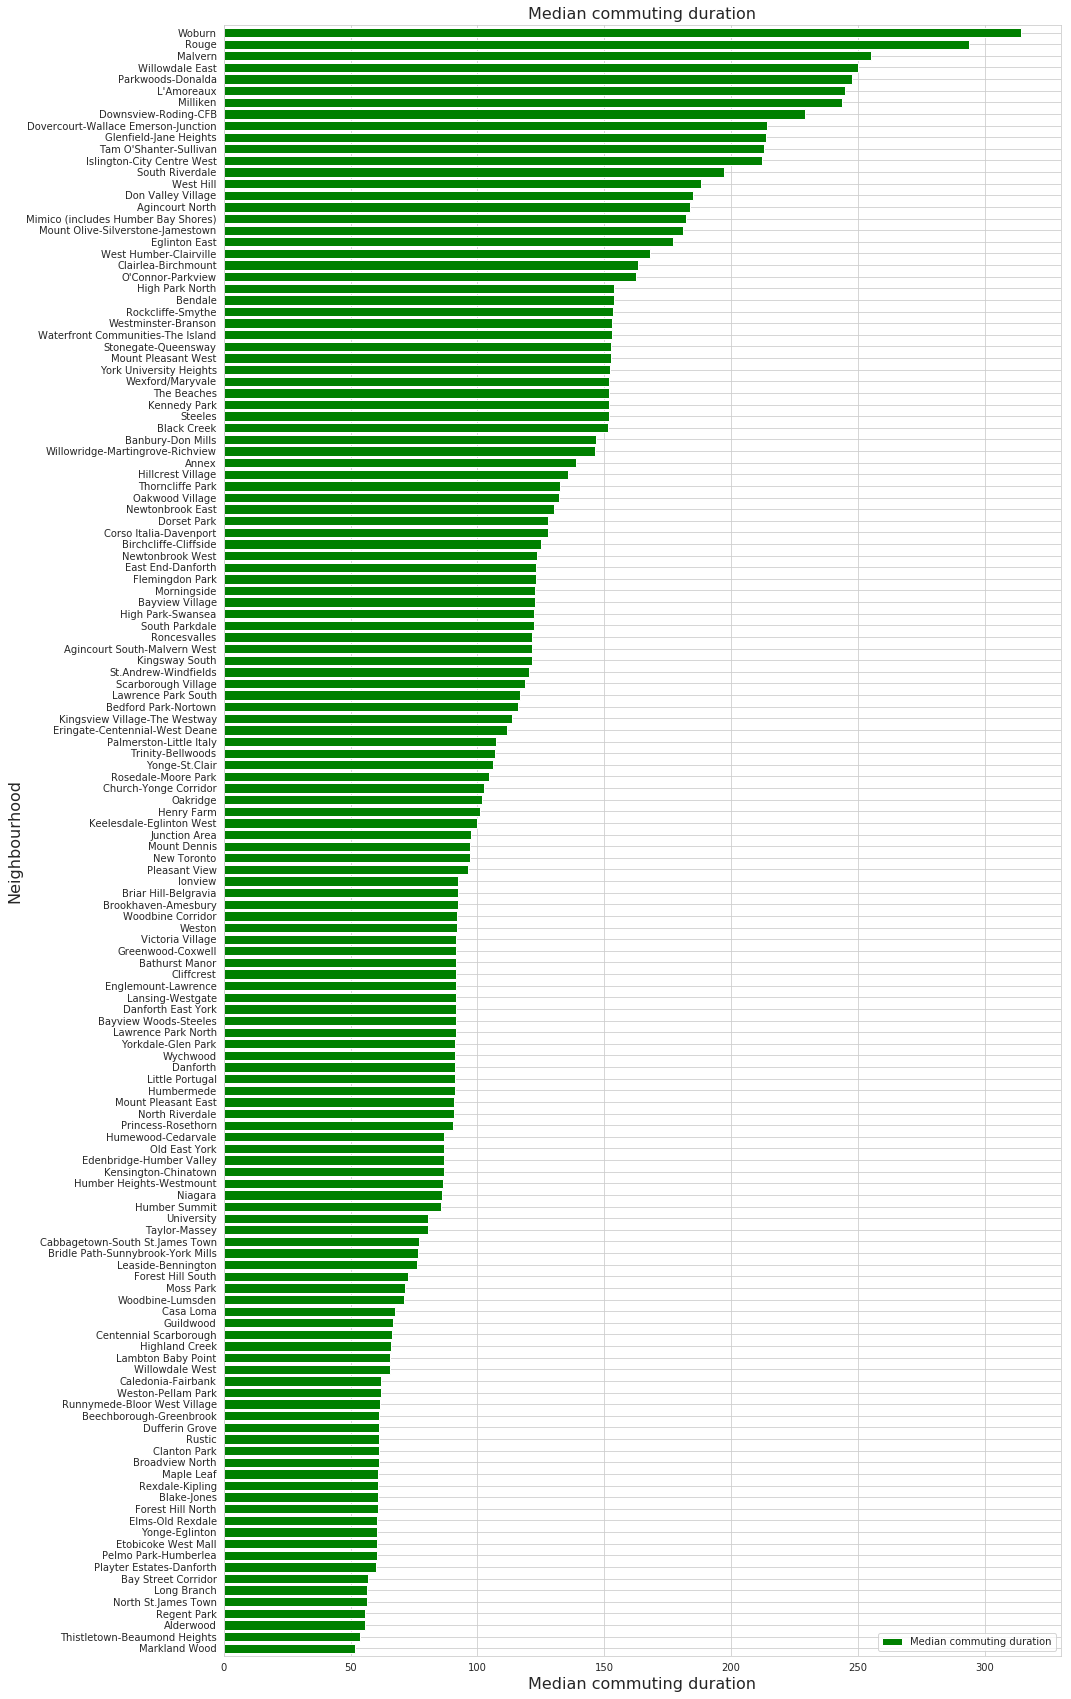

<Figure size 432x288 with 0 Axes>

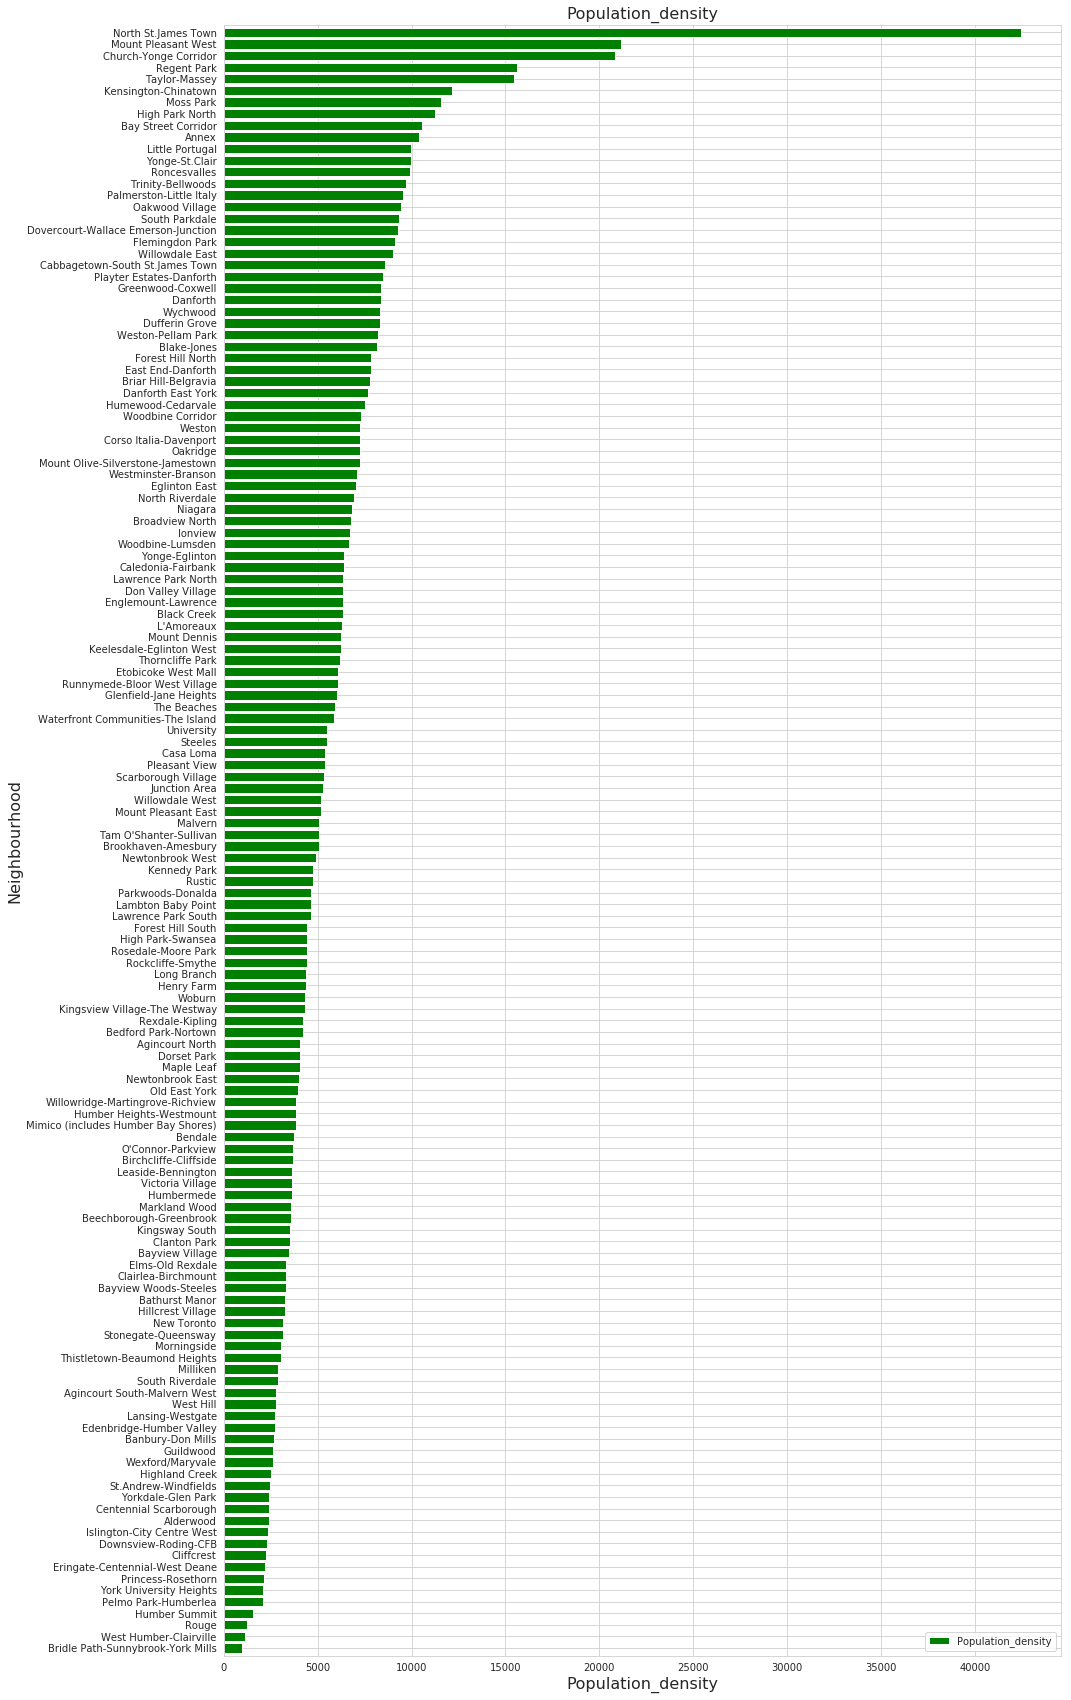

<Figure size 432x288 with 0 Axes>

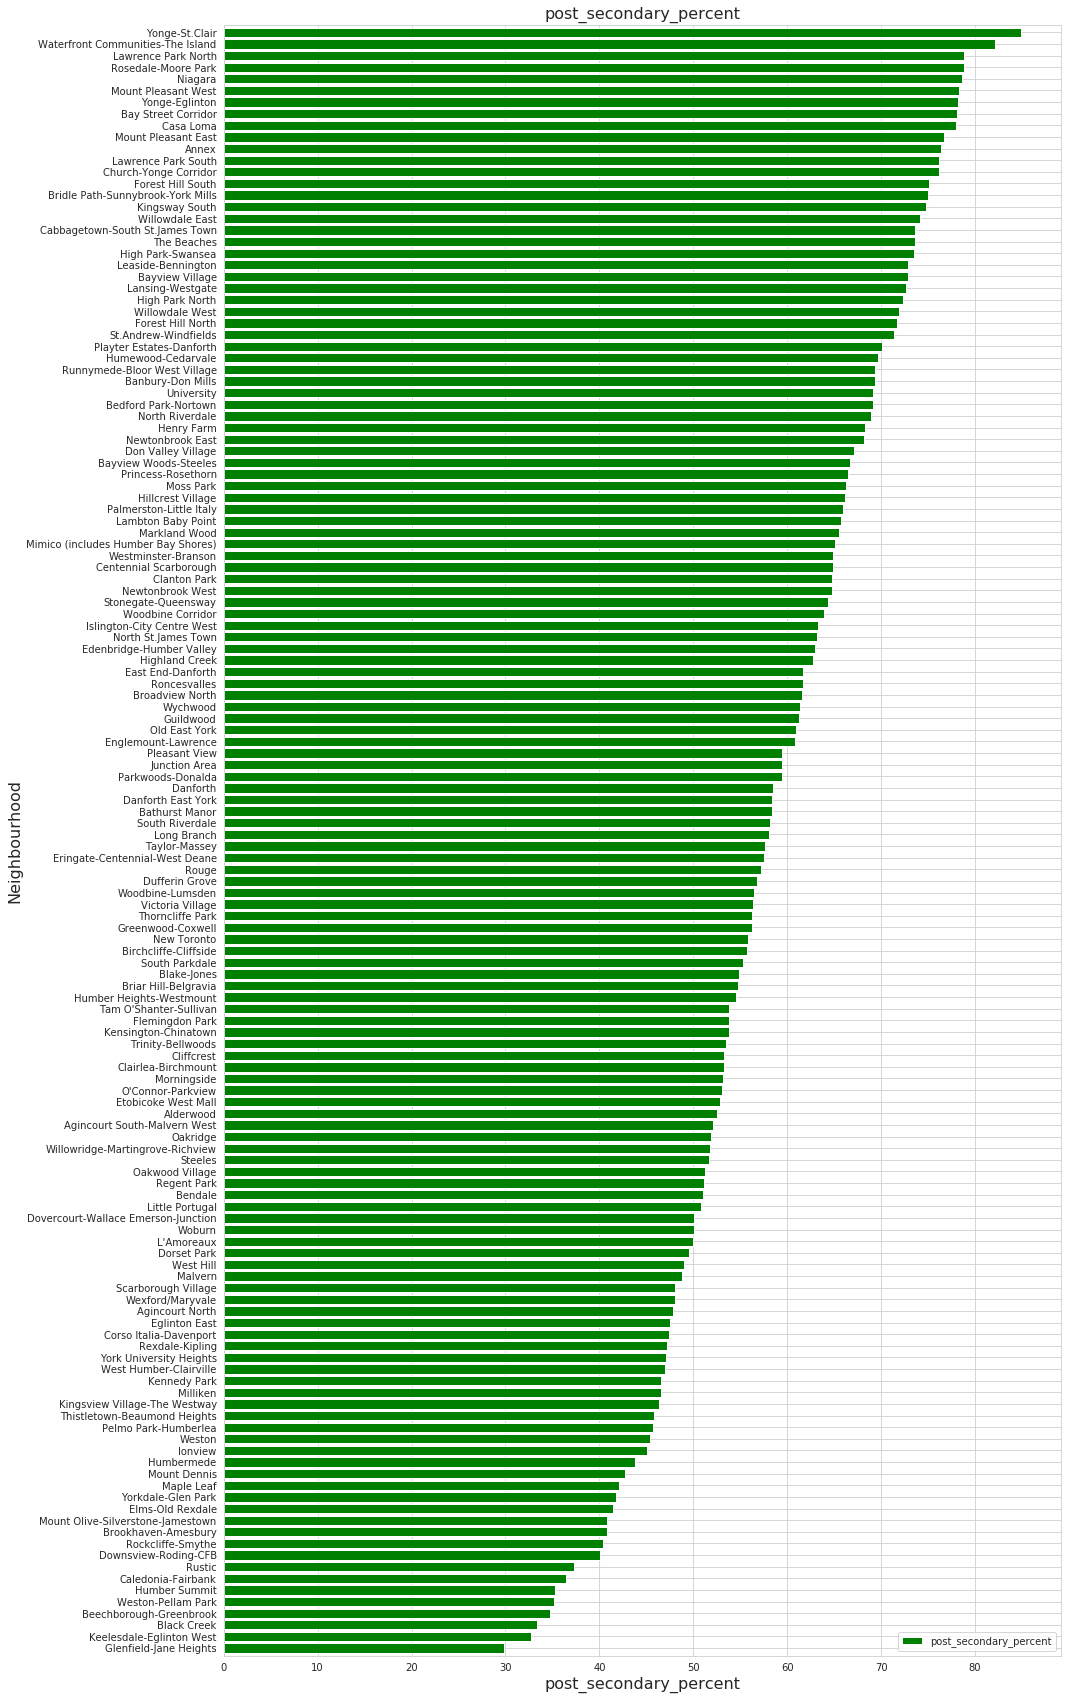

<Figure size 432x288 with 0 Axes>

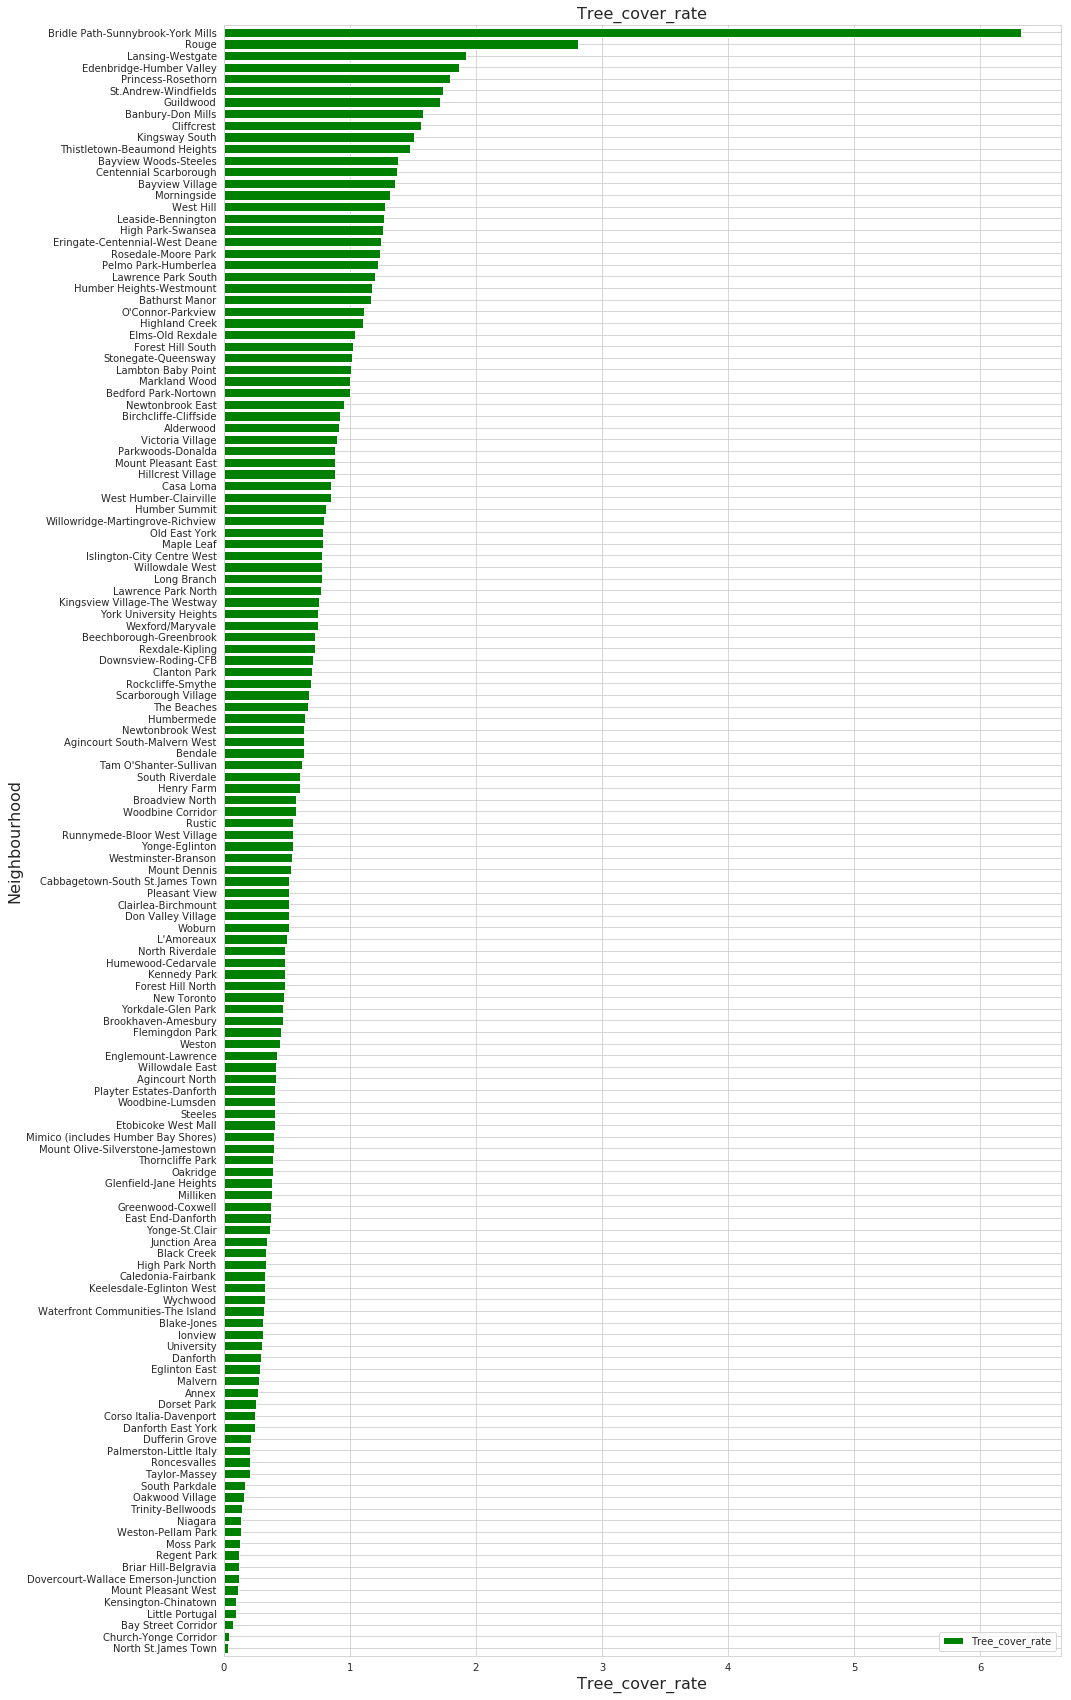

<Figure size 432x288 with 0 Axes>

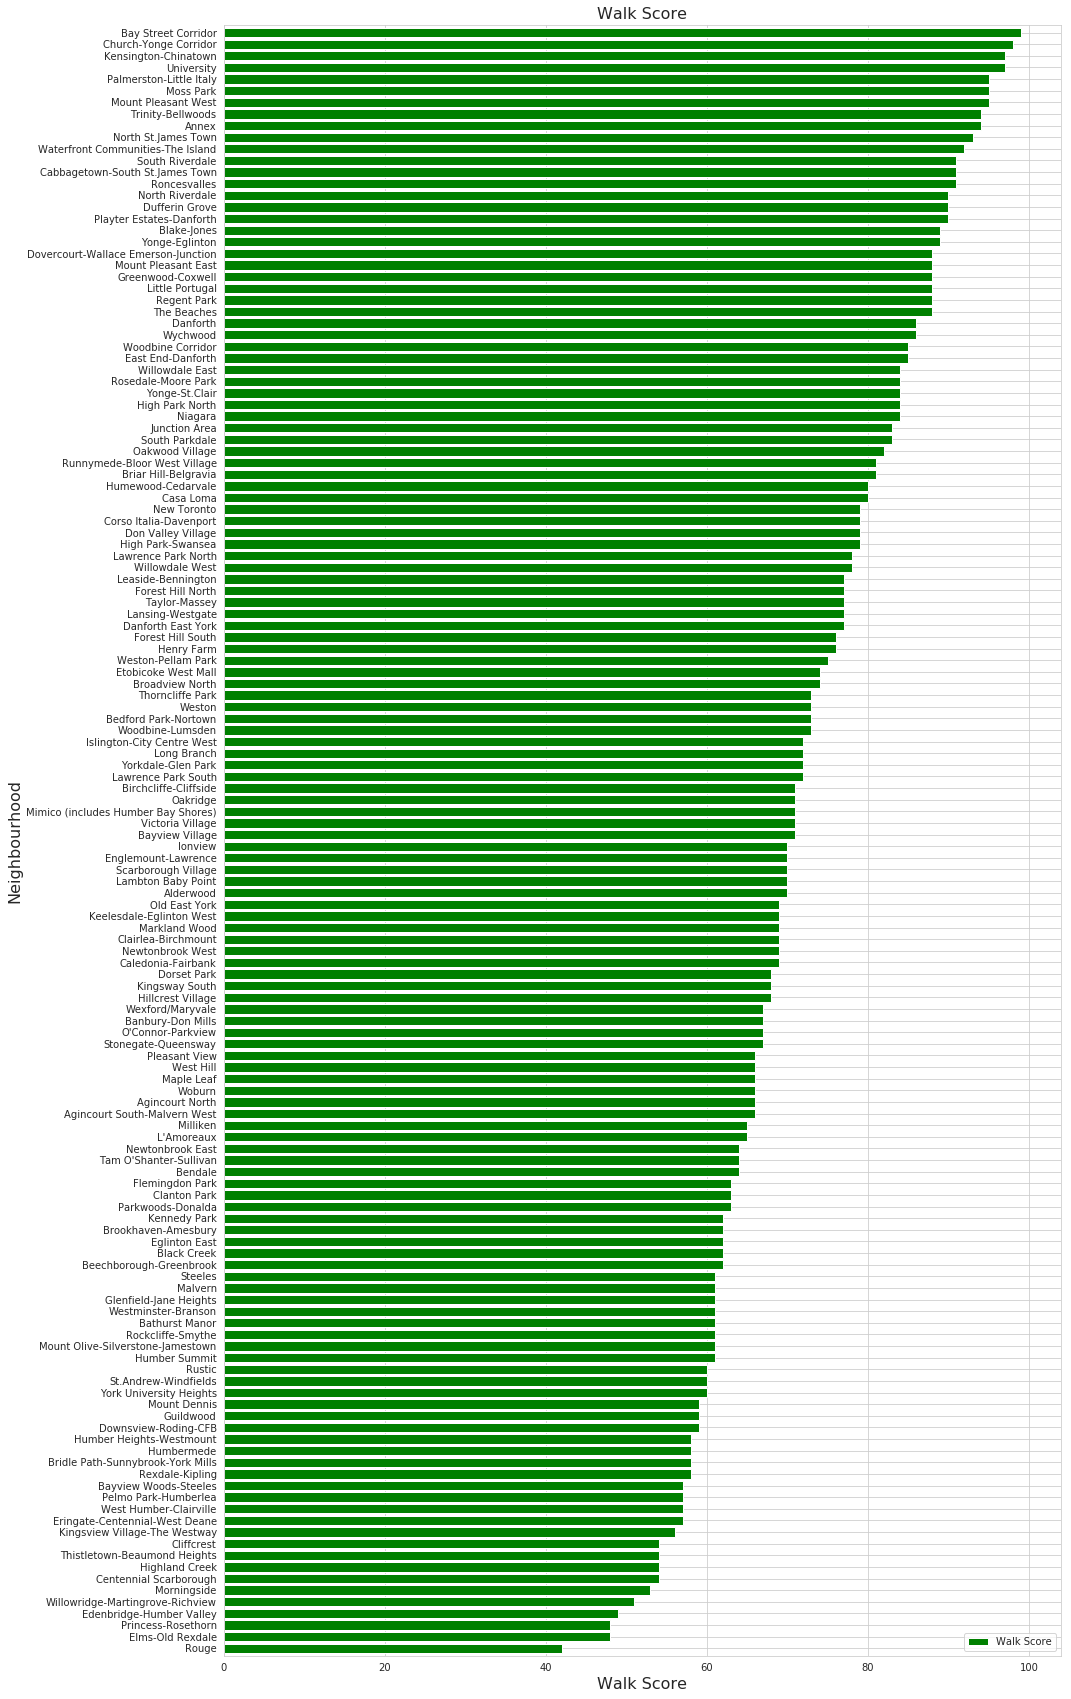

<Figure size 432x288 with 0 Axes>

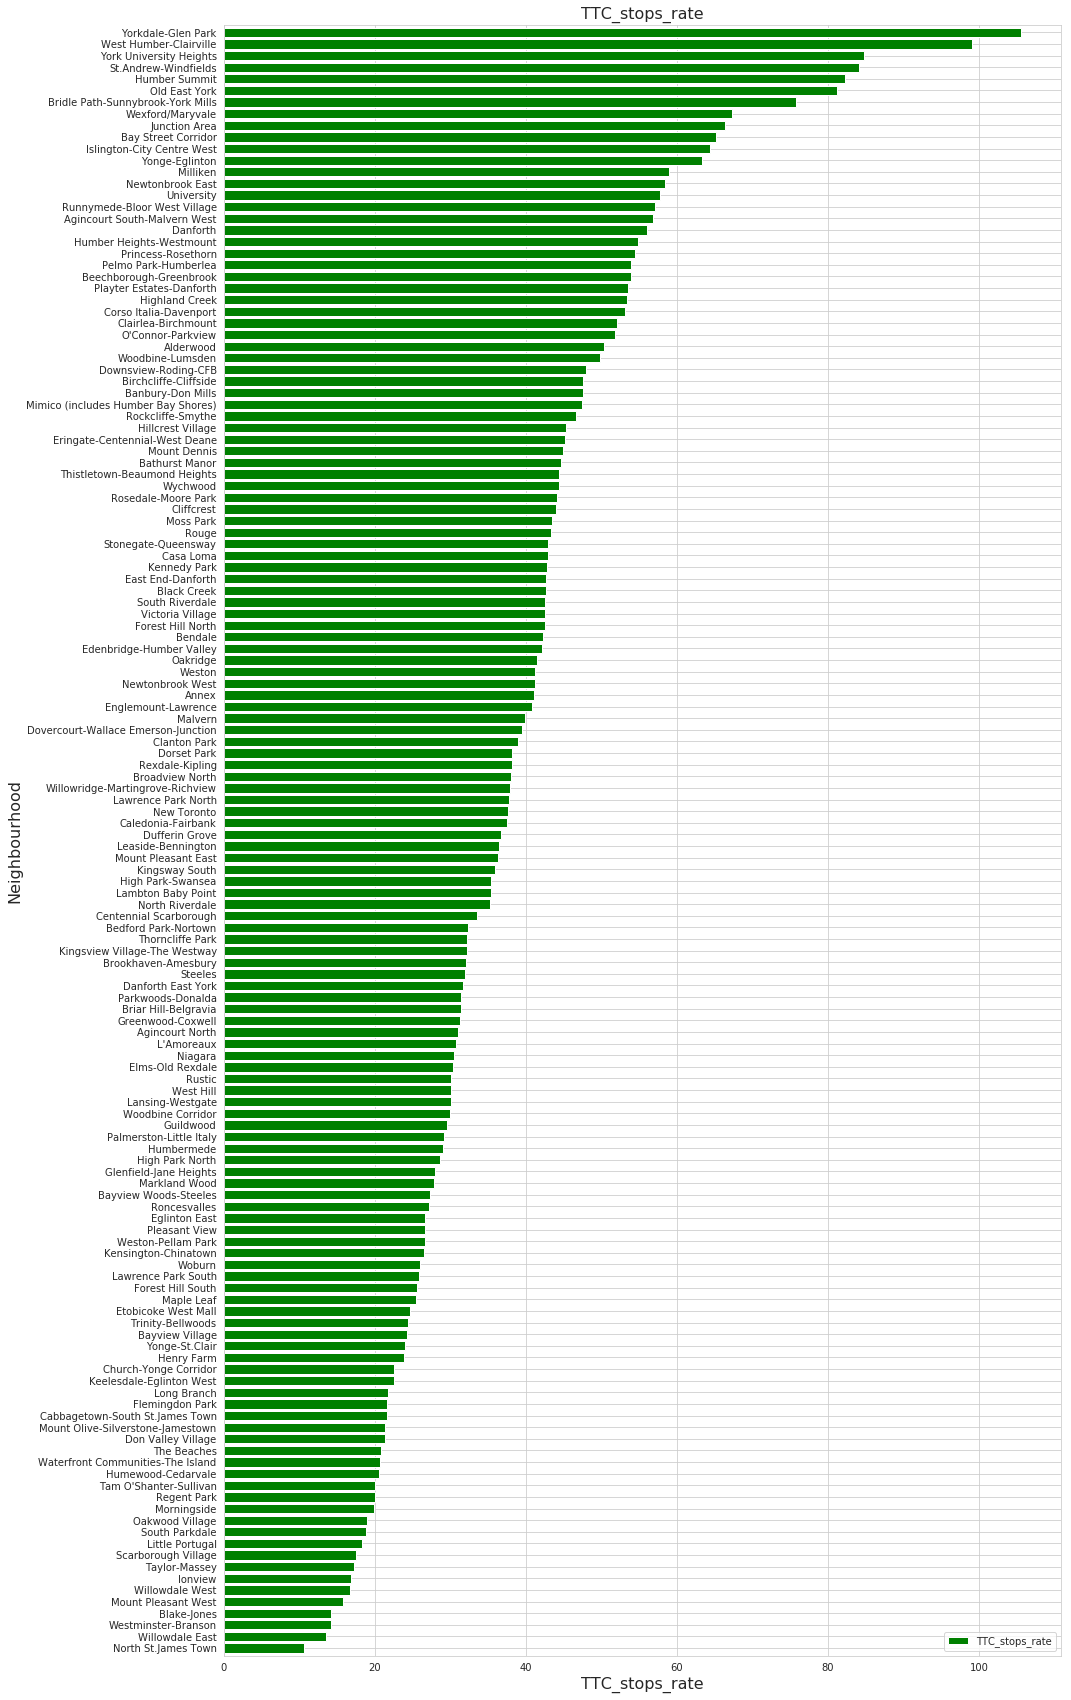

<Figure size 432x288 with 0 Axes>

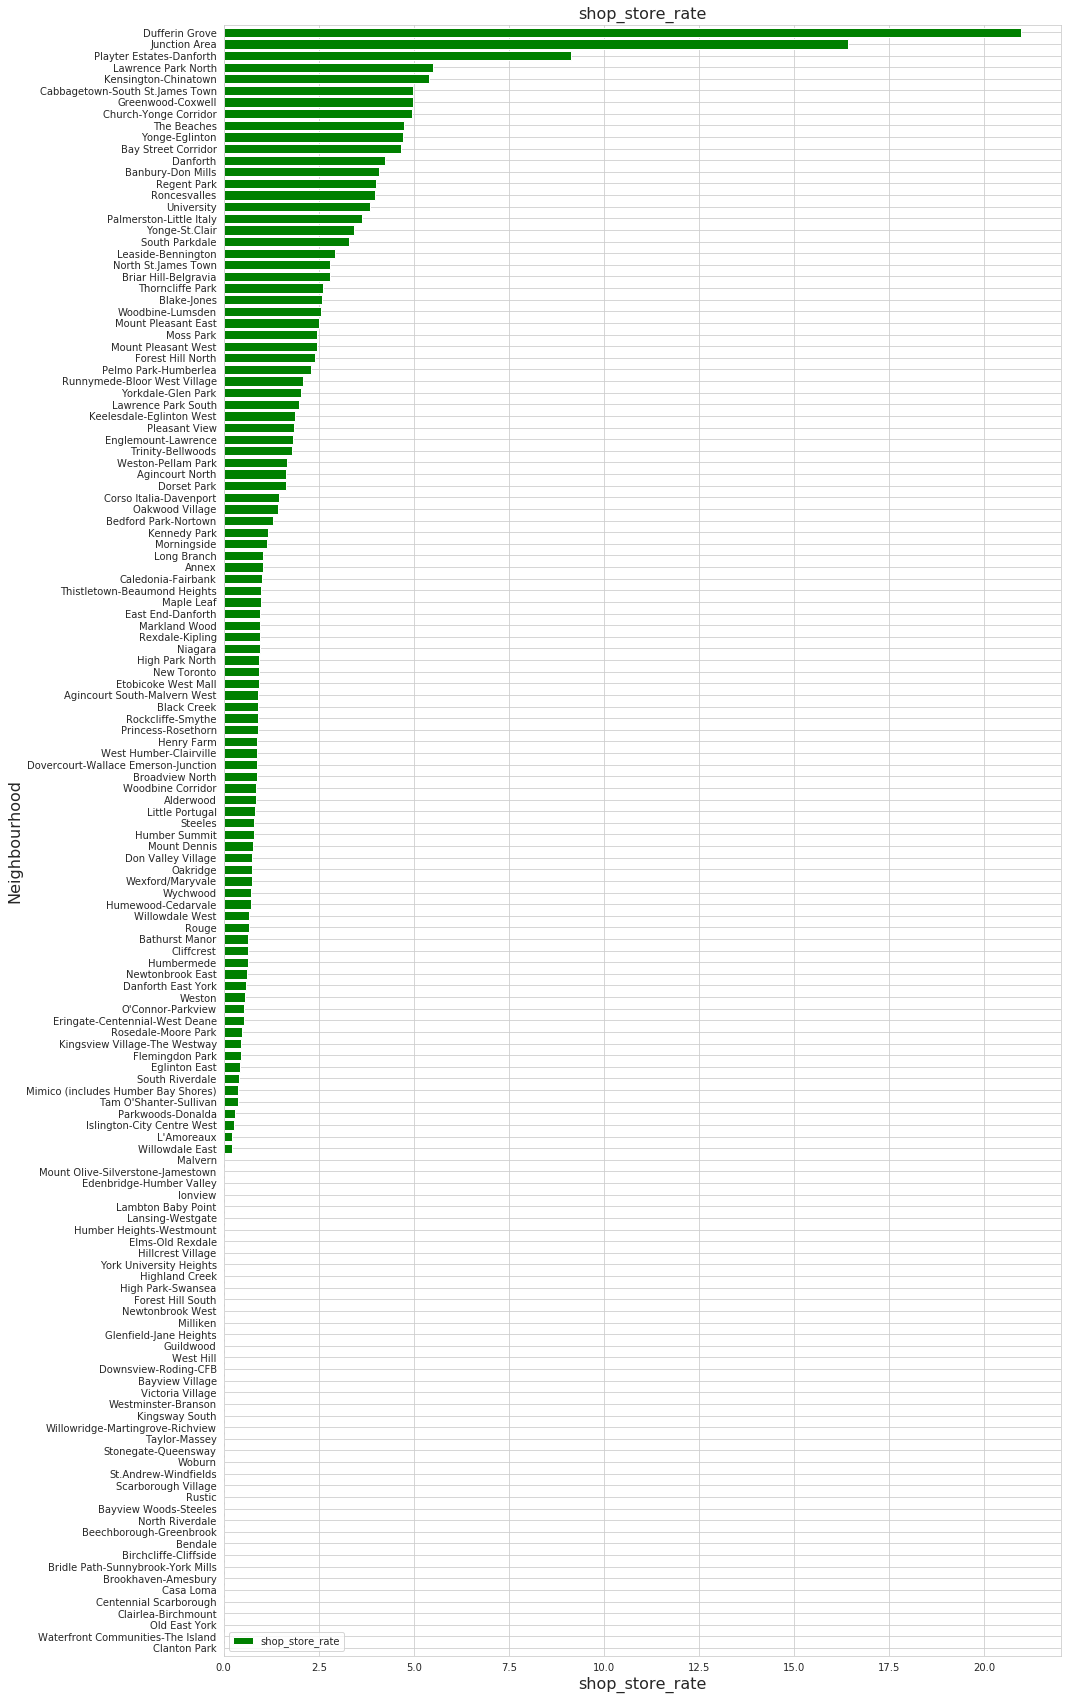

<Figure size 432x288 with 0 Axes>

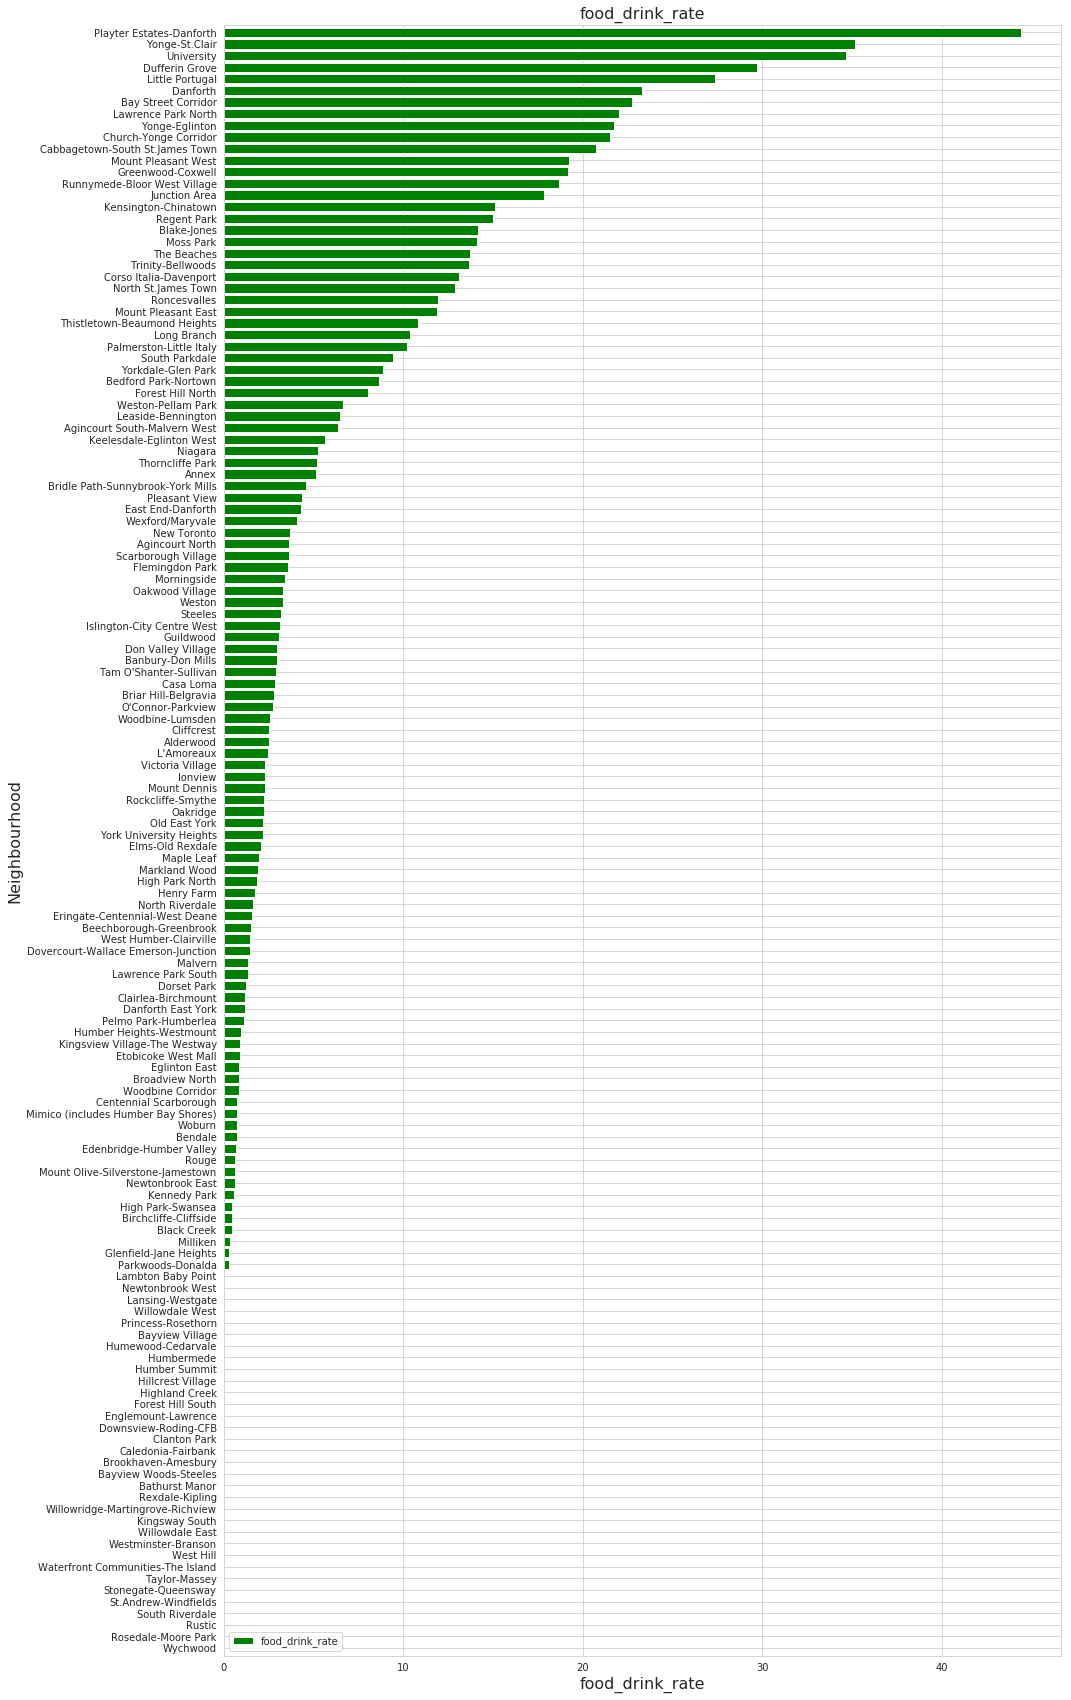

<Figure size 432x288 with 0 Axes>

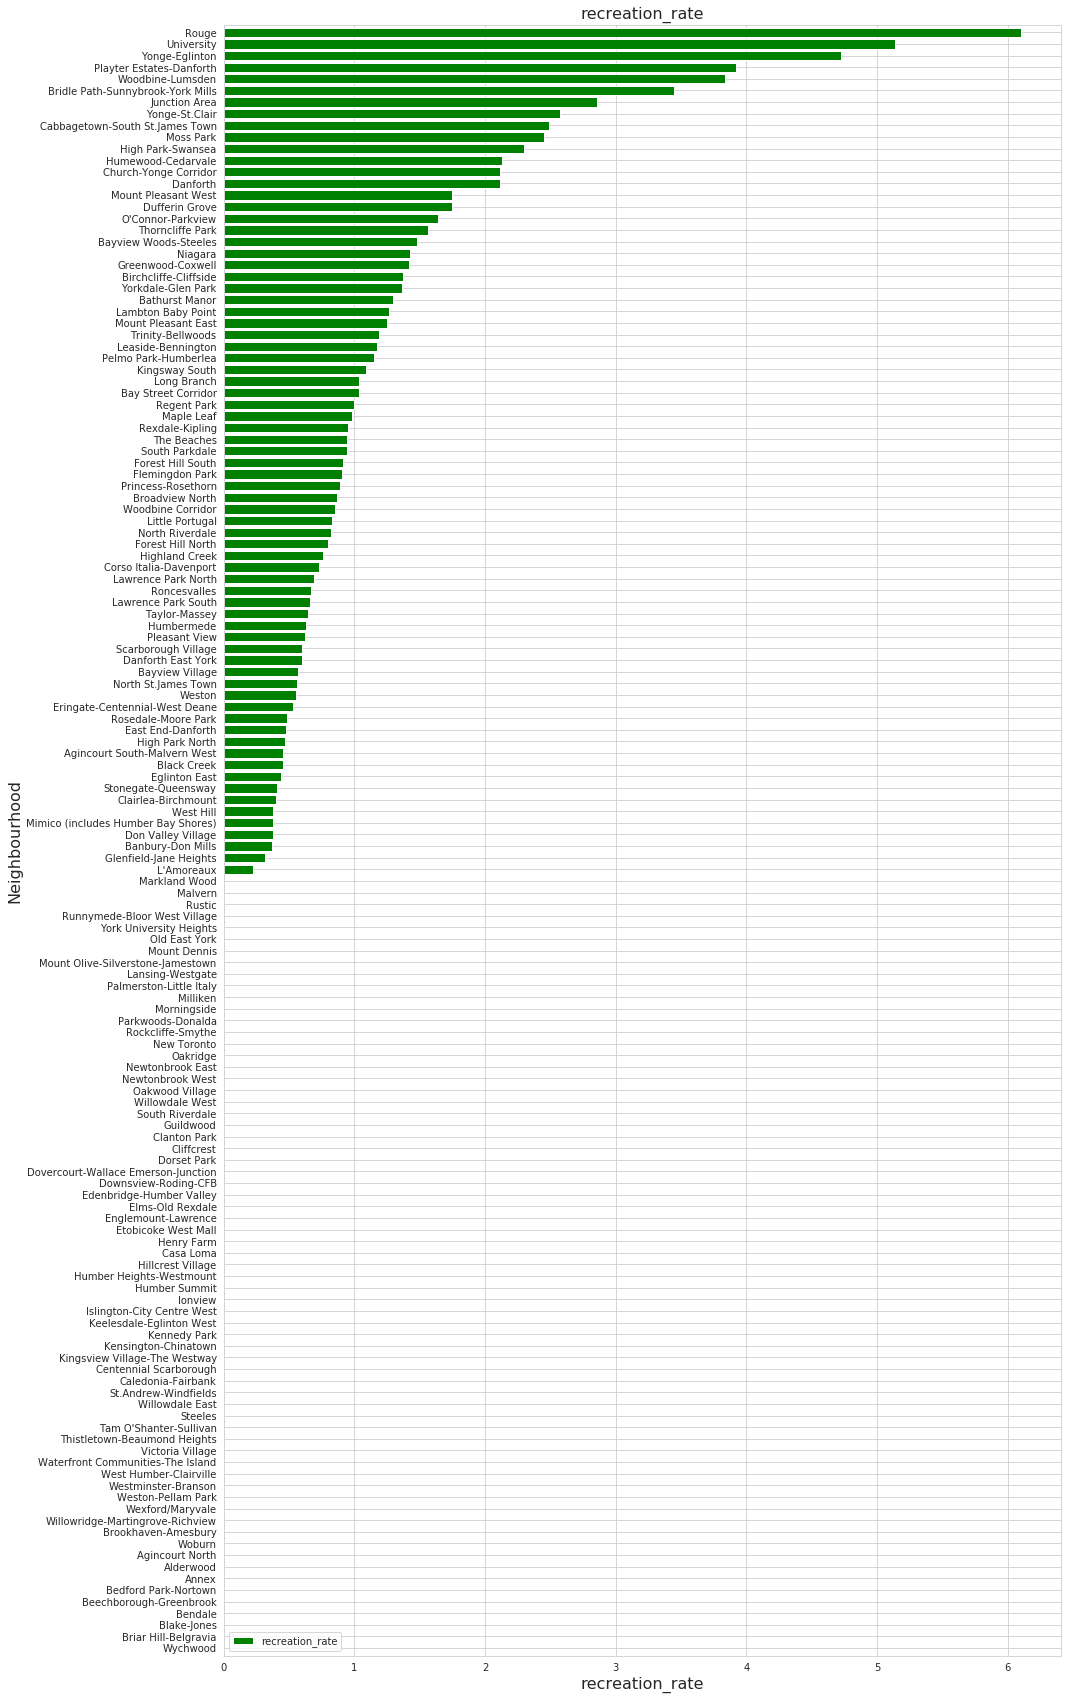

In [90]:
feature_data_2 = feature_data.set_index(neighbourhoods['Neighbourhood'])
for aCol in feature_data_2.columns:
    figure = plt.figure()
    feature_data_2[[aCol]].sort_values(by=aCol,ascending=True).plot(kind='barh', figsize=(15, 30), width = 0.8,color='g')
    #plt.xlabel('Borough') # add to x-label to the plot
    plt.ylabel('Neighbourhood',fontsize=16) # add y-label to the plot
    plt.title(str(aCol),fontsize=16) # add title to the plot
    plt.xlabel(str(aCol),fontsize=16) # add title to the plot
plt.show()

We can make the following observations from investigating each of these bar plots:  
>1) School rate: The _University_ and _Kensington-Chinatown_ neighbourhoods have anomalously high school rates, while, _Briar Hill-Belgravia_ has zero schools  
>2) Home prices: _Bridle Path-Sunnybrook-York Mills_ neighbourhood seem to have anomalously high home prices, and _Flemingdon Park_ neighbourhood has the lowest home prices.  
>3) Crime rate: The three neighbourhood _Moss Park_ , _Bay Street Corridor_ , and _Kensington-Chinatown_ show anomalously high crime rates. On the other hand, _Bayview Woods-Steeles_ shows the lowest crime rate.  
>4) Median income: The _Bridle Path-Sunnybrook-York Mills_ neighbourhoods clearly stands out with its high median income. The Four neighbourhoods _South Parkdale_ , _Oakridge_ , _North St.James Town_ , and _Regent Park_ , have the lowest median income.  
>5) Average rent: as in median income, the _Bridle Path-Sunnybrook-York Mills_ neighbourhoods clearly stands out with its high rents. The neighbourhoods _West Hill_ , _Hillcrest Village_ , and _Regent Park_ , have the lowest average rent and are more favorable neighbourhoods for renter, at least in terms of the rent cost only.  
>6) Unemployment rate: The _Oakridge_ neighbourhood has the highest unemployment rate, while neighbourhoods _Lambton Baby Point_ , _Waterfront Communities-The Island_ and _Niagara_ have the lowest unemployment rate.  
>7) Commuting duration: The neighbourhoods _Woburn_ and _Rouge_ have the longest commuting to work duration, while _Markland Wood_ has the lowest.  
>8) Population density: _North St.James Town_ neighbourhood has anomalously the highest population density while neighbourhoods _Rouge_ , _West Humber-Clairville_ and _Bridle Path-Sunnybrook-York Mills_ have the lowest population density.  
>9) Educated population: The neighbourhoods _Yonge-St.Clair_ and _Waterfront Communities-The Island_ have the highest proportion of educated people with post secondary education, while _Glenfield-Jane Heights_ shows the lowest.  
>10) Tree cover: _Bridle Path-Sunnybrook-York Mills_ is the greenest neighbourhood in Toronto while _Church-Yonge Corridor_ and _North St.James Town_ have the lowest tree cover rates.  
>11) Walk score: There are not any neighbourhoods standing out with anomalous high walk score compared to others. However, _Bay Street Corridor_ has the highest walk score. The neighbourhood _Rouge_ on the other hand, has the lowest walkability score.  
>12) Public transit: The neighbourhoods _Yorkdale-Glen Park_ and _West Humber-Clairville_ have the highest public transit rates, while _North St.James Town_ is the least favorable in terms of public transit score.  
>13) Shops and stores: The neighbourhoods _Dufferin Grove_ and _Junction Area_ have the highest shops and store rates. There are several neighbourhoods that show very low to no shops and stores within 500 m of their coordinates.  
>14) Food and drink: The _Playter Estates-Danforth_ neighbourhood has the highest food and drink score. There are many neighbourhoods that show very low to no food and drink places within 500 m of their coordinates.    
>15) Recreation: the neighbourhoods _Rouge_ , _University_ , and _Yonge-Eglinton_ have the highest recreation scores. There are many neighbourhoods that show very low to no places for recreation purposes within 500 m of their coordinates.    

Box plots are also very useful in visualizing data and identifying ranges and extremes and outliers in the data. To plot all the features in one figure, we first normalize each feature with a min-max technique such that minimum and maximum value of each feature will be 0 and 1, respectively. We then use _Seaborn_ library to visualize all features in the form of box plots below.

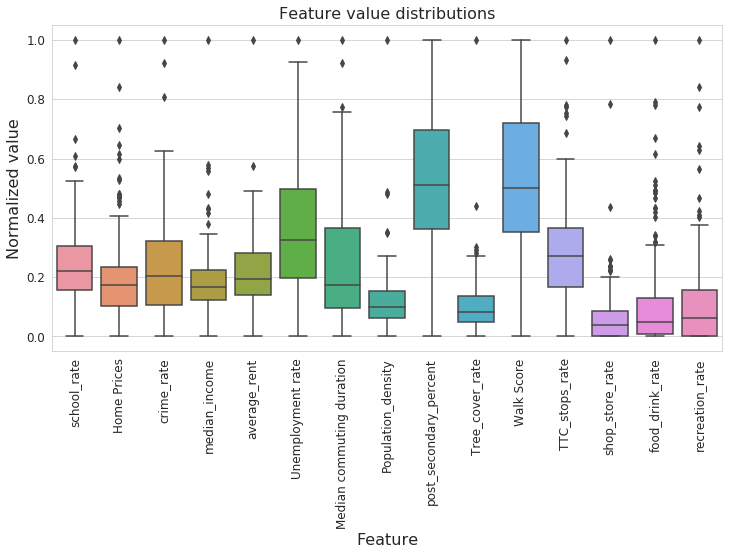

In [91]:
feature_data_normalized = feature_data.copy()
for aCol in feature_data_normalized.columns:
    feature_data_normalized.loc[:,aCol] = (feature_data_normalized.loc[:,aCol] - np.min(feature_data_normalized.loc[:,aCol]))/(np.max(feature_data_normalized.loc[:,aCol])-np.min(feature_data_normalized.loc[:,aCol]))
fig = plt.figure(figsize=(12,6))
ax = sns.boxplot(data=feature_data_normalized)
ax.set_title('Feature value distributions',fontsize=16)
ax.set_xlabel('Feature',fontsize=16)
ax.set_ylabel('Normalized value',fontsize=16)
plt.xticks(rotation=90)
ax.tick_params(axis='both', which='major', labelsize=12)
plt.show()

The black segments inside the boxes show the median normalized value for each feature, and the boxes show the interquartile ranges. The two caps at the end of the extending lines show the lower and higher extremes of the feature data.  
Based on the plot, none of the features seem to have anomalously low values that can be seen as an outlier. On the other hand, the features _Home prices_ , _median income_ , _food_and_drink_rate_ , and _recreation_rate_ show the largest number of large outliers. The features _walk Score_ , _post_secondary_percent_ , _Unemployment_rate_ , _average_rent_ and _crime_rate_ show no to very low number of outliers.  
Majority of neighbourhoods show very low _food_and_drink_rate_ , _recreation_rate_ and _shop_store_rate_ when compared with their maxima. So are _Tree_cover_rate_ and _Population_density_.  
Majority of neighbourhoods seem to have average walk score and proportion of educated people with postsecondary educations.


### 3.2. Machine learning (clustering)

The purpose of this study is to categorize the 140 Toronto neighbourhoods into different categories where the neighbourhoods inside each category are similar to one another in at least some features, while they are dissimilar to other neighbourhoods in other categories. This means we need to use a machine learning clustering algorithm. Potential residents can check these clusters out and see what sort of features are similar between neighbourhoods in every group resulting from clustering, and see which clusters provide the largest and lowest values for the features that are the their most important priorities for choosing a neighbourhood to live in.  

There are several clustering algorithms available. However, for this study, we have selected to use K-means technique because it is simple and fast. K-means divides the data into non-overlapping subsets without any cluster internal structures. Examples within a cluster are very similar while examples across different clusters are very different.

K-means is an iterative clustering algorithm in which first distance matrix between data points to K (number of clusters) randomly selected points (centroids of clusters) is calculated. Data points are assigned to a cluster depending on their distance to the centroids (initially the randomly chosen points) of the clusters. In the next steps the centroids of each cluster are updated to the mean of the points belonging to them. This process is repeated until the centroids no longer move.   
As K-means is a heuristic algorithm, there is no guarantee that it will converge to the global optimum and the result may depend on the initial clusters. It means, this algorithm is guaranteed to converge to a result, but the result may be a local optimum i.e. not necessarily the best possible outcome. To solve this problem, it is common to run the whole process multiple times with different starting conditions. This means with randomized starting centroids, it may give a better outcome. As the algorithm is usually very fast, it wouldn't be any problem to run it multiple times. We use K-means module of SKLearn, which has a default number of 12 runs with random initializations.

To prepare the data for clustering, we first standardize the features by applying a Z-score method, which subtracts the feature mean values from the features and divides the result by standard deviation of the feature values. 

In [92]:
df_clusters = feature_data
df_clusters = StandardScaler().fit_transform(df_clusters)
df_clusters

/opt/conda/envs/Python36/lib/python3.6/site-packages/sklearn/preprocessing/data.py:645: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/opt/conda/envs/Python36/lib/python3.6/site-packages/sklearn/base.py:464: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)


array([[-0.2823119 ,  0.40746388, -0.3674076 , ..., -0.29495577,
        -0.6581072 , -0.64728687],
       [ 1.73354706,  1.60194961,  0.31823512, ...,  1.24691139,
         1.99852777,  3.78768417],
       [-0.75738196,  1.67756364, -1.08712206, ...,  0.74950675,
         3.64083192,  1.76825977],
       ...,
       [-0.7722593 , -0.95734183, -0.31808872, ..., -0.39288891,
        -0.54560528, -0.64728687],
       [-0.56052972,  1.47362284, -0.67491016, ..., -0.56983916,
        -0.6581072 ,  0.37553587],
       [-0.15624445, -0.72271599, -1.24397595, ..., -0.48424984,
        -0.35881803, -0.43835002]])

In K-means technique, we need to first specify the number of clusters, K. The results are very dependent on the number of clusters. One of the very common ways to select K in the K-means method is the Elbow technique. In this technique, K-means algorithm is performed with different values of K. For each K, the inertia, which is the within-cluster sum of squared errors, is calculated. The inertia is plotted against the K values. The rate of the change of inertia on the plot is investigated. The K value associated with the point where this rate of distortion shifts from larger to small values, after which smaller changes in inertia are observed, is selected. Below we perform the Elbow method and find that a K-value of 6 seems like a good choice representing the elbow of the curve.

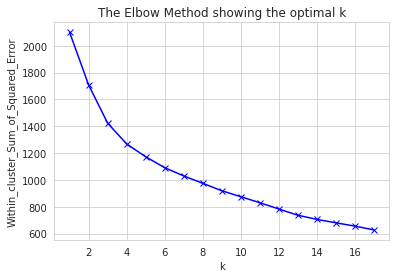

In [93]:
inertia = []
K = range(1,18)
for k in K:
    km = KMeans(n_clusters=k).fit(df_clusters)
    inertia.append(km.inertia_)

# Plot the elbow
plt.plot(K, inertia, 'bx-')
plt.xlabel('k')
plt.ylabel('Within_cluster_Sum_of_Squared_Error')
plt.title('The Elbow Method showing the optimal k')
plt.show()

A K-value of  6 is selected.

In [94]:
kclusters = 6

We now perform K-means clustering of the standardized features using 6 clusters.

In [95]:
kmeans = KMeans(n_clusters=kclusters, random_state=0).fit(df_clusters)

Below we are showing the cluster labels for the first 10 neighbourhoods in the feature table:

In [96]:
kmeans.labels_[0:10] 

array([0, 4, 4, 1, 1, 3, 3, 3, 3, 3], dtype=int32)

And we finally add the cluster labels to the min-max normalized neighbourhood feature table. We use the min-max normalized data so that we can plot the features more easily later with same plot scales.

In [97]:
# add clustering labels
neighbourhoods_new = neighbourhoods.copy()
neighbourhoods_new.insert(0, 'Cluster Labels', kmeans.labels_)
for aCol in neighbourhoods_new.columns[5:]:
    neighbourhoods_new.loc[:,aCol] = (neighbourhoods_new.loc[:,aCol] - np.min(neighbourhoods_new.loc[:,aCol]))/(np.max(neighbourhoods_new.loc[:,aCol])-np.min(neighbourhoods_new.loc[:,aCol]))
neighbourhoods_new.head() # check the last columns!

Cluster Labels  Neighbourhood_id            Neighbourhood   Latitude  \
0               0                94                 Wychwood  43.676919   
1               4               100           Yonge-Eglinton  43.704689   
2               4                97           Yonge-St.Clair  43.687859   
3               1                27  York University Heights  43.765736   
4               1                31       Yorkdale-Glen Park  43.714672   

   Longitude  school_rate  Home Prices  crime_rate  median_income  \
0 -79.425515     0.211716     0.275240    0.174953       0.148997   
1 -79.403590     0.518519     0.468908    0.294718       0.248542   
2 -79.397871     0.139413     0.481168    0.049237       0.214643   
3 -79.488883     0.321993     0.094389    0.423418       0.092779   
4 -79.457108     0.358052     0.131881    0.616266       0.145491   

   average_rent  Unemployment rate  Median commuting duration  \
0      0.170176           0.214876                   0.151181   
1      0.350028           0.057851                   0.033511   
2      0.388731           0.165289                   0.208302   
3      0.159363           0.528926                   0.383092   
4      0.162208           0.429752                   0.151181   

   Population_density  post_secondary_percent  Tree_cover_rate  Walk Score  \
0            0.177180                0.572710         0.046336    0.771930   
1            0.131059                0.877905         0.081965    0.824561   
2            0.216665                1.000000         0.052997    0.736842   
3            0.026934                0.313683         0.113152    0.315789   
4            0.035048                0.216889         0.069543    0.526316   

   TTC_stops_rate  shop_store_rate  food_drink_rate  recreation_rate  
0        0.354872         0.034114         0.000000         0.000000  
1        0.555037         0.225465         0.489450         0.774794  
2        0.140845         0.163735         0.792023         0.421999  
3        0.781240         0.000000         0.048742         0.000000  
4        1.000000         0.097463         0.199313         0.223284

## 4. Results

In this section we visualize and discuss the neighbourhood clusters resulted from K-means algorithm in the previous section.  
First we plot all Toronto neighbourhoods again, but this time each neighbourhood is plotted with a color that is specific to the cluster it belongs to. The popups on the resulting folium map show the cluster number in addition to the neighbourhood name. 

In [98]:
# create map
map_clusters = folium.Map(location=[latitude, longitude], zoom_start=11)
# set color scheme for the clusters
x = np.arange(kclusters)
ys = [i + x + (i*x)**2 for i in range(kclusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]
#rainbow = rainbow[::-1]
# add markers to the map
markers_colors = []
for lat, lon, poi, cluster in zip(neighbourhoods_new['Latitude'], neighbourhoods_new['Longitude'], 
                                  neighbourhoods_new['Neighbourhood'], neighbourhoods_new['Cluster Labels']):
    label = folium.Popup(str(poi) + ', Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color=rainbow[cluster],
        fill=True,
        fill_color=rainbow[cluster],
        fill_opacity=0.7).add_to(map_clusters)
map_clusters

The colors associated with each cluster are:  
>Magenta: Cluster 0  
>Blue:    Cluster 1  
>Cyan:    Cluster 2  
>Green:   Cluster 3  
>Orange:  Cluster 4  
>Red:     Cluster 5  

Interestingly, cluster 2 (cyan color) includes only one neighbourhood: _Bridle Path-Sunnybrook-York Mills_ .
We already saw in the exploratory data analysis section that this specific neighbourhood has anomalously high or low values in some features, which make it stand out as a separate cluster on its own.  
Below we look into how many neighbourhood belong to each cluster.

In [99]:
cluster_percent = neighbourhoods_new['Cluster Labels'].value_counts().to_frame()
cluster_percent.rename(columns={'Cluster Labels':'#Neighbourhoods'},inplace=True)
cluster_percent.index.name = 'Cluster Labels'
cluster_percent.sort_index(inplace=True)
cluster_percent

#Neighbourhoods
Cluster Labels                 
0                            29
1                            29
2                             1
3                            33
4                            12
5                            36

As this table shows, cluster 5 includes the largest number of neighbourhoods followed by cluster 3 (33 neighbourhoods), cluster 1 and cluster 0 (both 29 neighbourhoods), cluster 4 (12 neighbourhoods), and cluster 2 (only one neighbourhood).

Blow we plot a pie chart of the percentage of number of neighbourhoods included in each cluster. The cluster number is shown on the outer bound of each wedge. The percentage is inside each wedge. The colors also match the color of clusters on the map.

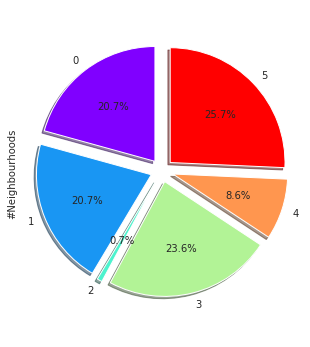

In [100]:
fig = plt.figure()
explode_list = np.ones(len(rainbow))*0.1
cluster_percent['#Neighbourhoods'].plot(kind='pie',
                                         figsize=(5,6),
                                         autopct='%1.1f%%',
                                         startangle=90,
                                         shadow=True,
                                         colors=rainbow,
                                         explode=explode_list)
plt.axis('equal')
plt.show()


To be able to compare different clusters and see what separates one from the other we look into the features of each cluster, their median and distribution plots.  
First, let's compare the median of each feature in each cluster against the others with bar plots. Since we are using the min-max normalized features, we are not looking at the actual values of the features. What is important here is that we are looking for relative differences not exact values. Also, using normalized values we can use one single y-axis for all bar plots which makes the comparison much easier.

In [102]:
convert_dict = {'Cluster Labels': 'category'} 
neighbourhoods_new_2 = neighbourhoods_new.astype(convert_dict) 
neighbourhoods_new_2.drop(['Neighbourhood_id','Neighbourhood', 'Longitude', 'Latitude',],axis = 1,inplace=True)
median_vals = neighbourhoods_new_2.groupby(['Cluster Labels']).median()
median_vals.head()

school_rate  Home Prices  crime_rate  median_income  \
Cluster Labels                                                        
0                  0.245517     0.192056    0.241208       0.158495   
1                  0.250896     0.131881    0.211826       0.175716   
2                  0.317802     1.000000    0.098039       1.000000   
3                  0.246884     0.280915    0.088963       0.266199   
4                  0.433940     0.201162    0.444879       0.133264   

                average_rent  Unemployment rate  Median commuting duration  \
Cluster Labels                                                               
0                   0.195219           0.231405                   0.188880   
1                   0.172453           0.413223                   0.423077   
2                   1.000000           0.066116                   0.095202   
3                   0.282299           0.206612                   0.148896   
4                   0.238475           0.227273                   0.103580   

                Population_density  post_secondary_percent  Tree_cover_rate  \
Cluster Labels                                                                
0                         0.165366                0.579709         0.045114   
1                         0.065468                0.399621         0.104372   
2                         0.000000                0.820423         1.000000   
3                         0.062599                0.714231         0.169899   
4                         0.182774                0.723158         0.042522   

                Walk Score  TTC_stops_rate  shop_store_rate  food_drink_rate  \
Cluster Labels                                                                 
0                 0.754386        0.194576         0.045785         0.074782   
1                 0.403509        0.379810         0.013781         0.027263   
2                 0.280702        0.685761         0.000000         0.103338   
3                 0.473684        0.286303         0.023120         0.015065   
4                 0.850877        0.399264         0.230551         0.500772   

                recreation_rate  
Cluster Labels                   
0                      0.078669  
1                      0.000000  
2                      0.564359  
3                      0.079451  
4                      0.405121

So we first group the normalized feature dataframe by cluster label and take the median of each feature belonging to each cluster:

In [104]:
convert_dict = {'Cluster Labels': 'category'} 
neighbourhoods_new_2 = neighbourhoods_new.astype(convert_dict) 
neighbourhoods_new_2.drop(['Neighbourhood_id','Neighbourhood', 'Longitude', 'Latitude',],axis = 1,inplace=True)
median_vals = neighbourhoods_new_2.groupby(['Cluster Labels']).median()
median_vals

school_rate  Home Prices  crime_rate  median_income  \
Cluster Labels                                                        
0                  0.245517     0.192056    0.241208       0.158495   
1                  0.250896     0.131881    0.211826       0.175716   
2                  0.317802     1.000000    0.098039       1.000000   
3                  0.246884     0.280915    0.088963       0.266199   
4                  0.433940     0.201162    0.444879       0.133264   
5                  0.145420     0.081869    0.287673       0.099289   

                average_rent  Unemployment rate  Median commuting duration  \
Cluster Labels                                                               
0                   0.195219           0.231405                   0.188880   
1                   0.172453           0.413223                   0.423077   
2                   1.000000           0.066116                   0.095202   
3                   0.282299           0.206612                   0.148896   
4                   0.238475           0.227273                   0.103580   
5                   0.140581           0.603306                   0.155179   

                Population_density  post_secondary_percent  Tree_cover_rate  \
Cluster Labels                                                                
0                         0.165366                0.579709         0.045114   
1                         0.065468                0.399621         0.104372   
2                         0.000000                0.820423         1.000000   
3                         0.062599                0.714231         0.169899   
4                         0.182774                0.723158         0.042522   
5                         0.122409                0.302117         0.070398   

                Walk Score  TTC_stops_rate  shop_store_rate  food_drink_rate  \
Cluster Labels                                                                 
0                 0.754386        0.194576         0.045785         0.074782   
1                 0.403509        0.379810         0.013781         0.027263   
2                 0.280702        0.685761         0.000000         0.103338   
3                 0.473684        0.286303         0.023120         0.015065   
4                 0.850877        0.399264         0.230551         0.500772   
5                 0.394737        0.205311         0.035803         0.031209   

                recreation_rate  
Cluster Labels                   
0                      0.078669  
1                      0.000000  
2                      0.564359  
3                      0.079451  
4                      0.405121  
5                      0.000000

Below we investigate which clusters have the highest and lowest median value for each feature. 

In [105]:
median_min_max_df = pd.concat([median_vals.idxmax(axis=0).to_frame(),median_vals.idxmin(axis=0).to_frame()],axis=1)
median_min_max_df.columns = ['maximum cluster','minimum cluster']
median_min_max_df

maximum cluster  minimum cluster
school_rate                              4                5
Home Prices                              2                5
crime_rate                               4                3
median_income                            2                5
average_rent                             2                5
Unemployment rate                        5                2
Median commuting duration                1                2
Population_density                       4                2
post_secondary_percent                   2                5
Tree_cover_rate                          2                4
Walk Score                               4                2
TTC_stops_rate                           2                0
shop_store_rate                          4                2
food_drink_rate                          4                3
recreation_rate                          2                1

Based on this table, on average:
>1) School rate: Cluster 4 has the highest and cluster 5 has the lowest median values  
>2) Home prices: Cluster 2 has the highest and cluster 5 has the lowest median values  
>3) Crime rate: Cluster 4 has the highest and cluster 3 has the lowest median values  
>4) Median income: Cluster 2 has the highest and cluster 5 has the lowest median values  
>5) Average rent: Cluster 2 has the highest and cluster 5 has the lowest median values  
>6) Unemployment rate: Cluster 5 has the highest and cluster 2 has the lowest median values  
>7) Median commuting duration: Cluster 1 has the highest and cluster 2 has the lowest median values  
>8) Population density: Cluster 4 has the highest and cluster 2 has the lowest median values  
>9) Educated population percentage: Cluster 2 has the highest and cluster 5 has the lowest median values  
>10) Tree cover rate: Cluster 2 has the highest and cluster 4 has the lowest median values  
>11) Walk score: Cluster 4 has the highest and cluster 2 has the lowest median values  
>12) Public transit rate: Cluster 2 has the highest and cluster 0 has the lowest median values  
>13) Shop and store availability rate: Cluster 4 has the highest and cluster 2 has the lowest median values  
>14) Food and drink availability rate: Cluster 4 has the highest and cluster 3 has the lowest median values  
>15) Recreation availability rate: Cluster 2 has the highest and cluster 1 has the lowest median values  

We can also loop through the features and sort them in descending order. This way we can see for each feature which cluster have the highest (first row) and lowest values (last row), but can also see the order other clusters come in as

In [106]:
for aCol in median_vals.columns:
    print(median_vals[aCol].sort_values(ascending=False).to_frame())
    print('=============================')

                school_rate
Cluster Labels             
4                  0.433940
2                  0.317802
1                  0.250896
3                  0.246884
0                  0.245517
5                  0.145420
                Home Prices
Cluster Labels             
2                  1.000000
3                  0.280915
4                  0.201162
0                  0.192056
1                  0.131881
5                  0.081869
                crime_rate
Cluster Labels            
4                 0.444879
5                 0.287673
0                 0.241208
1                 0.211826
2                 0.098039
3                 0.088963
                median_income
Cluster Labels               
2                    1.000000
3                    0.266199
1                    0.175716
0                    0.158495
4                    0.133264
5                    0.099289
                average_rent
Cluster Labels              
2                   1.000000
3        

We group different clusters for each feature and plot the within-cluster feature median as bars, where the height and the number above the bar show the median value of the normalized feature in that cluster. 

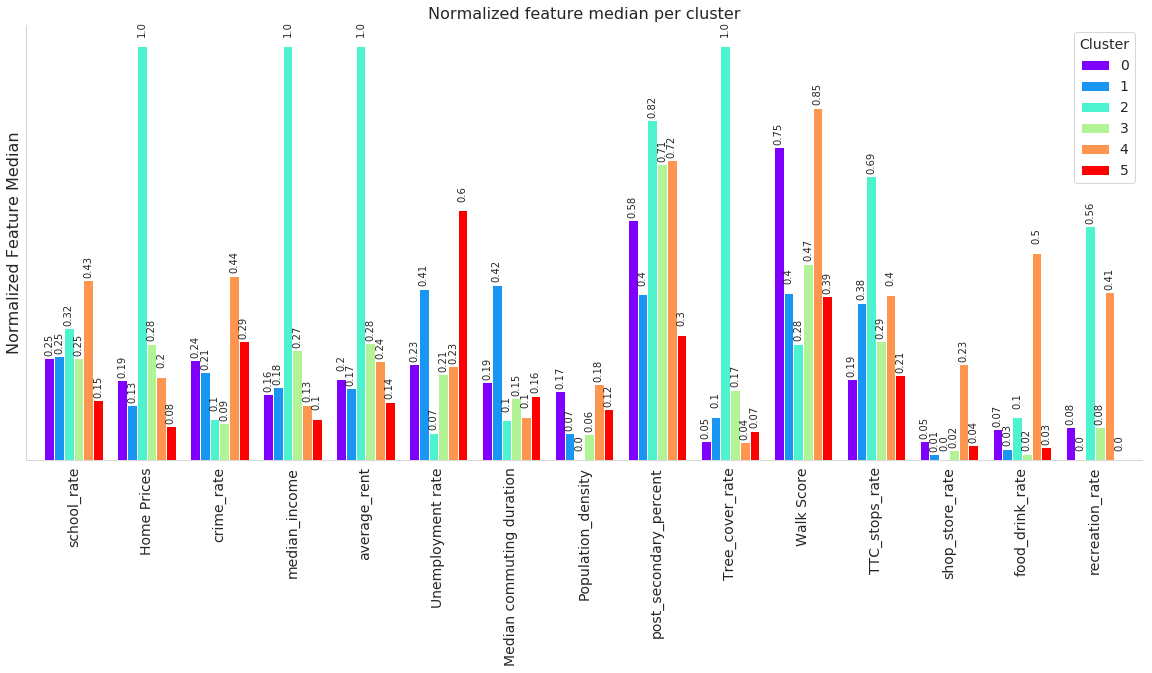

In [107]:
median_vals.index.name = ''
median_vals_trans = median_vals.T
median_vals_trans
ax = median_vals_trans.plot(kind='bar',color=rainbow,figsize=(20, 8),width=0.8,fontsize=14)
lg = plt.legend(title = 'Cluster',fontsize=14)
lg.get_title().set_fontsize(14)
ax.set_title("Normalized feature median per cluster",fontsize=16)
for p in ax.patches:
    ax.annotate(str(np.round(p.get_height(),2)), (p.get_x()+p.get_width()/2.0, p.get_height()+0.04),
                horizontalalignment='center',fontsize=10,rotation=90)
#ax.spines['left'].set_visible(False)
ax.set_ylabel('Normalized Feature Median',fontsize=16)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.grid(False)
plt.yticks([])
plt.show()

This plot nicely shows the comparison of the clusters and their feature medians and confirms the observations made above from the tables.

We compared the clusters above based on the median of their normalized features. However, instead of a single number, we can also compare the distributions of the normalized features and compare them across different clusters. To do that, we use density distribution plots from _Seaborn_ library. Continuous density plots are a very useful tool to compare the distribution of different sets of same parameters that have different sizes. Since cluster 2 has only one neighbourhood, it is plotted as a single dashed line at an X value equal to the feature median value. The distributions clearly show differences between clusters. The level of separation between clusters is different for different features. For instance, cluster 4 is easily separable from the rest of clusters in the density plots of walk score, shops and store, recreation and food and drinks, as it seems to be having higher values in these features. This can also be observed in the bar plot of the median feature values above.

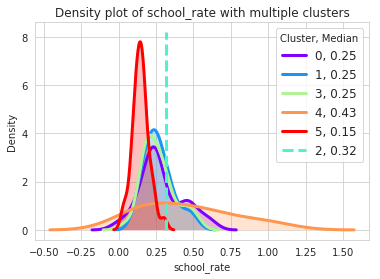

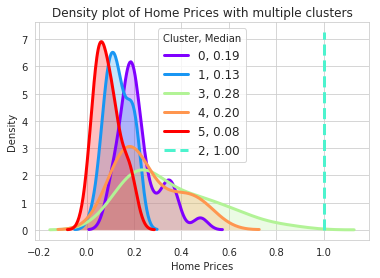

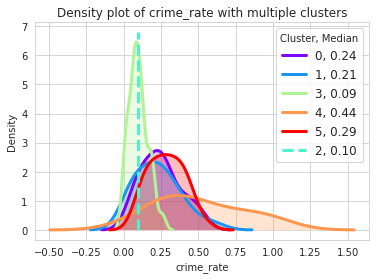

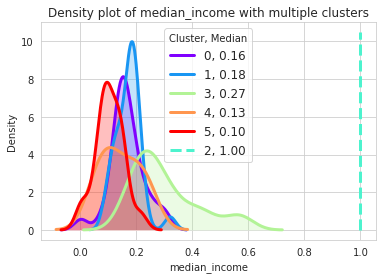

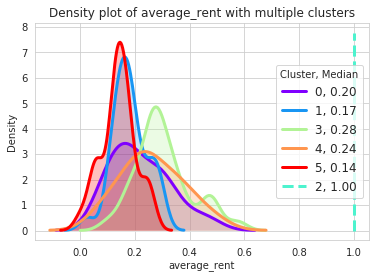

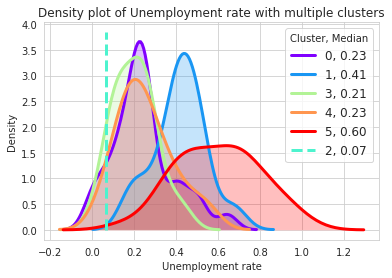

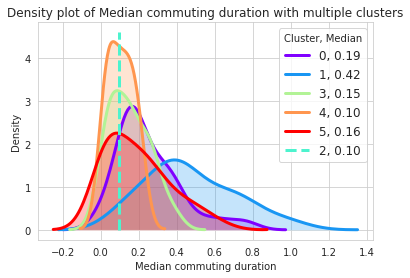

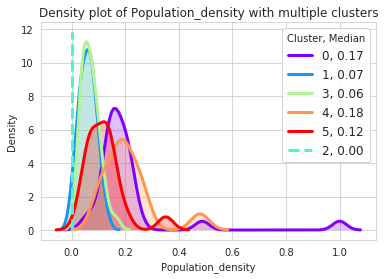

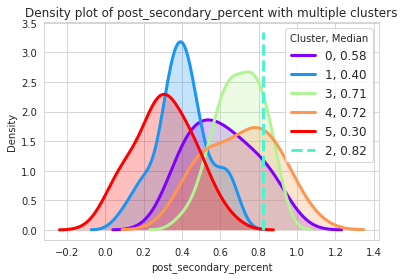

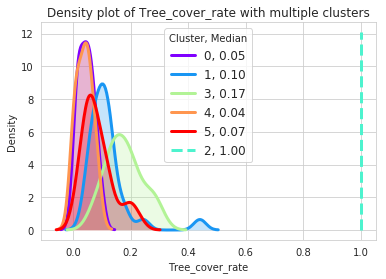

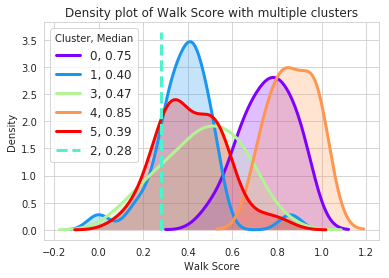

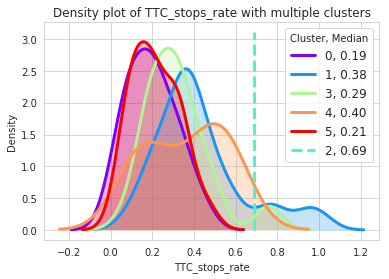

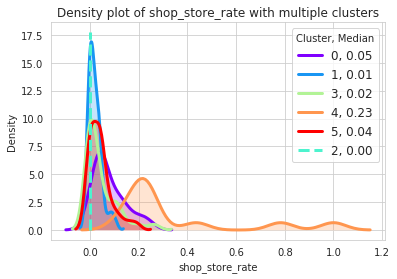

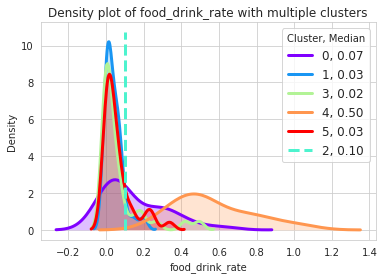

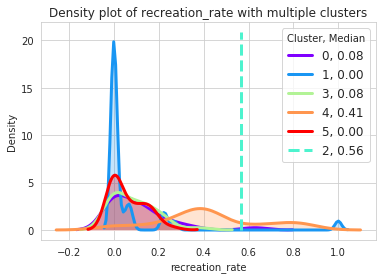

In [108]:
cluster_labs = np.sort(neighbourhoods_new_2['Cluster Labels'].unique())
for aCol in neighbourhoods_new_2.columns[1:]:
    fig = plt.figure()
    ylims = []
    for i,aLabel in enumerate(cluster_labs):
        data = neighbourhoods_new_2[neighbourhoods_new_2['Cluster Labels']==aLabel]
        if aLabel!=2:
            ax1 = sns.distplot(data.loc[:,aCol], hist = False, kde = True,color=rainbow[i],
                     kde_kws = {'linewidth': 3,'shade': True},
                     label = str(aLabel)+', '+'%3.2f' %(np.median(data.loc[:,aCol])))
            ylims.append(ax1.get_ylim()[1])
    for i,aLabel in enumerate(cluster_labs):
        data = neighbourhoods_new_2[neighbourhoods_new_2['Cluster Labels']==aLabel]
        if data.shape[0]==1:
            plt.plot([float(data.loc[:,aCol]),float(data.loc[:,aCol])],[0,ax1.get_ylim()[1]],color = rainbow[2],linewidth=3,
             linestyle='--',label = str(2)+', '+'%3.2f' %(np.median(data.loc[:,aCol])))
    plt.legend(prop={'size': 12}, title = 'Cluster, Median')
    plt.title('Density plot of '+str(aCol)+' with multiple clusters')
    plt.xlabel(aCol)
    plt.ylabel('Density')
plt.show()

We also use the definitions of inter-quartile range used in box plots to identify number of outliers in both positive and negative indicators.
To do this, we first divide the feature categories into two groups, positive and negative indicators. The positive indicators are those for which high values are favored by potential residents. On the other hand, residents prefer low values for negative indicators:

a) Positive indicators:
>school_rate  
>median_income  
>post_secondary_percent  
>Tree_cover_rate  
>Walk Score  
>TTC_stops_rate  
>shop_store_rate  
>food_drink_rate  
>recreation_rate

and 

b) Negative indicators:
>Home Prices  
>crime_rate  
>Unemployment rate  
>Median commuting duration  
>Population_density  
>average_rent 

For each feature, if a neighbourhood has a feature value is larger than third quartile by more than 1.5 times the feature's interquartile range across all neighbourhoods, that neighbourhood is considered an outlier. We then count the number of outliers for both positive and negative indicators and sum them for each neighbourhood. We can then plot the neighbourhoods that have any outliers, both positive and negative, and see which clusters have the highest number of neighbourhoods in both positive and negative indicator groups.

In [109]:
positive_indicators = ['school_rate','median_income','post_secondary_percent','Tree_cover_rate','Walk Score',
                       'TTC_stops_rate','shop_store_rate','food_drink_rate', 'recreation_rate']
negative_indicators = ['Home Prices', 'crime_rate','Unemployment rate', 'Median commuting duration',
                       'Population_density','average_rent']

In [110]:
outlier_df = neighbourhoods_new.copy()
for aCol in outlier_df.columns[5:]:
    Q1= float(outlier_df[[aCol]].quantile(0.25))
    Q3 = float(outlier_df[[aCol]].quantile(0.75))
    IQR = float(Q3 - Q1)
    outlier_ind = outlier_df.index[outlier_df[aCol]>(Q3+1.5*IQR)]
    regular_ind = outlier_df.index[~outlier_df.index.isin(outlier_ind)]
    outlier_df.loc[outlier_ind,aCol] = 1
    outlier_df.loc[regular_ind,aCol] = 0

The columns '#N_outliers' and '#P_outliers' show the number of negative and positive outlier features in each neighbourhood. 

In [111]:
outlier_df_positive = outlier_df.drop(negative_indicators,axis=1)
outlier_df_positive['#P_outliers'] = outlier_df_positive[positive_indicators].sum(axis=1)
outlier_df_negative = outlier_df.drop(positive_indicators,axis=1)
outlier_df_negative['#N_outliers'] = outlier_df_negative[negative_indicators].sum(axis=1)
merged_outlier_df = outlier_df_positive.merge(outlier_df_negative[['Neighbourhood_id','#N_outliers']],on='Neighbourhood_id', how='inner')
merged_outlier_df.head()

Cluster Labels  Neighbourhood_id            Neighbourhood   Latitude  \
0               0                94                 Wychwood  43.676919   
1               4               100           Yonge-Eglinton  43.704689   
2               4                97           Yonge-St.Clair  43.687859   
3               1                27  York University Heights  43.765736   
4               1                31       Yorkdale-Glen Park  43.714672   

   Longitude  school_rate  median_income  post_secondary_percent  \
0 -79.425515          0.0            0.0                     0.0   
1 -79.403590          0.0            0.0                     0.0   
2 -79.397871          0.0            0.0                     0.0   
3 -79.488883          0.0            0.0                     0.0   
4 -79.457108          0.0            0.0                     0.0   

   Tree_cover_rate  Walk Score  TTC_stops_rate  shop_store_rate  \
0              0.0         0.0             0.0              0.0   
1              0.0         0.0             0.0              1.0   
2              0.0         0.0             0.0              0.0   
3              0.0         0.0             1.0              0.0   
4              0.0         0.0             1.0              0.0   

   food_drink_rate  recreation_rate  #P_outliers  #N_outliers  
0              0.0              0.0          0.0          0.0  
1              1.0              1.0          3.0          1.0  
2              1.0              1.0          2.0          1.0  
3              0.0              0.0          1.0          0.0  
4              0.0              0.0          1.0          0.0

First we plot the neighbourhoods that do not seem to have any outlier features, either positive or negative. This means, for each feature, these neighbourhoods are within the extreme limits of the box plots. There seems to be 90 out of 140 neighbourhoods which meet this condition.

In [112]:
no_outlier_df = merged_outlier_df[(merged_outlier_df['#N_outliers']==0) & (merged_outlier_df['#P_outliers']==0)]
print('number of neighbourhoods with no outlying features = ' +str(no_outlier_df.shape[0]))

number of neighbourhoods with no outlying features = 90


Below, we plot these neighbourhoods. The colors represent the cluster number each neighbourhood belongs to which can be seen in the popups.  
There seems to be gaps in the center, central North, and Western part of the area, meaning those areas are showing more outliers.

In [113]:
map_outlier_zero = folium.Map(location=[latitude, longitude], zoom_start=11)
x = np.arange(kclusters)
ys = [i + x + (i*x)**2 for i in range(kclusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]
for ind,row in no_outlier_df.iterrows():
    lat = row['Latitude']
    lon = row['Longitude']
    neigh = row['Neighbourhood']
    cluster = row['Cluster Labels']
    label = folium.Popup(str(neigh) + ', Cluster ' + str(cluster) ,parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color=rainbow[cluster],
        fill=True,
        fill_color=rainbow[cluster],
        fill_opacity=0.7).add_to(map_outlier_zero)
map_outlier_zero

Below we can see the first 10 neighbourhoods with highest number of outlier positive indicators. There are two neighbourhoods, _Cabbagetown-South St.James Town_ and _Bridle Path-Sunnybrook-York Mills_ which have the largest number of positive indicators, that is 4. 

In [114]:
outlier_df_positive[['Cluster Labels','Neighbourhood_id','Neighbourhood','#P_outliers']].sort_values(by='#P_outliers',ascending=False)[0:10]

Cluster Labels  Neighbourhood_id                      Neighbourhood  \
93                4                71    Cabbagetown-South St.James Town   
90                2                41  Bridle Path-Sunnybrook-York Mills   
136               4                78               Kensington-Chinatown   
108               4                83                     Dufferin Grove   
1                 4               100                     Yonge-Eglinton   
59                4                79                         University   
7                 3               105                Lawrence Park North   
36                4                67           Playter Estates-Danforth   
133               4                90                      Junction Area   
120               0                65                  Greenwood-Coxwell   

     #P_outliers  
93           4.0  
90           4.0  
136          3.0  
108          3.0  
1            3.0  
59           3.0  
7            3.0  
36           3.0  
133          3.0  
120          2.0

Below we can see the first 10 neighbourhoods with lowest number of outlier positive indicators. As expected they are all have zero outliers.

In [115]:
outlier_df_positive[['Cluster Labels','Neighbourhood_id','Neighbourhood','#P_outliers']].sort_values(by='#P_outliers',ascending=True)[0:10]

Cluster Labels  Neighbourhood_id          Neighbourhood  #P_outliers
0                0                94               Wychwood          0.0
98               1               120    Clairlea-Birchmount          0.0
95               3                96              Casa Loma          0.0
94               5               109     Caledonia-Fairbank          0.0
92               5                30    Brookhaven-Amesbury          0.0
91               5                57        Broadview North          0.0
89               0               108   Briar Hill-Belgravia          0.0
87               5                24            Black Creek          0.0
86               1               122  Birchcliffe-Cliffside          0.0
85               1               127                Bendale          0.0

Below we can see the first 10 neighbourhoods with highest number of outlier negative indicators.  There are two neighbourhoods, _Kingsway South_ and _Bridle Path-Sunnybrook-York Mills_ which have the largest number of negative indicators, that is 2. 

In [116]:
outlier_df_negative[['Cluster Labels','Neighbourhood_id','Neighbourhood','#N_outliers']].sort_values(by='#N_outliers',ascending=False)[0:10]

Cluster Labels  Neighbourhood_id                      Neighbourhood  \
138               3                15                     Kingsway South   
90                2                41  Bridle Path-Sunnybrook-York Mills   
39                5                72                        Regent Park   
50                3                40               St.Andrew-Windfields   
30                5               121                           Oakridge   
118               3               101                  Forest Hill South   
117               3               102                  Forest Hill North   
38                3                10                 Princess-Rosethorn   
43                3                98                Rosedale-Moore Park   
44                1               131                              Rouge   

     #N_outliers  
138          2.0  
90           2.0  
39           1.0  
50           1.0  
30           1.0  
118          1.0  
117          1.0  
38           1.0  
43           1.0  
44           1.0

Below we can see the first 10 neighbourhoods with lowest number of outlier negative indicators. As expected they are all have zero outliers.  
Interestingly, the neighbourhood _Cabbagetown-South St.James Town_ which had one of the highest number of outlier positive indicators, has zero outlier negative indicators which makes it a good neighbourhood, at least in terms of number of outlier features.

In [117]:
outlier_df_negative[['Cluster Labels','Neighbourhood_id','Neighbourhood','#N_outliers']].sort_values(by='#N_outliers',ascending=True)[0:10]

Cluster Labels  Neighbourhood_id                    Neighbourhood  \
0                 0                94                         Wychwood   
101               0                92           Corso Italia-Davenport   
100               1               123                       Cliffcrest   
99                3                33                     Clanton Park   
98                1               120              Clairlea-Birchmount   
96                3               133           Centennial Scarborough   
94                5               109               Caledonia-Fairbank   
93                4                71  Cabbagetown-South St.James Town   
92                5                30              Brookhaven-Amesbury   
91                5                57                  Broadview North   

     #N_outliers  
0            0.0  
101          0.0  
100          0.0  
99           0.0  
98           0.0  
96           0.0  
94           0.0  
93           0.0  
92           0.0  
91           0.0

Below, we show the neighbourhoods that have at least one positive indicator outlier. The size of each circle represents the number of outliers for that neighbourhood and the color represents the cluster it belongs to. The popups show these and also the list of outlier indicators.

In [118]:
# create map
map_outlier_pos = folium.Map(location=[latitude, longitude], zoom_start=11)
x = np.arange(kclusters)
ys = [i + x + (i*x)**2 for i in range(kclusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]
for ind,row in outlier_df_positive.iterrows():
    lat = row['Latitude']
    lon = row['Longitude']
    neigh = row['Neighbourhood']
    cluster = row['Cluster Labels']
    row_feature = row[5:-1]
    outlier_features = ','.join(row_feature.index[row_feature>0].to_list())
    number_of_outliers = row['#P_outliers']
    label = folium.Popup(str(neigh) + ', Cluster ' + str(cluster)+',#P_outliers= '+str(int(number_of_outliers))\
            +',features: '+str(outlier_features) ,parse_html=True)
    if number_of_outliers>0:
        folium.CircleMarker(
            [lat, lon],
            radius=5*number_of_outliers,
            popup=label,
            color=rainbow[cluster],
            fill=True,
            fill_color=rainbow[cluster],
            fill_opacity=0.7).add_to(map_outlier_pos)
map_outlier_pos

Below, we show the neighbourhoods that have at least one negative indicator outlier. The size of each circle represents the number of outliers for that neighbourhood and the color represents the cluster it belongs to. The popups show the two as well.

In [119]:
# create map
map_outlier_neg = folium.Map(location=[latitude, longitude], zoom_start=11)
x = np.arange(kclusters)
ys = [i + x + (i*x)**2 for i in range(kclusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]
for ind,row in outlier_df_negative.iterrows():
    lat = row['Latitude']
    lon = row['Longitude']
    neigh = row['Neighbourhood']
    cluster = row['Cluster Labels']
    row_feature = row[5:-1]
    number_of_outliers = row['#N_outliers']
    if number_of_outliers>0:
        outlier_features = ','.join(row_feature.index[row_feature>0].to_list())
        label = folium.Popup(str(neigh) + ', Cluster ' + str(cluster)+',#N_outliers= '+str(int(number_of_outliers))\
                +',features: '+str(outlier_features) ,parse_html=True)
        folium.CircleMarker(
            [lat, lon],
            radius=5*number_of_outliers,
            popup=label,
            color=rainbow[cluster],
            fill=True,
            fill_color=rainbow[cluster],
            fill_opacity=0.7).add_to(map_outlier_neg)
map_outlier_neg

## 5. Discussions

As expected, there is no cluster and neighbourhood that can stand out in terms of being either the best or the worst neighbourhood in all features we have used for this study. Choosing to live in a neighbourhood within a cluster really depends on one's priorities in terms of selection criteria. With the tables and plots shown above, and knowing what the main selection criteria are for a person, one can decide which cluster of neighbourhoods fit their needs better. 

For instance, for a family that have children within school age range, cluster 4 seems to be the best option, as the school rates are the highest, there are plenty of food and drink and shops and store and also recreation places available. Also walkability is the best, with many amenities within walking distance. The cluster 4 also shows decent public transit and one of the lowest commuting durations. The major downsides are however relatively less green spaces and tree cover and highest crime rates. The neighbourhoods within this cluster are mainly located in the downtown area. The neighbourhood _Cabbagetown-South St.James Town_ seem to be a good neighbourhood in this cluster as it shows one of the highest number of positive indicator outliers and zero negative outliers.

Cluster 5 on the other hand seems to be the least favorable cluster. It shows:  relatively high crime rate, the highest unemployment rates, the lowest recreation rates, the least proportion of educated population, the lowest amount of income, relatively poor public transit and the lowest school rates. These make this the least favorable cluster for a family.

If one does not mind expensive home prices and rent (which could mean better houses and apartments) and their main priorities are access to recreation centers, food and drink places, lowest amount of commuting duration, lowest unemployment rates, highest proportion of educated people, low crime rates, quiet and less busy neighbourhood, and high school rate, and specifically, the highest amount of green spaces and tree cover, cluster 2 seems like a very good option. This cluster includes only one neighbourhood: _Bridle Path-Sunnybrook-York Mills_ . 

Compared to the rest of the clusters, cluster 3 neighbourhoods can be considered overall above average. It has one of the lowest population density, lowest crime rate, the second highest median income, second least unemployment rates, second best tree cover rates, and relatively average commuting duration and school rates and walk scores. 

Overall, clusters 0 and 1 seem to be at the average and below average levels. They can compete with each other on many levels. Depending on one's priorities, either one can be preferred over the other. For instance, cluster 0 has higher home prices and rents, higher crime rates, lower median income,  higher population density, less tree cover, and less public transit. However, on the positive side, compared to cluster 1, it provides lower unemployment rate, larger proportion of educated people, much higher walkability, and larger number of shops, store, food and drink places, and recreation rates. 


## 6. Conclusions

In this project, we have gathered data on most important criteria that one would consider in choosing a neighbourhood to live in Toronto. We use these features in a K-means clustering algorithm to group the 140 Toronto neighbourhoods into a few non-overlapping categories. The neighbourhoods within each category share similar characteristics and are dissimilar to neighbourhoods across other clusters.     

We have used two main data resources, City of Toronto Open Data catalogues and Foursquare API, to query data on 15 different important features, namely, availability of schools, housing prices, rental costs, crime rate, household income, unemployment rate, commuting duration, population density, percentage of educated population, amount of green space and trees, walkability, public transit availability, access to shops and stores, access to food and drink places, and access to recreation.     

Having performed detailed exploratory data analysis and applied a K-means clustering algorithm, we have divided the neighbourhoods into 6 main clusters, 0 to 5. Cluster 4 contains mainly neighbourhood downtown. Cluster 0 includes neighbourhoods to the east and west of cluster 4. Cluster 3 neighbourhoods are mainly located to the North and Southwest. Clusters 1 and 5 seem to be mainly located on the East and Northwest side of Toronto. Interestingly, cluster 2 only includes one single neighbourhood, _Bridle Path-Sunnybrook-York Mills_ .   

Our detailed analysis of the features in the neighbourhood clusters has shown that cluster 4 is most likely the preferred cluster for majority of people and cluster 5 is the least favorable. However, choosing one cluster or neighbourhood over the rest completely depends on one's priorities. For instance cluster 4 can be very appealing to someone looking for high walkability and school availability, but can be less favorable for someone looking mainly for low population density and crime rates.  

Overall, we believe this work provides a comprehensive analysis of the main decision criteria for choosing neighbourhoods in Toronto to live in and can be considered as a useful guide by potential residents looking to select most suitable neighbourhood depending on their priorities.